In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.lines import Line2D

import xspec as x
#import os

#%matplotlib notebook

#import sys
#sys.stdout = open('/dev/stdout', 'w')
#sys.stderr = open('/dev/stderr', 'w')

In [2]:
x.Xset.chatter = 0
#x.Xset.logChatter = 25

# Create and open a log file for XSPEC output
# This returns a Python file object
logFile = x.Xset.openLog("newLogFile.txt")
# Get the Python file object for the currently opened log
#logFile = x.Xset.log
# Close XSPEC's currently opened log file.
#x.Xset.closeLog()

# 1. LINES ONLY

В этом блоке представлен алгоритм для вычисления $T_{spec}$ по спектрам (с преобладанием линий) двухкомпонентной плазмы разными способами и отображения его как на Рис.3 из публикации Вихлинина.

## 1.1 $T_{spec}$ from E(T)

Defining functions to draw $E \ (T)$:

In [3]:
def f(temperature, eMean, tList): 
    
    # <E> = f(T)
    #returns energy
    
    return eMean[np.argmin(np.abs(tList - temperature))]

    
def f_inv(energy, eMean, tList): 
    
    # T = f^(-1) (<E>)
    #returns temperature
    
    return tList[np.argmin(np.abs(eMean - energy))]
    
    
def get_data(dataName, show_table=False):
    
    # extracts data obtained from stats.sh
    # dataName is stats_NN.dat

    headers = [ 'Flux', 'Abund', 'T', 'z', 'n_H', 'Chnls', '$E_{min}$', '$E_{max}$', '$E_{sum}$', 'cs', 'ecs' ] 
    table = pd.read_csv(dataName, sep = ' ', names = headers)
    
    # adding column with E_mean
    
    table['$E_{mean}$'] = table['ecs']/table['cs']
    
    if show_table:
        display(table)
        
    # returns table as numpy array (?)
    
    return table.to_numpy().astype(float)
    

def plot_E_T(dataName, spectra_type, telescope):
    
    # plotting <E>(T) as in Fig.2 for given dataName
    # you should add spectra type and telescope name by yourself
    
    # possible values:
    # spectra_type = 'Line' or sectra_type = 'Continuum'
    # telescope = 'Chandra' or telescope = 'SRG/eROSITA'

    #print(dataName)
    #headers = [ 'Flux', 'Abund', 'T', 'z', 'n_H', 'Chnls', '$E_{min}$', '$E_{max}$', '$E_{sum}$', 'cs', 'ecs' ] 
    #table = pd.read_csv(dataName, sep = ' ', names = headers)
    #adding column with E_mean
    #table['$E_{mean}$'] = table['ecs']/table['cs'] 
    #data = table.to_numpy().astype(float)
    
    data = get_data(dataName, show_table=False)
    
    e_mean = data[:,11]
    temp = data[:,2]
    
    # taking first ever values of corresponding characteristics 
    
    #abundance = table['Abund'].to_numpy().astype(float)[0]
    #absorption = table['n_H'].to_numpy().astype(float)[0]
    #redshift = table['z'].to_numpy().astype(float)[0]
    
    abundance = data[0, 1]
    absorption = data[0, 4]
    redshift = data[0, 3]
    
    plt.plot(temp, e_mean, linewidth = 3, label = spectra_type + ', ' + telescope)
    
    plt.ylim(0, 3)
    plt.xlabel('Temperature (keV)', fontsize = 15)
    plt.ylabel('Average energy (keV)', fontsize = 15)
    plt.title(spectra_type + '-dominated spectra (' + telescope + 
              ') \n $n_H =' + str(absorption) + '\cdot 10^{22} \ cm^{-2}$; z = ' + 
              str(redshift), fontsize = 15) # +'; Z = '+str(abundance)+' Solar units')
    plt.xticks(size=15)
    plt.yticks(size=15)
    plt.xscale('log')
    #plt.yscale('log')
    #plt.grid()
    plt.legend(fontsize = 15, loc=2)

    #return data[:,11], data[:,2]
    #return e_mean, temp
    
def add_T(Tmin, Tmax, dataName):
    
    # adding vertical lines for given temperatures
    # and horizontal lines for corresponding energies
    
    data = get_data(dataName, show_table=False)
    
    eMean = data[:,11]
    tList = data[:,2]
    
    plt.axvline(Tmin, linewidth=3, linestyle="--", color='red')
    plt.axvline(Tmax, linewidth=3, linestyle="--", color='green')
    
    #E_min = e_mean[np.argmin(np.abs(temp - Tmin))]
    #E_max = e_mean[np.argmin(np.abs(temp - Tmax))]
    E_min = f(Tmin, eMean, tList)
    E_max = f(Tmax, eMean, tList)
    
    print('E_max =', round(E_max,2), 'keV')
    print('E_min =', round(E_min,2), 'keV')
    
    plt.axhline(E_min, linewidth=3, linestyle="--", color='red', label='$E_{min}, T_{min}$')
    plt.axhline(E_max, linewidth=3, linestyle="--", color='green', label='$E_{max}, T_{max}$')
    
    plt.legend(fontsize=15, loc = 4)

Построим графики зависимости средних энергий от температуры для различных спектров и телескопов. Эти зависимости получены в результате выполнения скрипта `stats.sh`.

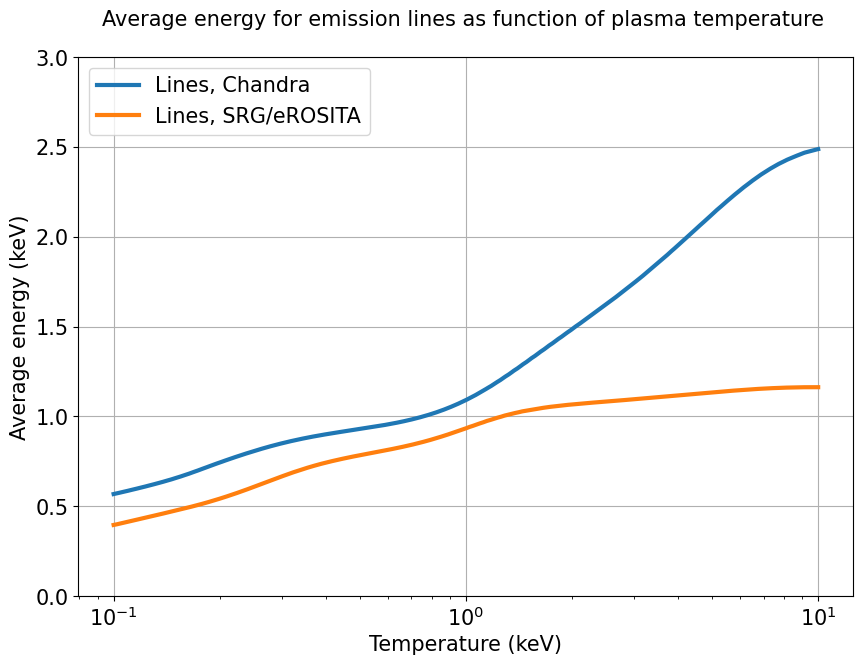

In [4]:
plt.figure(figsize=(10,7))

data_name1 = "data/stats_03.dat"   #'Lines, CH'
data_name2 = "data/stats_11.dat"   #'Cont, CH'
data_name3 = "data/stats_10.dat"   #'Lines, ER'
data_name4 = "data/stats_13.dat"   #'Cont, ER'
data_name5 = "data/stats_07.dat"   #'Lines, ER'
data_name6 = "data/stats_12.dat"   #'Lines, ER'

plot_E_T(data_name1, 'Lines', 'Chandra')
#plot_E_T(data_name2, 'Continuum', 'Chandra')
plot_E_T(data_name3, 'Lines', 'SRG/eROSITA')
#plot_E_T(data_name4, 'Continuum', 'SRG/eROSITA')
#plot_E_T(data_name6, 'Line2', 'er')


#for i in ['02', '03', '05', '08', '14', '15', '04', '16']:
#        dn = "data/stats_"+str(i)+".dat"
#        plot_E_T(dn, str(i), 'Chandra')

        
#plt.xscale('linear')

#add_T(1.0, 3.0, data_name1)

# comment if there is only one E(T)
# this move deletes unique titles
plt.title('Average energy for emission lines as function of plasma temperature \n', fontsize=15)
plt.grid()
#plt.savefig('letter26.10/Fig2.png')
plt.show()

Алгоритм вычисления $T_{spec}$ по графикам $E \ (T)$ согласно формулам (1-3):

In [5]:
def get_Tspec_lines(fmin, Tmin, Tmax, Data):
    
    # derive T_spec from given values 
    # of T_min, T_max, f_min and for given <E>(T)

    E_1 = f(Tmin, Data[:,11], Data[:,2])
    E_2 = f(Tmax, Data[:,11], Data[:,2])

    S_j_1 = Data[np.argmin(np.abs(Data[:,2] - Tmin)), 9]
    S_j_2 = Data[np.argmin(np.abs(Data[:,2] - Tmax)), 9]
    
    #print(Data[np.argmin(np.abs(tList - Tmin)),9], Data[np.argmin(np.abs(tList - Tmax)),9])
    #print()

    num =    fmin*S_j_1*E_1 + (1-fmin)*S_j_2*E_2
    denom =  fmin*S_j_1     + (1-fmin)*S_j_2
    
    #Etot = num/denom
    #Tspec = f_inv(Etot, Data[:,11], Data[:,2])
    #plt.scatter(fmin, Tspec, color="blue")

    return f_inv(num/denom, Data[:,11], Data[:,2])


def plot_Tspec_fmin(Tmin, Tmax, N_fmins, Data, naive=False, lstyle = '-', cline = 'blue'):

    # draw plot like Fig.3

    f_min = np.linspace(0, 1, N_fmins+1)
    
    #naive weighting
    if naive:
        plt.plot(f_min, f_min*T_min+(1-f_min)*T_max, linestyle = '--', linewidth=2, color='black')

    T_spec = f_min*0

    for i in range(0, len(f_min)):

        T_spec[i] = get_Tspec_lines(f_min[i], T_min, T_max, Data)

    #print('*************')

    plt.plot(f_min, T_spec, linewidth=2, linestyle = lstyle, color = cline)
    #, label='eq. [1-3]')#'from '+str(T_max)+' to '+str(T_min))

def plot_Tspec_fmin_details():  
    
    plt.xticks(size=15)
    plt.yticks(size=15)
    plt.xlabel('$f_{min}$', fontsize = 15)
    plt.ylabel('$T_{spec}$ (keV)', fontsize = 15)
    
    handles, labels = plt.gca().get_legend_handles_labels()
    line_n = Line2D([], [], label='Naive weighting', color='black', linestyle='--', linewidth=2)
    line_e = Line2D([], [], label='$T_{spec}$ from eq. [1-3]', color='blue', linestyle='-', linewidth=2)
    dots_f = Line2D([], [], label='Single-T fit', color='black', marker='.', linestyle='None', markersize=12)
    handles.extend([line_n, line_e, dots_f])
    plt.legend(handles=handles, fontsize=15)

## 1.2 $T_{spec}$ from direct fit

In [6]:
def draw_model(nrm, linesandcont):
    
    x.Plot("model")
    x.Plot.add = True
    #x.Plot.setID()
    xVals = x.Plot.x()
    modVals = x.Plot.model()
    yAdd1 = x.Plot.addComp(1)
    yAdd2 = x.Plot.addComp(2)
    plt.plot(xVals, modVals, linewidth = 3, label='Initial model', color='black')
    if linesandcont:
        yAdd3 = x.Plot.addComp(3)
        yAdd4 = x.Plot.addComp(4)
        yAdd12 = [a+b for a,b in zip(yAdd1, yAdd2)]
        yAdd34 = [c+d for c,d in zip(yAdd3, yAdd4)]
    else:
        yAdd12 = yAdd1
        yAdd34 = yAdd2
    plt.plot(xVals, yAdd12, linewidth = 2, linestyle = ":", 
             label=f'Low T', color='red')
    plt.plot(xVals, yAdd34, linewidth = 2, linestyle = "--", 
             label=f'High T', color='green')
    #plt.plot(xVals, yAdd12, label='sum 1 2')
    #plt.plot(xVals, yAdd34, label='sum 3 4')
    #plt.plot(xVals, yAdd3, label='3')
    #plt.plot(xVals, yAdd4, label='4')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlim(0.1, 14)
    plt.ylim(bottom=10**(-7), top=10**(1.5)*nrm)
    plt.legend(fontsize = 15, loc=1)
    add_plt_fancy()
    #plt.show()
    
def draw_best_model(nrm, linesandcont):
    
    x.Plot("model")
    modVals = x.Plot.model()
    xVals = x.Plot.x()
    if linesandcont:
        y1 = x.Plot.addComp(1)
        y2 = x.Plot.addComp(2)
        plt.plot(xVals, y1, label="APEC: Z=$Z_{{from \ fit}}$")
        #plt.plot(xVals, y2, label="APEC: Z=0")
        plt.plot(xVals, [-aa for aa in y2], label='APEC: Z=0', linestyle = '-.')
        #plt.plot(xVals, [c+d for c,d in zip(y1, y2)], label='sum')
    plt.plot(xVals, modVals, label=f"Best-fit", color='blue', alpha=0.3)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlim(0.1, 14)
    plt.ylim(bottom=10**(-6), top=10**(1.5)*nrm)
    add_plt_fancy()
    #plt.title(f"Best-fit model (reduced $\\chi^2=$ {x.Fit.statistic/x.Fit.dof:.3f})", fontsize = 15)
    #plt.show()
    
def draw_goodness():
    
    x.Plot("goodness")
    xValsG = x.Plot.x()
    yValsG = x.Plot.y()
    #print(xValsG, yValsG)
    #plt.hist(yValsG, bins=xValsG)
    plt.bar(xValsG, height=yValsG, width = (np.min(xValsG)-np.max(xValsG))/len(xValsG))
    #plt.plot(xValsG, yValsG, label="goodness")
    plt.xlabel(x.Plot.labels()[0], fontsize = 15)
    plt.ylabel(x.Plot.labels()[1], fontsize = 15)
    plt.title(x.Plot.labels()[2], fontsize = 15)
    plt.xticks(size=15)
    plt.yticks(size=15)
    plt.grid()
    plt.axvline(x.Fit.statistic, linestyle = "--", color='red', linewidth = 3)
    
def draw_data_and_best_model(nrm, linesandcont):
    
    x.Plot("data")
    x.Plot.xAxis = "keV"
    x.Plot.add = True
    xVals = x.Plot.x()
    yVals = x.Plot.y()
    if linesandcont:
        y1 = x.Plot.addComp(1)
        y2 = x.Plot.addComp(2)
    modVals = x.Plot.model()
    #plt.plot(xVals, modVals, linewidth = 5, color = 'green')
    plt.yscale('log')
    #plt.plot(xVals, yVals, label='Data', color='black') 
    xErrs = x.Plot.xErr()
    yErrs = x.Plot.yErr()
    plt.errorbar(xVals, yVals, yErrs, xErrs, 
                 fmt = "none", ecolor = "black", label="Data with errors")
    if linesandcont:
        plt.plot(xVals, y1, label="APEC: Z=$Z_{{from \ fit}}$")
        plt.plot(xVals, [-aa for aa in y2], label="APEC: Z=0")
        summa = [c+d for c,d in zip(y1, y2)]
        plt.plot(xVals, summa, label='Best-fit', color='red') #modVals = summa
    else:
        plt.plot(xVals, modVals, label='Best-fit', color='red')
    add_plt_fancy()
    plt.xlabel("")
    plt.ylim(0.0001, 10**4*nrm)
    plt.title(f"Data and best-fit model (reduced $\\chi^2=$ {x.Fit.statistic/x.Fit.dof:.3f})", fontsize = 15)
    
    plt.subplot(6,2,6)
    x.Plot("resid")
    #plt.subplot(2,2,4)
    xValsR = x.Plot.x()
    yValsR = x.Plot.y()
    xErrsR = x.Plot.xErr()
    yErrsR = x.Plot.yErr()
    plt.errorbar(xValsR, yValsR, yErrsR, xErrsR, 
                 fmt = "none", ecolor = "black", label="errors")
    if not linesandcont:
        summa = modVals
    plt.scatter(xValsR, [a-b for a,b in zip(yVals, summa)], s=3, 
                color='blue', label='data minus \nbest fit')
    add_plt_fancy()
    plt.xlabel("")
    plt.ylabel("")
    plt.xticks([])

    plt.subplot(6,2,8)
    x.Plot("chi")
    #plt.subplot(2,2,4)
    xValsC = x.Plot.x()
    yValsC = x.Plot.y()
    #xErrsR = x.Plot.xErr()
    #yErrsR = x.Plot.yErr()
    plt.scatter(xValsC, yValsC, color = "black", label = "contribution to \n the fit statistic \n from each bin")
    add_plt_fancy()
    plt.title(x.Plot.labels()[1], fontsize = 14)
    plt.ylabel("")
            
def add_plt_fancy():
    
    plt.xlabel(x.Plot.labels()[0], fontsize = 14)
    plt.ylabel(x.Plot.labels()[1], fontsize = 14)
    plt.title(x.Plot.labels()[2], fontsize = 14)
    plt.xticks(size=15)
    plt.yticks(size=15)
    plt.grid()
    plt.xscale('log')
    plt.xticks([0.1, 1., 10.], [0.1, 1, 10])
    plt.legend(fontsize=15, loc=0)
    
#def add_background():
        #x.Plot("data")
        #bkg = x.Plot.backgroundVals()
        #plt.plot(xVals, yVals)
        
def print_parnames(MODEL):
    
    ncomp = len(MODEL.componentNames)
    for icomp in MODEL.componentNames:
        print (icomp, eval(f'MODEL.{icomp}.parameterNames'))

def perform_fakeit(tname, expos):

    if tname == 'Chandra':
        RMF_NAME = 'telescopes/chandra/djs50.ugc3957_v05.rmf' 
        ARF_NAME = 'telescopes/chandra/djs50.ugc3957_v05.arf' 
    elif tname == 'SRG/eROSITA':
        RMF_NAME = 'telescopes/erosita/erosita_pirmf_v20210719.rmf'
        ARF_NAME = 'telescopes/erosita/tm1_arf_open_000101v02.fits'

    fs = x.FakeitSettings(response = RMF_NAME, 
                               arf = ARF_NAME, 
                        background = '', 
                          exposure = expos, 
                        correction = '', 
                      backExposure = '', 
                          fileName = 'fakeit.pha')
    x.AllData.fakeit(nSpectra = 1, 
                     settings = fs, 
                   applyStats = True,
                   filePrefix = "",
                      noWrite = True)
    
def plot_contours_from_steppar(Nst, par_x_num, par_y_num, mmmodel, zoomin=True):

    #x.Plot.device = "/xs"
    x.Plot.device = "/null"
    x.Plot("contour")
    #x.Plot.device = "/null"
    chi2 = x.Plot.z()
    #print(x.Fit.statistic, x.Plot.contourLevels())

    #plt.subplot(1,2,1)
    
    par_x = mmmodel(par_x_num).values[0]
    par_y = mmmodel(par_y_num).values[0]

    #x11 = np.linspace(best_kT-0.005, best_kT+0.005, len(chi2))
    #y11 = np.linspace(abund_from_fit-0.01, abund_from_fit+0.01, len(chi2))
    #print(x11, y11)
    x11 = x.Fit.stepparResults(str(par_x_num))[0:Nst+1]
    y11 = x.Fit.stepparResults(str(par_y_num))[0::Nst+1]
    #print(x11, y11)
    X, Y = np.meshgrid(x11, y11)
    center = np.argwhere(chi2==np.min(chi2))[0]
    #plt.contour(X, Y, XCYC, levels=[x.Fit.statistic], colors='yellow')
    center_x = X[center[0]][center[1]]
    center_y = Y[center[0]][center[1]]

    #plt.contourf(X, Y, XCYC, 20, cmap='jet')

    contours = plt.contour(X, Y, chi2, levels=x.Plot.contourLevels(), colors='red')
    #plt.clabel(contours, inline=True, fontsize=8)
    
    exxxt = [x11[0], x11[-1], y11[0], y11[-1]]
    plt.xlim(x11[0], x11[-1])
    plt.ylim(y11[0], y11[-1])
    
    if zoomin:
        #for ii, seg in enumerate(contours.allsegs[2]):
        #    xleft, xright = np.min(seg), np.max(seg)
        #    print(np.min(seg), np.max(seg))
        #    plt.plot(seg[:,0], seg[:,1], '.-', label=ii)
        #plt.legend(fontsize=9, loc='best')

        #print(len(contours.allsegs), contours.allsegs)

        # finding borders of 3sigma level (or 2sigma) for fancier imshow
        seg = contours.allsegs[len(contours.allsegs)-1]
        x_left = np.min(seg[0][:,0])
        x_right = np.max(seg[0][:,0])
        y_left = np.min(seg[0][:,1])
        y_right = np.max(seg[0][:,1])

        scale_n = 2
        x_c = (center_x + par_x)/2
        x_l = x_c - scale_n*( x_c - np.min([par_x, center_x, x_left])) #(best_kT - x_left)
        x_r = x_c + scale_n*(-x_c + np.max([par_x, center_x, x_right])) #(x_right - best_kT)
        y_c = (center_y + par_y)/2
        y_l = y_c - scale_n*( y_c - np.min([par_y, center_y, y_left])) #(abund_from_fit - y_left)
        y_r = y_c + scale_n*(-y_c + np.max([par_y, center_y, y_right])) #(y_right - abund_from_fit)

        plt.xlim(x_l, x_r)
        plt.ylim(y_l, y_r)
        exxxt = x_l, x_r, y_l, y_r
        
    plt.imshow(chi2, extent=exxxt, aspect='auto', origin='lower', cmap='viridis')
    plt.colorbar(fraction=0.046, pad=0.04)

    plt.scatter(center_x, center_y, marker='+', c='cyan', label=f'$X_{{centered}}={center_x:.3f}, Y_{{centered}}={center_y:.3f}$')
    plt.axvline(center_x, color='cyan', alpha=0.3)
    plt.axhline(center_y, color='cyan', alpha=0.3)

    plt.axvline(par_x, color='yellow', alpha=0.3)
    plt.axhline(par_y, color='yellow', alpha=0.3)
    plt.scatter(par_x, par_y, marker='+', color='yellow', label=f'$X_{{min \ \\chi^2}}={par_x:.3f}, Y_{{min \ \\chi^2}}={par_y:.3f}$')

    #seg0 = contours.allsegs[0]
    #dx_left = np.min(seg[0][:,0]) - center_x
    #dx_right = np.max(seg[0][:,0]) - center_x
    #dy_left = np.min(seg[0][:,1]) - center_x
    #dy_right = np.max(seg[0][:,1]) - center_x
    
    plt.xlabel(x.Plot.labels()[0], fontsize = 12)
    plt.ylabel(x.Plot.labels()[1], fontsize = 12)
    #titlelabels = [float(f"{a:.3f}") for a in x.Plot.contourLevels()]
    #plt.title(x.Plot.labels()[2]+f"\n Cyan cross = {x.Fit.statistic:.3f}; yellow cross = {chi2[center[0]][center[1]]:.3f} \n levels = {*titlelabels,}", fontsize = 12)
    plt.legend()
    #plt.show()
    
    #return dx_left, dx_right, dy_left, dy_right 

    #plt.subplot(1,2,2)
    # 3d
    #ax = plt.axes(projection='3d')
    #ax.contour3D(X, Y, chi2, 100, cmap='viridis')#, rstride=1, cstride=1, edgecolor='none')
    #ax.set_xlabel(x.Plot.labels()[0])
    #ax.set_ylabel(x.Plot.labels()[1])
    #ax.set_zlabel('Chi-Squared')
    #ax.set_xlim(x_l, x_r)
    #ax.set_ylim(y_l, y_r)
    #plt.colorbar(fraction=0.046, pad=0.04)
    #ax.view_init(60, 35)
    #plt.show()

def perform_steppar(mmmodel, par_x_num, par_x_delta, par_y_num, par_y_delta, Nst):
            
    best_X = mmmodel(par_x_num).values[0]
    best_Y = mmmodel(par_y_num).values[0]
    x.Xset.parallel.steppar = 4
    N_steps = Nst
    par1_delta = par_x_delta
    par2_delta = par_y_delta
    x.Fit.steppar(f"{par_x_num} {best_X-par1_delta} {best_X+par1_delta} {N_steps} {par_y_num} {best_Y-par2_delta} {best_Y+par2_delta} {N_steps}")
    #print(x.Fit.stepparResults('2'))

## PyXspec

Defining a function that calculates single-temperature fit for two-component plasma (with line-dominated spectra) of temperatures $T_{min}$ and $T_{max}$ and relative contributions $f_{min}$ and $f_{max}$ respectively.

Note: to get rid of trace elements for pure bremsstrahlung use `xset APEC_TRACE_ABUND 0`.

In [190]:
logFile = x.Xset.openLog("newLogFile.txt")

def model_lines_only(T_minnn, T_maxxx, f_minnn, f_maxxx, abund, nrm, cfluxxx=False):
        
    if not cfluxxx:
        mod = x.Model('phabs*(const*(apec+const*apec)+const*(apec+const*apec))')
        mod.setPars(0.0, f_minnn, T_minnn, abund, 0, nrm, 1., T_minnn, 0.0, 0, nrm, f_maxxx, T_maxxx, abund, 0, nrm, 1., T_maxxx, 0, 0, nrm)
        mod(7).values =  "-1, -1, -1, -1, 1, 1"
        mod(17).values = "-1, -1, -1, -1, 1, 1"
        mod(7).frozen = True
        mod(17).frozen = True
        mod(8).link = "3"   # Tmin
        mod(10).link = "5"  # redshift
        mod(11).link = "6"  # norm
        mod(18).link = "13" # Tmax
        mod(20).link = "15" # redshift
        mod(21).link = "16" # norm
    else:
        mod = x.Model('phabs*cflux*(const*(apec+const*apec)+const*(apec+const*apec))')
        mod.setPars(0.0, 0.4, 2.0, -12., f_minnn, T_minnn, abund, 0, 1, 1., T_minnn, 0.0, 0, 1, f_maxxx, T_maxxx, abund, 0, 1, 1., T_maxxx, 0, 0, 1)
        mod(10).values =  "-1, 0.0001, -1, -1, 1, 1"
        mod(20).values = "-1, 0.0001, -1, -1, 1, 1"
        mod(10).frozen = True
        mod(20).frozen = True
        mod(11).link = "6"
        mod(13).link = "8"
        mod(14).link = "9"
        mod(21).link = "16"
        mod(23).link = "18"
        mod(24).link = "19"
        mod(9).frozen = True
        mod(19).frozen = True
        mod(9).values = "1, -1, 0.0, 0.0, 1.1, 1.1"
        mod(19).values = "1, -1, 0.0, 0.0, 1.1, 1.1"
        
    x.AllModels.show()
    
    return mod

    #x.Plot.show()
    #x.AllModels.setEnergies("0.1 10.0 10 log")

def single_T_fit_lines(T_minnn, T_maxxx, N_fmins, abund, telescope_name, nrm, texp, stpar=False, plot=False, Xplot=False):
        
    x.AllData.clear()
    x.AllData.removeDummyrsp()
    x.AllData.dummyrsp(lowE=0.1, highE=10.0, nBins=100)
    x.Xset.addModelString("APEC_TRACE_ABUND", "0")
    
    if Xplot:
        x.Plot.device = "/xs"
    else:
        x.Plot.device = '/null'

    tspec_list = []
    flux_list = []
        
    dt_lefts = []
    dt_rights = []

    for l in range(0, N_fmins):
        
        f_minnn = 0.0+1/(N_fmins-1)*(l)
        f_maxxx = 1-f_minnn
           
        # set model for fakeit
        mod = model_lines_only(T_minnn, T_maxxx, f_minnn, f_maxxx, abund, nrm, cfluxxx=False)
        x.AllModels.show()
        x.AllModels.setEnergies("reset")
        
        # calculating flux
        x.AllModels.calcFlux('0.7 10.0')
        fluxx = x.AllModels(1).flux[0]/(nrm*abund)
        flux_list.append(fluxx) # in units of ergs/cm2/s 
        #or use [4] in units of photons / s / cm^2
        
        # plot model
        if plot:
            plt.figure(figsize=(15, 17))
            plt.subplot(3,2,1)
            draw_model(nrm, linesandcont=True)

        # data from fake spectrum
        perform_fakeit(telescope_name, str(texp))
        x.AllData.ignore("**-0.7 10.0-**")             # IMPORTANT !
        x.AllData.show()
        x.AllModels.setEnergies("reset")
        
        # fitting
        x.AllModels.clear()
        mod2fit = x.Model("phabs*(apec+const*apec)")
        mod2fit.setPars(0.0, 1.0, abund, 0., nrm, 1, 1., 0.0, 0.0, nrm)
        mod2fit(1).frozen = True   # n_H
        #mod2fit(2).values = f"{(T_minnn+T_maxxx)/2}, 0.001, {T_minnn}, {T_minnn}, {T_maxxx}, {T_maxxx}" # temperature
        mod2fit(3).frozen = False  # abundance
        #mod2fit(4).frozen = False  # redshift
        #mod2fit(5).frozen = True   # norm
        mod2fit(5).values = f"{nrm}, -1, 0.0, 0.0, 1.1, 1.1"
        mod2fit(6).frozen = True   # const = -1
        mod2fit(6).values = "-1, -1, -1, -1, 1, 1"
        mod2fit(7).link = "2"      # temperature
        mod2fit(8).frozen = True   # zero abund for continuum
        mod2fit(9).link = "4"      # redshift
        mod2fit(10).link = "5"     # norm
        
        #x.AllData.ignore("bad")
        x.Fit.renorm('auto')
        x.Fit.nIterations = 100
        x.Fit.query = 'yes'
        #x.Fit.weight = 'standard'
        x.Fit.statMethod = "chi"
        #x.Fit.delta = 0.001
        x.Fit.perform()
        #x.Fit.goodness(100, sim=False)
        x.Fit.show()
               
        # steppar
        if stpar:
            N_steps = 30
            perform_steppar(mod2fit, 2, 0.2, 3, 0.2, N_steps)
            
        if nrm == 0.01:
            x.Fit.error('2')
            dleft, dright, _ = mod2fit(2).error
            #print(mod2fit(2).error)
            dt_lefts.append(dleft)
            dt_rights.append(dright)

        # return some parameters
        best_kT = mod2fit(2).values[0]
        abund_from_fit = mod2fit(3).values[0]
        norm = mod2fit(5).values[0]
        tspec_list.append(best_kT)
        #print(best_kT)
        
        # calculating flux
        #x.AllModels.calcFlux('0.7 10.0')
        #fluxx = x.AllData(1).flux[0]/(norm*abund_from_fit)
        #flux_list.append(fluxx) # in units of ergs/cm2/s 
        #or use [4] in units of photons / s / cm^2
    
        if plot:
            plt.suptitle(f'$T_{{min}}={T_minnn} \ keV, \ T_{{max}}={T_maxxx} \ keV, \ f_{{min}}={f_minnn:.2f}, \ f_{{max}}={f_maxxx:.2f}$ \n $t_{{exp}}={texp} \ s, \ Z_{{model}} ={abund}, \ Z_{{from \ fit}} = {abund_from_fit:.2f}, \ norm = {norm:.4f}$ \n $T_{{spec}}={best_kT:.4f} \ keV, \ $Flux$ = {fluxx*10**12:.3f}\cdot 10^{{-12}} \ ergs/cm^2/s$ \n ', fontsize = 20)
            plt.subplot(3,2,3)
            if stpar:
                plot_contours_from_steppar(N_steps, 2, 3, mod2fit, zoomin=True)
            else:
                draw_best_model(nrm, linesandcont=True)
                #draw_goodness()
            plt.subplot(3,2,2)
            draw_data_and_best_model(nrm, linesandcont=True)
            plt.subplot(3,2,1)
            draw_best_model(nrm, linesandcont=False)
            plt.show()

        #x.Plot.commands=()
        x.AllData.clear()
        x.AllModels.clear()

    return tspec_list, flux_list, dt_lefts, dt_rights

fitlisttttt, fluxxxx, dt1, dt2 = single_T_fit_lines(2.0, 4.0, 3, 1.0, 'Chandra', nrm=0.01, texp=40000, stpar=True, plot=False, Xplot=False)
print("T: ", fitlisttttt)
print("F: ", fluxxxx)
print([(a, b) for a, b in zip(dt1, dt2)])

(3.7129183375006956, 3.86454526001885, 'FFFFFFFFF')
(2.26490586632038, 2.342399095201733, 'FFFFFFFFF')
(1.9408190067878996, 1.9783295230104965, 'FFFFFFFFF')
T:  [3.7896793109735514, 2.301082808982883, 1.9598481268644177]
F:  [4.78322927864205e-10, 5.544724644635828e-10, 6.30622001062961e-10]
[(3.7129183375006956, 3.86454526001885), (2.26490586632038, 2.342399095201733), (1.9408190067878996, 1.9783295230104965)]


In [265]:
N_temps = 10
temps = np.linspace(1.0, 8.0, N_temps)
temps1 = temps[:int(N_temps/2)]
temps2 = temps[int(N_temps/2):]

#print(temps)
#print(temps1)
#print(temps2)

temps_spec = {}
temps_diff = {}

dts = {}

for normm in (1, 0.1, 0.01):
    
    temps_spec[str(normm)] = []
    temps_diff[str(normm)] = []
        
    tt = []
    
    dts[str(normm)] = []
    dd = []
        
    for t1, t2 in zip(temps1, temps2):
        
        temp_test, flux_test, dt_left_test, dt_right_test = single_T_fit_lines(t2, t1, 2, 1.0, 'Chandra', normm, texp=40000, stpar=True, plot=False, Xplot=False)
        
        temps_spec[str(normm)].append(temp_test[0])
        tt.append(temp_test[1])
        
        if dt_left_test != []:
            dts[str(normm)].append((dt_left_test[0], dt_right_test[0]))
            dd.append((dt_left_test[1], dt_right_test[1]))
    
    temps_spec[str(normm)] += tt
    temps_diff[str(normm)] = temps_spec[str(normm)]-temps
    
    dts[str(normm)] += dd
    
    print("norm = "+str(normm)+": done")

norm = 1: done
norm = 0.1: done
(0.9976789302144431, 1.0020240261777833, 'FFFFFFFFF')
(4.477905069703171, 4.681175030990492, 'FFFFFFFFF')
(1.7404056412815536, 1.7652193620078238, 'FFFFFFFFF')
(5.173269910762909, 5.421714555393808, 'FFFFFFFFF')
(2.3984308021912772, 2.457517601502796, 'FFFFFFFFF')
(5.976663088869092, 6.291567587126668, 'FFFFFFFFF')
(3.023994208918917, 3.1312937256983235, 'FFFFFFFFF')
(6.477015630897406, 6.858192307825981, 'FFFFFFFFF')
(3.663358480700198, 3.8170756734300033, 'FFFFFFFFF')
(7.130038050158471, 7.5936148851229905, 'FFFFFFFFF')
norm = 0.01: done


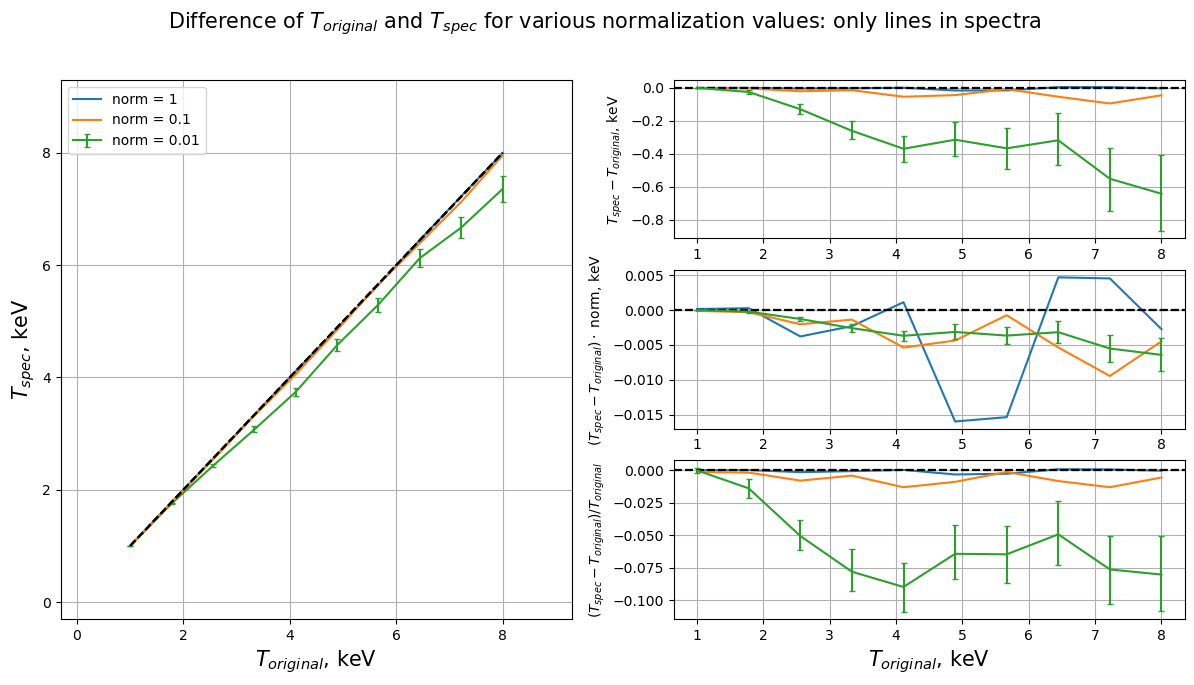

In [268]:
def draw_Tspec_norm(temps, temps_spec, temps_diff, dts, mode):

    plt.figure(figsize=(14.5, 7))
    plt.suptitle('Difference of $T_{original}$ and $T_{spec}$ for various normalization values: '+mode, fontsize = 15)

    for normm in (1, 0.1, 0.01):

        plt.subplot(1,2,1)
        plt.xlim(-0.3, temps[-1]+1.3)
        plt.ylim(-0.3, temps[-1]+1.3)
        if normm == 0.01:
            y_errors = [temps_spec[str(normm)], temps_spec[str(normm)]]-np.transpose(dts['0.01'])
            plt.errorbar(temps, temps_spec[str(normm)], yerr=np.abs(y_errors), label='norm = '+str(normm), capsize=2.5, barsabove=True)
        else:
            plt.plot(temps, temps_spec[str(normm)], label='norm = '+str(normm))
        plt.plot(temps, temps, linestyle = '--', color='black')
        plt.xlabel('$T_{original}$, keV', fontsize = 15)
        plt.ylabel('$T_{spec}$, keV', fontsize = 15)
        plt.grid()
        plt.legend()

        plt.subplot(3,2,2)
        if normm == 0.01:
            plt.errorbar(temps, temps_diff[str(normm)], yerr=np.abs(y_errors), label='norm = '+str(normm), capsize=2.5)
        else:
            plt.plot(temps, temps_diff[str(normm)], label='norm = '+str(normm))
        plt.axhline(0, linestyle = '--', color='black')
        #plt.xlabel('$T_{original}$, keV', fontsize = 15)
        #plt.xticks([],[])
        plt.ylabel('$T_{spec}-T_{original}$, keV', fontsize = 10)
        plt.grid()

        plt.subplot(3,2,4)
        if normm == 0.01:
            plt.errorbar(temps, [tttt*normm for tttt in temps_diff[str(normm)]], yerr=np.abs(y_errors)*normm, label='norm = '+str(normm), capsize=2)
        else:
            plt.plot(temps, [tttt*normm for tttt in temps_diff[str(normm)]], label='norm = '+str(normm))
        plt.axhline(0, linestyle = '--', color='black')
        #plt.xlabel('$T_{original}$, keV', fontsize = 15)
        #plt.xticks([], [])
        plt.ylabel('$(T_{spec}-T_{original}) \cdot$ norm, keV', fontsize = 10)
        plt.grid()

        plt.subplot(3,2,6)
        if normm == 0.01:
            plt.errorbar(temps, [a/b for a, b in zip(temps_diff[str(normm)], temps)], yerr=np.abs(y_errors)/temps, label='norm = '+str(normm), capsize=2)
        else:
            plt.plot(temps, [a/b for a, b in zip(temps_diff[str(normm)], temps)], label='norm = '+str(normm))
        plt.axhline(0, linestyle = '--', color='black')
        plt.xlabel('$T_{original}$, keV', fontsize = 15)
        plt.ylabel('$(T_{spec}-T_{original})/T_{original}}$', fontsize = 10)
        plt.grid()

        #plt.subplot(2,3,6)
        #plt.plot(temps, [tttt*normm for tttt in temps_diff[str(normm)]], label='norm = '+str(normm))
        #plt.axhline(0, linestyle = '--', color='black')
        #plt.xlabel('$T_{original}$, keV', fontsize = 15)
        #plt.ylabel('$(T_{spec}-T_{original}) \cdot$ norm, keV', fontsize = 10)
        #plt.grid()
        #plt.legend(title='APEC')

    plt.show()
    
draw_Tspec_norm(temps, temps_spec, temps_diff, dts, mode='only lines in spectra')

## Замечания и дополнения:

1) `churazov` weights - для слабых источников

2) [statistic](https://heasarc.gsfc.nasa.gov/xanadu/xspec/manual/node119.html), [steppar](https://heasarc.gsfc.nasa.gov/xanadu/xspec/manual/node86.html), [error](https://heasarc.gsfc.nasa.gov/xanadu/xspec/manual/node79.html), [error codes](https://heasarc.gsfc.nasa.gov/xanadu/xspec/manual/node60.html#tclouterror)

3) Калибровка через `cflux`

4) Добавить возможность менять $n_H$

5) Научиться добавлять фон: `background`

6) [Appendix B: Statistics in XSPEC](https://heasarc.gsfc.nasa.gov/xanadu/xspec/manual/node319.html#AppendixStatistics)

## 1.3 Figure 3

Reading from file (obsolete):

`fitlist = pd.read_csv("tspec_list.dat", header=None)[0].to_numpy().astype(float)`

`plt.scatter(np.linspace(0, 1, len(fitlist)), fitlist)`

Calculating one single-temperature fit (it was used for debugging):

`fitlist5 = single_T_fit_lines(0.50, 1.5, 4, 'Chandra', plot=True)`

In [12]:
#Tspec_lines_all[str(0.5)+'-'+str(1.5)] = single_T_fit_lines(0.5, 1.5, 3, telescope, plot = True)

Вычисляем всё необходимое в PyXspec:

In [15]:
telescope = 'Chandra' 
#telescope = 'SRG/eROSITA'

T_mins = (0.25, 0.5, 1., 0.5, 1.0)
T_maxs = (0.5, 1.0, 2.0, 1.5, 3.0)

Tspec_lines_all = {}

for T_min, T_max in list(zip(T_mins, T_maxs)):

    tspec_list = single_T_fit_lines(T_min, T_max, 21, 1.0, telescope, nrm=0.001, texp=40000, stpar=True, plot = False)[0]
    Tspec_lines_all[str(T_min)+'-'+str(T_max)] = tspec_list
    
    print(str(T_min)+'-'+str(T_max)+": done")
    
#print(Tspec_lines_all)
for key in Tspec_lines_all.keys():
    print(key, 'keV')
    print([f'{vl:.2f}' for vl in Tspec_lines_all[key]], '\n')

0.25-0.5: done
0.5-1.0: done
1.0-2.0: done
0.5-1.5: done
1.0-3.0: done
0.25-0.5 keV
['0.50', '0.48', '0.47', '0.49', '0.47', '0.48', '0.46', '0.47', '0.45', '0.38', '0.35', '0.37', '0.36', '0.34', '0.32', '0.32', '0.30', '0.29', '0.28', '0.25', '0.25'] 

0.5-1.0 keV
['0.99', '0.98', '0.96', '0.95', '0.93', '0.90', '0.89', '0.87', '0.83', '0.82', '0.79', '0.76', '0.74', '0.70', '0.67', '0.65', '0.59', '0.59', '0.54', '0.52', '0.50'] 

1.0-2.0 keV
['1.86', '1.64', '1.50', '1.34', '1.28', '1.19', '1.18', '1.13', '1.11', '1.11', '1.07', '1.05', '1.05', '1.04', '1.02', '1.02', '1.02', '1.01', '1.00', '1.00', '1.00'] 

0.5-1.5 keV
['1.47', '1.42', '1.34', '1.31', '1.27', '1.24', '1.13', '1.00', '0.74', '0.67', '0.66', '0.61', '0.62', '0.59', '0.58', '0.55', '0.55', '0.52', '0.52', '0.50', '0.50'] 

1.0-3.0 keV
['2.41', '1.85', '1.41', '1.26', '1.19', '1.12', '1.10', '1.07', '1.07', '1.05', '1.02', '1.03', '1.02', '1.02', '1.01', '1.01', '1.01', '1.00', '1.00', '1.00', '1.00'] 



Рисуем картинку:

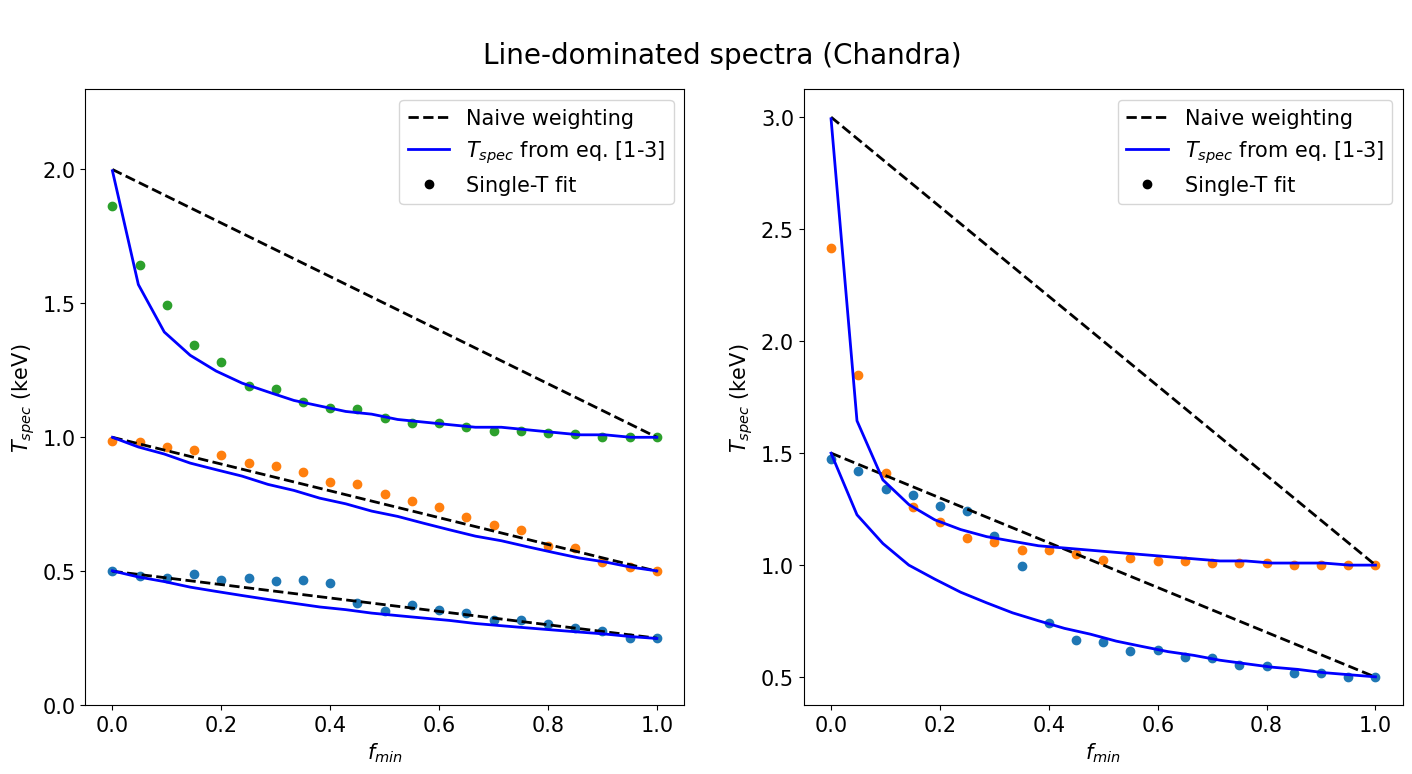

In [16]:
plt.figure(figsize=(17,8))
 
data__name = "data/stats_12.dat"

data = get_data(data__name, show_table=False)

plt.suptitle('\n' + 'Line-dominated spectra (' + telescope + ')', fontsize = 20)

plt.subplot(1,2,1)

T_mins = (0.25, 0.5, 1.)
T_maxs = (0.5, 1.0, 2.0)

for T_min, T_max in list(zip(T_mins, T_maxs)):
    
    # mean energy
    plot_Tspec_fmin(T_min, T_max, 21, data, naive=True, lstyle='-', cline='blue')
    plot_Tspec_fmin_details()
    
    # direct fit
    Tspec_list = Tspec_lines_all[str(T_min)+'-'+str(T_max)]
    plt.scatter(np.linspace(0, 1, len(Tspec_list)), Tspec_list)
    
    #plt.plot(np.linspace(0, 1, len(Tspec_list)), Tspec_list, color='black', linewidth=1)
    
plt.ylim(0, 2.3)

    
plt.subplot(1,2,2)

T_mins = (0.5, 1.0)
T_maxs = (1.5, 3.0)

for T_min, T_max in list(zip(T_mins, T_maxs)):
    
    # mean energy
    plot_Tspec_fmin(T_min, T_max, 21, data, naive=True, lstyle='-', cline='blue')
    plot_Tspec_fmin_details()
    
    #plot_Tspec_fmin(T_min, T_max, 20, get_data("data/stats_10.dat", show_table=False), naive=False, lstyle='-', cline='red')
    
    # direct fit
    Tspec_list = Tspec_lines_all[str(T_min)+'-'+str(T_max)]
    plt.scatter(np.linspace(0, 1, len(Tspec_list)), Tspec_list)
    
#plt.savefig('Fig3_'+telescope+'_'+data__name[11:13]+'.png')
plt.show()

# 2. CONTINUUM ONLY

To show list of `xspec` commands use `x.Plot.commands`.
If something is not plotting, try `x.Plot.commands=()`.

## 2.1 $T_{spec}$ from weighting

In [63]:
def get_Tspec_continuum_eq45(fminnn, Tmin, Tmax):
    
    # derive T_spec from given values 
    # of T_min, T_max and f_min
    
    Tspec = []
    
    for fmin in fminnn:
        
        temperatures = [Tmin, Tmax]
        weights = temperatures*0

        alpha = 0.75
        
        weights = [temperatures[i]**(-alpha) for i in range(0, len(temperatures))]

        weights = np.multiply(weights, [fmin, (1-fmin)])

        #print(weights)

        num = np.dot(weights, temperatures)
        denom = sum(weights)

        #print(num/denom)
        
        Tspec.append(num/denom)

    return Tspec

#bbb = get_Tspec_continuum_eq45([0.2, 0.3], 1.0, 2.0)
#print(bbb)

# calculating photon count rate for continuum

def c_T(T, T_left, T_right, telescope_name, Xplot=False):
    
    x.AllData.removeDummyrsp()
    x.AllData.dummyrsp(lowE=0.1, highE=50.0, nBins=1024)
    x.Xset.addModelString("APEC_TRACE_ABUND", "0")
    
    if telescope_name == 'Chandra':
        RMF_NAME = 'telescopes/chandra/djs50.ugc3957_v05.rmf' 
        ARF_NAME = 'telescopes/chandra/djs50.ugc3957_v05.arf' 
    elif telescope_name == 'SRG/eROSITA':
        RMF_NAME = 'telescopes/erosita/erosita_pirmf_v20210719.rmf'
        ARF_NAME = 'telescopes/erosita/tm1_arf_open_000101v02.fits'

    # set model for fakeit
    
    mod = x.Model('phabs*apec')
    mod.setPars(0.01, T, 0.0, 0, 1)
    x.AllModels.show()
    
    if Xplot:
        x.Plot.device = '/xs'
    else:
        x.Plot.device = '/null'

    # fake spectrum
    fs = x.FakeitSettings(response = RMF_NAME, 
                               arf = ARF_NAME, 
                        background = '', 
                          exposure = '40000', 
                        correction = '', 
                      backExposure = '', 
                          fileName = 'fakeit.pha')
    x.AllData.fakeit(nSpectra = 1, 
                     settings = fs, 
                   applyStats = True,
                   filePrefix = "",
                      noWrite = True)

    x.AllData.ignore(f"**-{T_left} {T_right}-**")             # IMPORTANT !
    
    x.Plot.xAxis = "keV"
    #x.AllData.show()
    x.Plot("ldata")
    #xVals = x.Plot.x()
    #yVals = x.Plot.y()
    
    #s1 = x.AllData(1).rate[0]
    
    x.AllModels.calcFlux('0.7 10.0')
    flx = x.AllData(1).flux[0]
     
    #print(s1)

    return flx

#for i in range(0, 100):
#    ddd = c_T(0.01+i/10, 0.7, 10.0, 'Chandra', True)
#    print(ddd)

def get_Tspec_continuum_eq46(fminnn, Tmin, Tmax, alpha, telescope_name):
    
    # derive T_spec from given values 
    # of T_min, T_max and f_min
    
    Tspec = []
    
    for fmin in fminnn:
        
        temperatures = [Tmin, Tmax]
        weights = temperatures*0

        #alpha = 0.875
        
        weights = [temperatures[i]**(-alpha) for i in range(0, len(temperatures))]

        weights = np.multiply(weights, [fmin, (1-fmin)])
        
        c_T_min = c_T(Tmin, 0.7, 10.0, telescope_name, Xplot=False)
        c_T_max = c_T(Tmax, 0.7, 10.0, telescope_name, Xplot=False)
        
        weights = np.multiply(weights, [c_T_min, c_T_max])

        #print(weights)

        num = np.dot(weights, temperatures)
        denom = sum(weights)

        #print(num/denom)
        
        Tspec.append(num/denom)

    return Tspec

#bbb = get_Tspec_continuum_eq46(np.linspace(0, 1, 21), 1.0, 2.0, 0.875, 'Chandra')
#print(bbb)

## 2.2 $T_{spec}$ from direct fit

### Mazotta-like fit
Single-T fit for mixture of 2 continuums (now working properly):

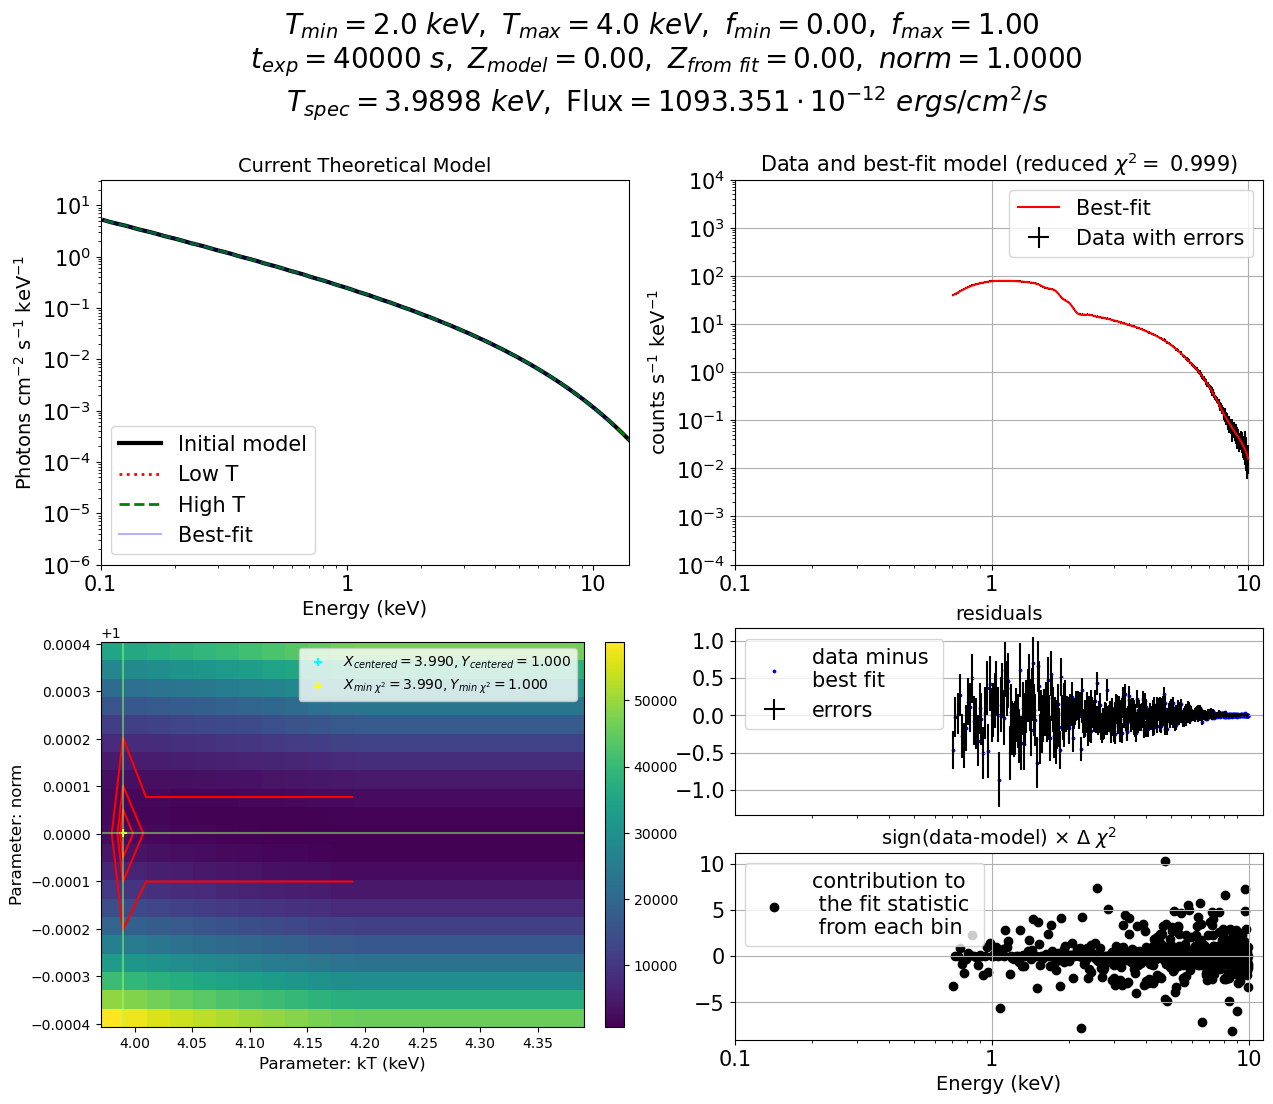

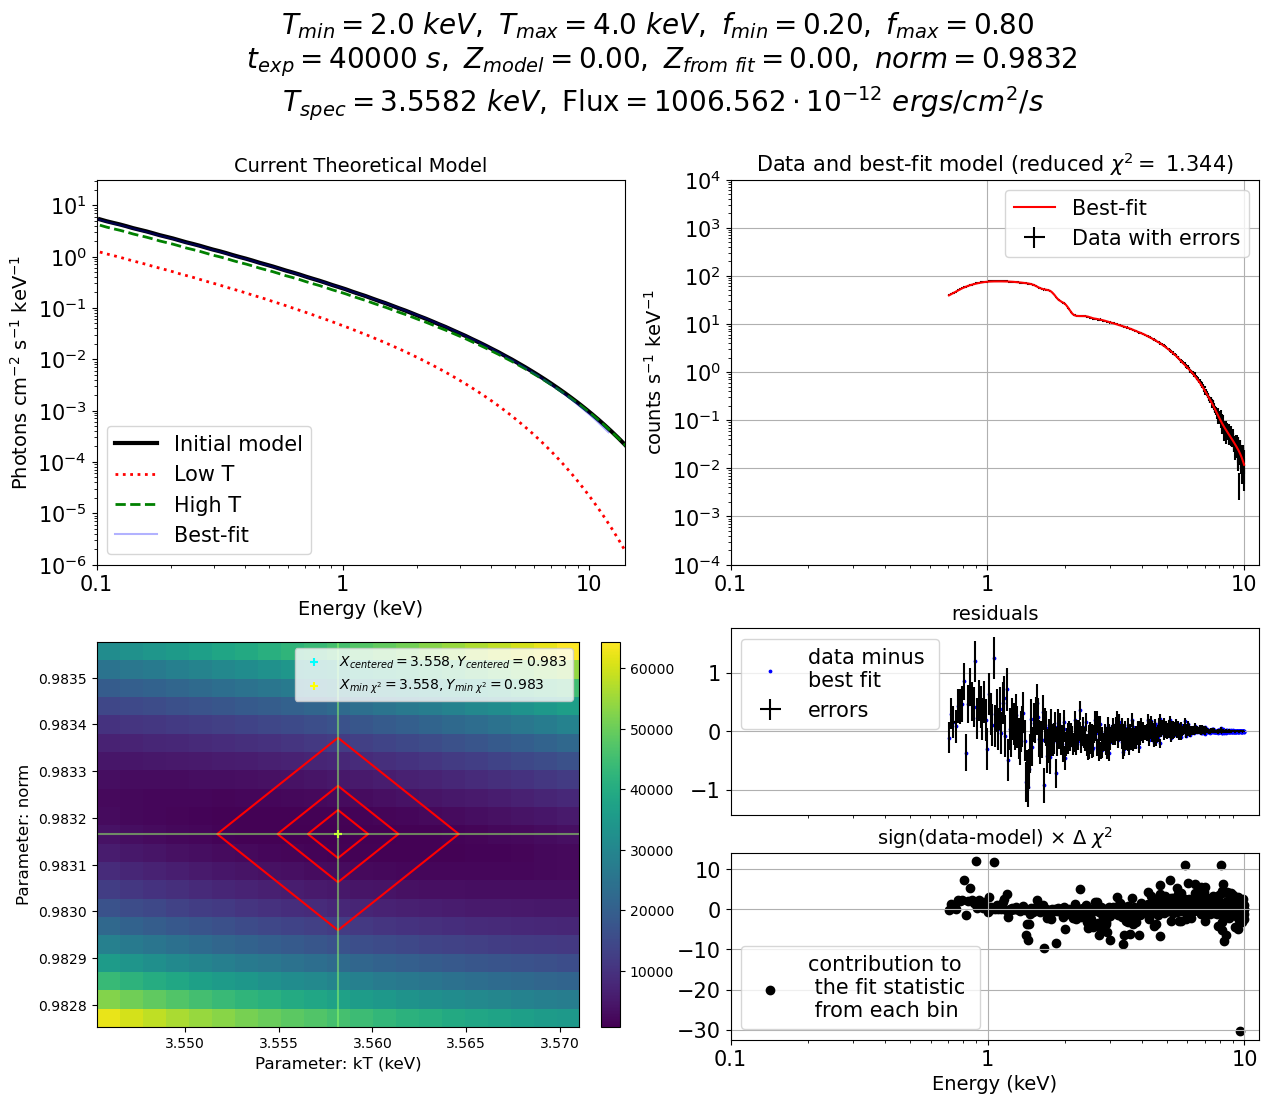

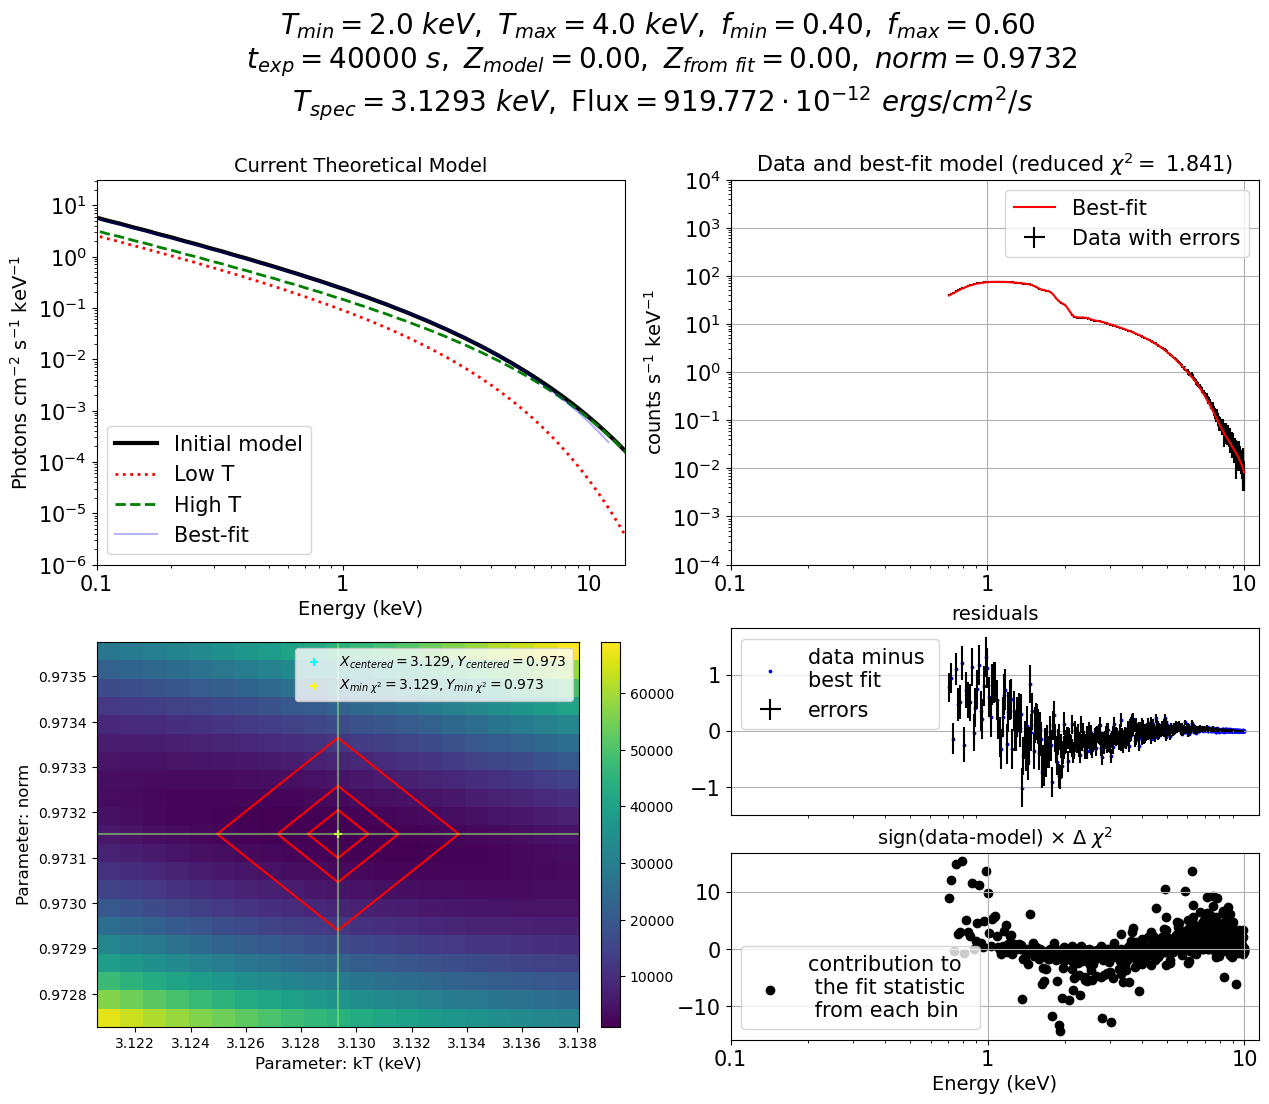

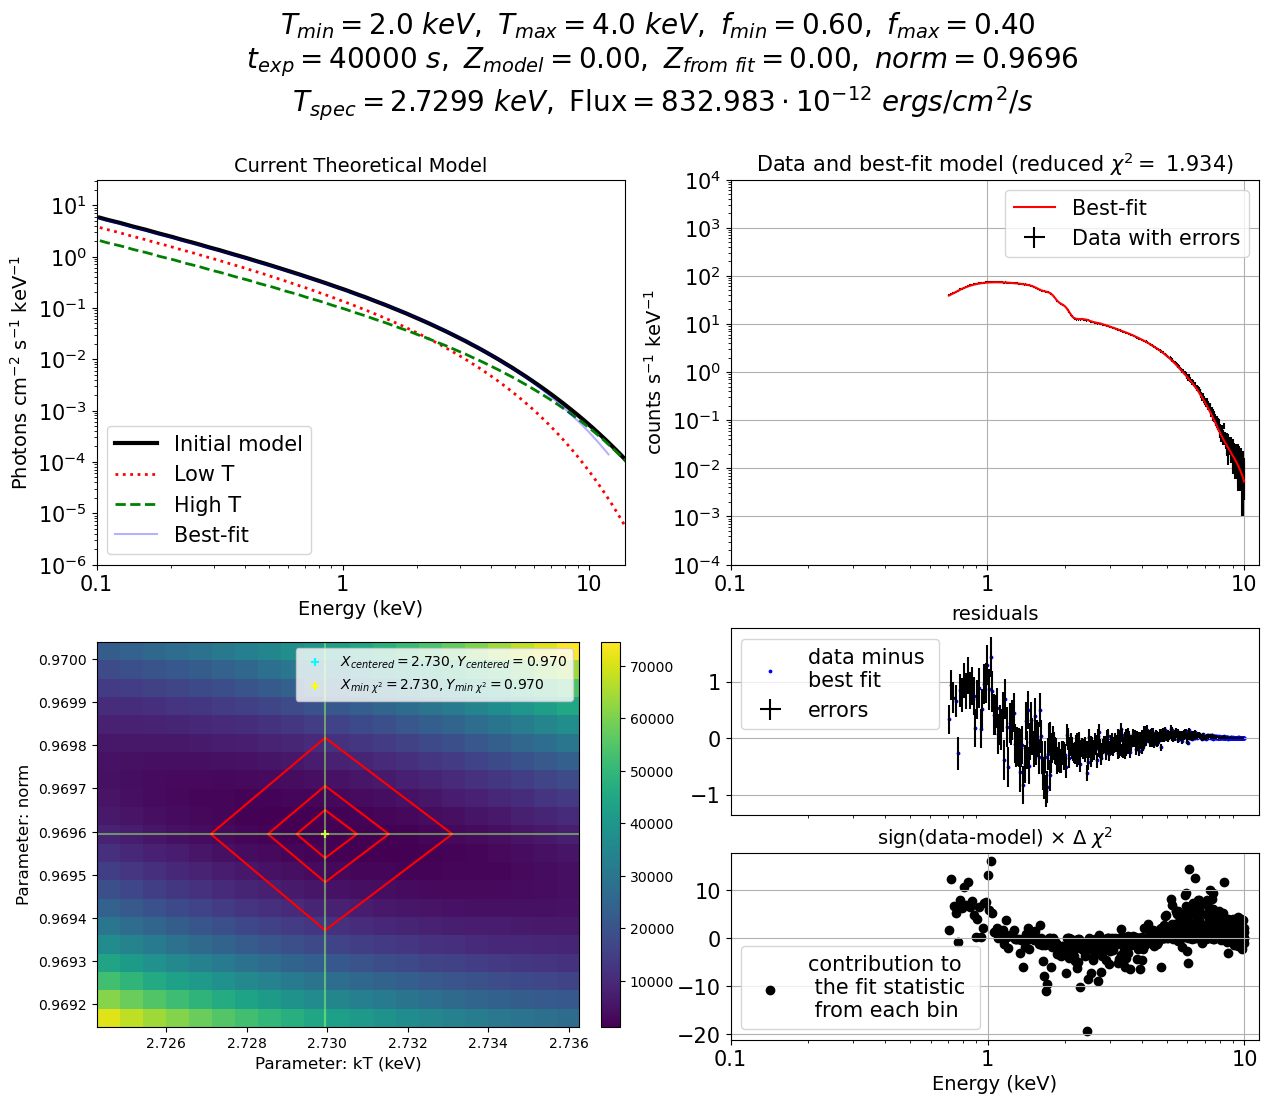

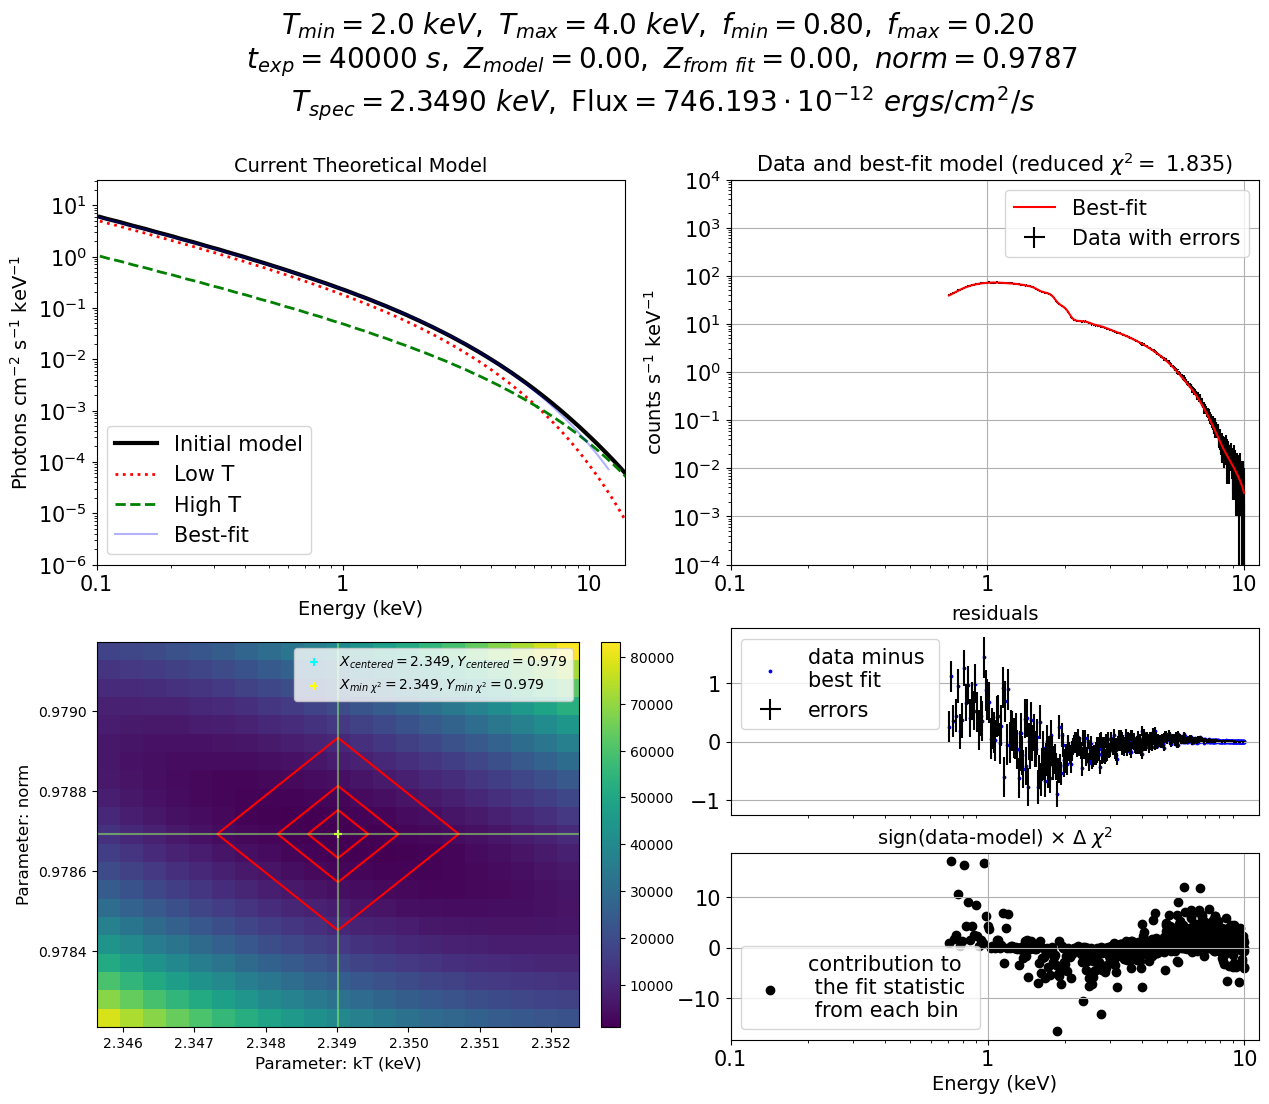

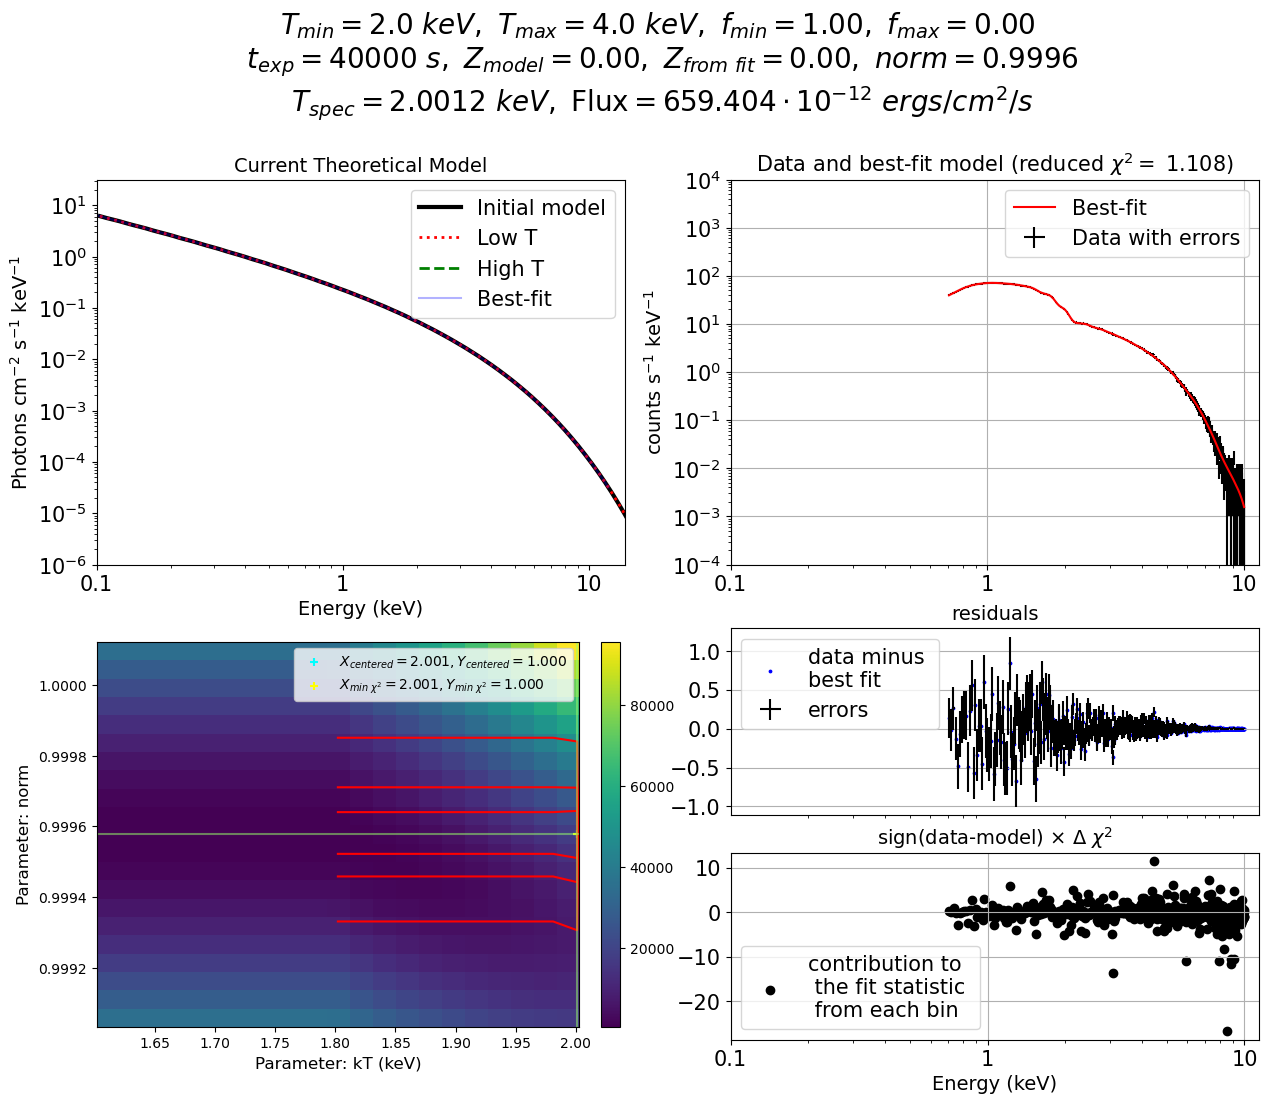

T:  [3.9898220392495007, 3.5581620316175258, 3.129333700708524, 2.729949275498814, 2.3490126914328804, 2.0011961714101782]
F:  [1.0933512387133558e-09, 1.0065618023912593e-09, 9.19772366069163e-10, 8.329829069885461e-10, 7.461934445483618e-10, 6.594039821081778e-10]


In [77]:
logFile = x.Xset.openLog("newLogFile.txt")

def single_T_fit_continuum(T_minnn, T_maxxx, N_fmins, telescope_name, nrm, texp, stpar=False, plot=False, Xplot=False):

    x.AllData.clear()
    x.AllData.removeDummyrsp()
    x.AllData.dummyrsp(lowE=0.1, highE=50.0, nBins=100)
    x.Xset.addModelString("APEC_TRACE_ABUND", "0")
        
    if Xplot:
        x.Plot.device = "/xs"
    else:
        x.Plot.device = '/null'

    tspec_list = []
    flux_list = []

    for l in range(0, N_fmins):

        f_minnn = 0.0 + 1/(N_fmins-1)*(l)
        f_maxxx = 1-f_minnn
        
        # set model for fakeit
        mod = x.Model('phabs*(const*apec+const*apec)')
        mod.setPars(0.0, f_minnn, T_minnn, 0.0, 0, nrm, f_maxxx, T_maxxx, 0.0, 0, nrm)
        mod(9).link = "4"
        mod(10).link = "5"
        mod(11).link = "6"
        x.AllModels.show()
        
        # calculating flux
        x.AllModels.calcFlux('0.7 10.0')
        fluxx = x.AllModels(1).flux[0]/(nrm)
        flux_list.append(fluxx) # in units of ergs/cm2/s 
        #or use [4] in units of photons / s / cm^2
        
        #x.AllModels.setEnergies("0.1 10.0 5 log")
        x.AllModels.setEnergies("reset")
        
        # plot model
        if plot:
            plt.figure(figsize=(15, 17))
            plt.subplot(3,2,1)
            draw_model(nrm, linesandcont=False)
            
        # data from fake spectrum
        perform_fakeit(telescope_name, str(texp))
        x.AllData.ignore("**-0.7 10.-**")     # IMPORTANT !
        x.AllData.show()
        
        # fitting
        x.AllModels.clear()
        mod2fit = x.Model("phabs*apec")
        mod2fit.setPars(0.0, 1.0, 0.0, 0., nrm)
        mod2fit(1).frozen = True    #n_H
        mod2fit(2).values = f"{(T_minnn+T_maxxx)/2}, 0.001, {T_minnn}, {T_minnn}, {T_maxxx}, {T_maxxx}" # temperature
        #mod2fit(3).frozen = False  #abundance
        #mod2fit(4).frozen = False  # redshift
        #mod2fit(5).frozen = True   # norm
        #mod2fit(5).values = f"{nrm}, 0.01, 0.0, 0.0, 1.1, 1.1"
        
        #x.AllData.ignore("bad")
        x.Fit.renorm('auto')
        x.Fit.nIterations = 100
        x.Fit.query = 'yes'
        #x.Fit.weight = 'standard'
        x.Fit.statMethod = 'chi'
        x.Fit.perform()
        #x.AllModels.show()
        x.Fit.show()
        
        # steppar
        if stpar:
            N_steps = 20
            perform_steppar(mod2fit, 2, 0.2, 5, nrm/10, N_steps)

        # return some parameters
        best_kT = mod2fit(2).values[0]
        abund_from_fit = mod2fit(3).values[0]
        norm = mod2fit(5).values[0]
        tspec_list.append(best_kT)
        #print(best_kT)
        
        # calculating flux
        #fluxx = x.AllData(1).rate[0]
        #flux_list.append(fluxx) # in units of counts / s
        #x.AllModels.calcFlux('0.7 10.0')
        #fluxx = x.AllData(1).flux[0]
        #flux_list.append(fluxx) # in units of ergs/cm2/s
        # or use [4] in units of photons / s / cm^2
        
        if plot:
            plt.suptitle(f'$T_{{min}}={T_minnn} \ keV, \ T_{{max}}={T_maxxx} \ keV, \ f_{{min}}={f_minnn:.2f}, \ f_{{max}}={f_maxxx:.2f}$ \n $t_{{exp}}={texp} \ s, \ Z_{{model}} =0.00, \ Z_{{from \ fit}} = {abund_from_fit:.2f}, \ norm = {norm:.4f}$ \n $T_{{spec}}={best_kT:.4f} \ keV, \ $Flux$ = {fluxx*10**12:.3f}\cdot 10^{{-12}} \ ergs/cm^2/s$ \n ', fontsize = 20)
            plt.subplot(3,2,3)
            if stpar:
                plot_contours_from_steppar(N_steps, 2, 5, mod2fit, zoomin=True)
            else:
                draw_best_model(nrm, linesandcont=False)
                #draw_goodness()
            plt.subplot(3,2,2)
            draw_data_and_best_model(nrm, linesandcont=False)
            plt.subplot(3,2,1)
            draw_best_model(nrm, linesandcont=False)
            plt.show()
            
        #x.Plot.commands=()
        x.AllData.clear()

    return tspec_list, flux_list
    
ccc, fluxccc = single_T_fit_continuum(2.0, 4.0, 6, 'Chandra', nrm=1, texp=40000, stpar=True, plot=True, Xplot=False)
print("T: ", ccc)
print("F: ", fluxccc)

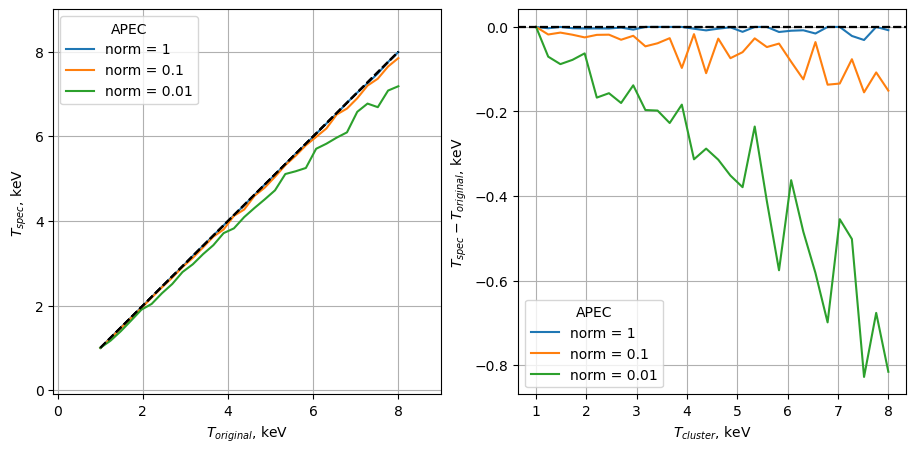

In [60]:
temps1 = np.linspace(1.0, 8.0, 30)

plt.figure(figsize=(11, 5))

for normm in (1, 0.1, 0.01):

    temps_spec = []
    temps_diff = []
        
    for t1 in temps1:
        temp_test, flux_test = single_T_fit_continuum(1.0, t1, 2, 'Chandra', normm, texp=40000, stpar=False, plot=False, Xplot=False)

        temps_spec.append(temp_test[0])
        temps_diff.append(temp_test[0]-t1)

    plt.subplot(1,2,1)
    plt.xlim(-0.1, temps1[-1]+1)
    plt.ylim(-0.1, temps1[-1]+1)
    plt.plot(temps1, temps_spec, label='norm = '+str(normm))
    plt.plot(temps1, temps1, linestyle = '--', color='black')
    plt.xlabel('$T_{original}$, keV')
    plt.ylabel('$T_{spec}$, keV')
    plt.grid()
    plt.legend(title='APEC')

    plt.subplot(1,2,2)
    plt.plot(temps1, temps_diff, label='norm = '+str(normm))
    plt.axhline(0, linestyle = '--', color='black')
    plt.xlabel('$T_{cluster}$, keV')
    plt.ylabel('$T_{spec}-T_{original}$, keV')
    plt.grid()
    plt.legend(title='APEC')
    
plt.show()

## 2.3 Figure 4

Вычисляем всё необходимое:

In [136]:
telescope = 'Chandra' 
#telescope = 'SRG/eROSITA'

if telescope == 'Chandra':
    alpha_current = 0.875
else:
    alpha_current = 0.73
    
print(alpha_current)

f_min = np.linspace(0, 1, 11)
T_spec = f_min*0

T_mins = (0.25, 0.5, 1.0, 2.0, 4.0)
T_maxs = (1.0,  2.0, 4.0, 8.0, 16.0)

Tspec_from_eq46 ={}
Tspec_from_fit ={}

for T_min, T_max in list(zip(T_mins, T_maxs)):
    
    # Tspec from equations 4, 6
    tspec_list = get_Tspec_continuum_eq46(f_min, T_min, T_max, alpha_current, telescope)
    Tspec_from_eq46[str(T_min)+'-'+str(T_max)] = tspec_list
    
    # Tspec from direct fit
    tspec_list_1 = single_T_fit_continuum(T_min, T_max, len(f_min), telescope, 0.01, 40000, stpar=True, plot=False, Xplot=False)[0]
    Tspec_from_fit[str(T_min)+'-'+str(T_max)] = tspec_list_1
    
    print(str(T_min)+'-'+str(T_max)+": done")
    
#for key in Tspec_from_eq46.keys():
#    print(key, 'keV')
#    print('Eqs. 4, 6:', [f'{vl:.2f}' for vl in Tspec_from_eq46[key]], '\n')
#    print('Direct fit', [f'{vl:.2f}' for vl in Tspec_from_fit[key]], '\n')

0.875
0.25-1.0: done
0.5-2.0: done
1.0-4.0: done
2.0-8.0: done
4.0-16.0: done


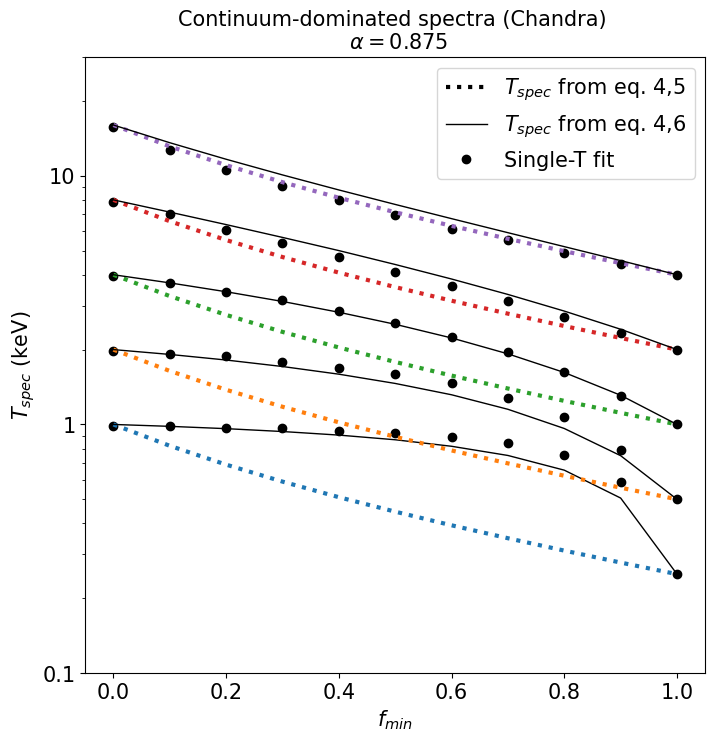

In [135]:
plt.figure(figsize=(8,8))

#telescope = 'Chandra' 
#telescope = 'SRG/eROSITA'

T_mins = (0.25, 0.5, 1.0, 2.0, 4.0)
T_maxs = (1.0,  2.0, 4.0, 8.0, 16.0)

for T_min, T_max in list(zip(T_mins, T_maxs)):
    
    # naive weighting
    #plt.plot(f_min, f_min*T_min+(1-f_min)*T_max, linestyle = '--', linewidth=2, color='black')
    
    # Tspec from equations 4, 5
    plt.plot(f_min, get_Tspec_continuum_eq45(f_min, T_min, T_max), linestyle = ':', linewidth = 3)

    # Tspec from equations 4, 6
    Tspec_list = Tspec_from_eq46[str(T_min)+'-'+str(T_max)]
    plt.plot(np.linspace(0, 1, len(Tspec_list)), Tspec_list, color='black', linewidth=1)
    #plt.scatter(np.linspace(0, 1, len(Tspec_list)), Tspec_list, color='black')
    
    # Tspec from direct fit
    Tspec_list1 = Tspec_from_fit[str(T_min)+'-'+str(T_max)]
    plt.scatter(np.linspace(0, 1, len(Tspec_list1)), Tspec_list1, color='black')
    
#plt.scatter(np.linspace(0, 1, len(T_spec)), T_spec, color='blue')   
    
plt.ylim(0.1, 30)
plt.yscale('log')
plt.xticks(size=15)
plt.yticks([0.1, 1, 10], [0.1, 1, 10], size=15)
plt.xlabel('$f_{min}$', fontsize = 15)
plt.ylabel('$T_{spec}$ (keV)', fontsize = 15)
plt.title('Continuum-dominated spectra ('+telescope+') \n $\\alpha=$'+str(alpha_current), fontsize = 15)

handles, labels = plt.gca().get_legend_handles_labels()
#line_n = Line2D([], [], label='Naive weighting', color='black', linestyle='--', linewidth=2)
line_e = Line2D([], [], label='$T_{spec}$ from eq. 4,5', color='black', linestyle=':', linewidth=3)
dots_f = Line2D([], [], label='$T_{spec}$ from eq. 4,6', color='black', linestyle='-', linewidth=1)
dots_T = Line2D([], [], label='Single-T fit', color='black', marker='.', linewidth=0, markersize=12)
handles.extend([line_e, dots_f, dots_T])
plt.legend(handles=handles, fontsize=15)

#plt.savefig('Fig4_'+str(telescope)+'.png')
plt.show()

## 2.4 Searching for $\alpha_{min}$

Let's try to find the value of $\alpha$ at which $T_{sl}$ from equations 4,6 is the closest to $T_{spec}$ from direct fit. Observations by SRG/eROSITA and also by Chandra are considered. See eq. (13) from Mazzotta et al. (2004): https://arxiv.org/pdf/astro-ph/0404425.pdf

$\Delta=\frac{1}{N} \sum_{T_1, T_2} \sqrt{\left(\frac{T_{\mathrm{sl}} - T_{\mathrm{spec}}}{T_{\mathrm{spec}}}\right)^2}$

In [78]:
telescope = 'Chandra' 
#telescope = 'SRG/eROSITA'

deltas = []
#alphas = np.linspace(0.350, 0.950, 3)  #Chandra
alphas = np.linspace(0.650, 0.850, 5)  #eROSITA

#[0.875, 0.900, 0.925, 0.950, 0.975, 1.000]
#[0.750, 0.775, 0.800, 0.825, 0.850, 0.875, 0.900]

f_min = np.linspace(0, 1, 21)

for a in alphas:

    delta_sum = 0
    N_deltasum = 0

    T_mins = (0.25, 0.5, 1.0, 2.0, 4.0)
    T_maxs = (1.0,  2.0, 4.0, 8.0, 16.0)

    #T_min = 0.5
    #T_max = 2.0

    for T_min, T_max in list(zip(T_mins, T_maxs)):

        # Tspec from equations 4, 6
        T_sl = get_Tspec_continuum_eq46(f_min, T_min, T_max, a, telescope)
        #print(T_sl)

        # Tspec from direct fit
        #T_spec = single_T_fit_continuum(T_min, T_max, len(f_min), telescope, 0.7, plot=False, Xplot=False)[0]
        T_spec = Tspec_from_fit[str(T_min)+'-'+str(T_max)]
        #print(T_spec)

        #print(T_spec)
        difference = [Ta-Tb for Ta, Tb in zip(T_sl, T_spec)]
        #print(difference)
        terms = [num/denom for num, denom in zip(difference, T_spec)]
        #print(term)
        terms2 = [t**2 for t in terms]
        #print(terms2)
        sqrterms2 = [np.sqrt(tt) for tt in terms2]
        
        delta_term = np.sum(sqrterms2)

        delta_sum = delta_sum + delta_term
        
        N_deltasum = N_deltasum + len(f_min)
        
        print(N_deltasum, end=" ")
        
    Delta = delta_sum/N_deltasum
    
    print(a, Delta)

    deltas.append(Delta)
    
#print(deltas)

21 42 63 84 105 0.65 0.02067995957254531
21 42 63 84 105 0.7 0.024861328272167256
21 42 63 84 105 0.75 0.03211573321286605
21 42 63 84 105 0.8 0.04085761708662324
21 42 63 84 105 0.85 0.05356651841578203


In [79]:
if telescope == 'Chandra': 
    alphas_CH = alphas
    deltas_CH = deltas
else:
    alphas_ER = alphas
    deltas_ER = deltas

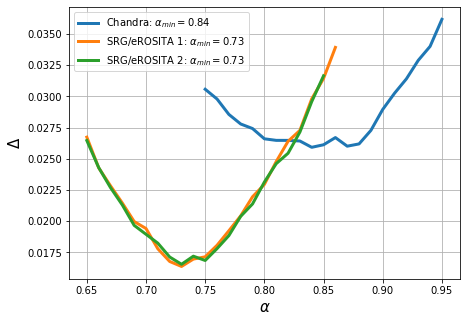

In [67]:
plt.figure(figsize=(7,5))
plt.plot(alphas_CH, deltas_CH, linewidth=3, label='Chandra: $\\alpha_{min} =$'+str(alphas_CH[np.argmin(deltas_CH)]))
plt.plot(list1, list2, linewidth=3, label='SRG/eROSITA 1: $\\alpha_{min} =$'+str(list1[np.argmin(list2)]))
plt.plot(alphas_ER, deltas_ER, linewidth=3, label='SRG/eROSITA 2: $\\alpha_{min} =$'+str(alphas_ER[np.argmin(deltas_ER)]))
plt.xlabel('$\\alpha$', fontsize=15)
plt.ylabel('$\\Delta$', fontsize=15)#, rotation = 'horizontal')
plt.legend()
plt.grid()
#plt.savefig('delta_alpha_ER.png')
plt.show()

We can see that $\Delta$ reaches its minimum at $\alpha=0.73$ (for SRG/eROSITA observations). 

# 3. REALISTIC METALLICITIES

## 3.1 $T_{spec}$ from direct fit

In [ ]:
x.AllModels.clear()
mod2fit = x.Model("phabs*(apec+apec)")
mod2fit.setPars(0.01, 1.0, abund, 0, nrm, 1.0, 0.0, 0, nrm)
mod2fit(1).frozen = True    # n_H
mod2fit(2).values = f"{(T_minnn+T_maxxx)/2}, 0.001, {T_minnn}, {T_minnn}, {T_maxxx}, {T_maxxx}" # temperature
mod2fit(7).frozen = True   # abundance cont
#mod2fit(4).frozen = False  # redshift   
#mod2fit(5).frozen = True   # norm
#mod2fit(5).values = f"{nrm}, -1, 0.0, 0.0, 1.1, 1.1"
mod2fit(3).frozen = False   # abundance lines
mod2fit(6).link = "2"
mod2fit(8).link = "4"
mod2fit(9).link = "5"

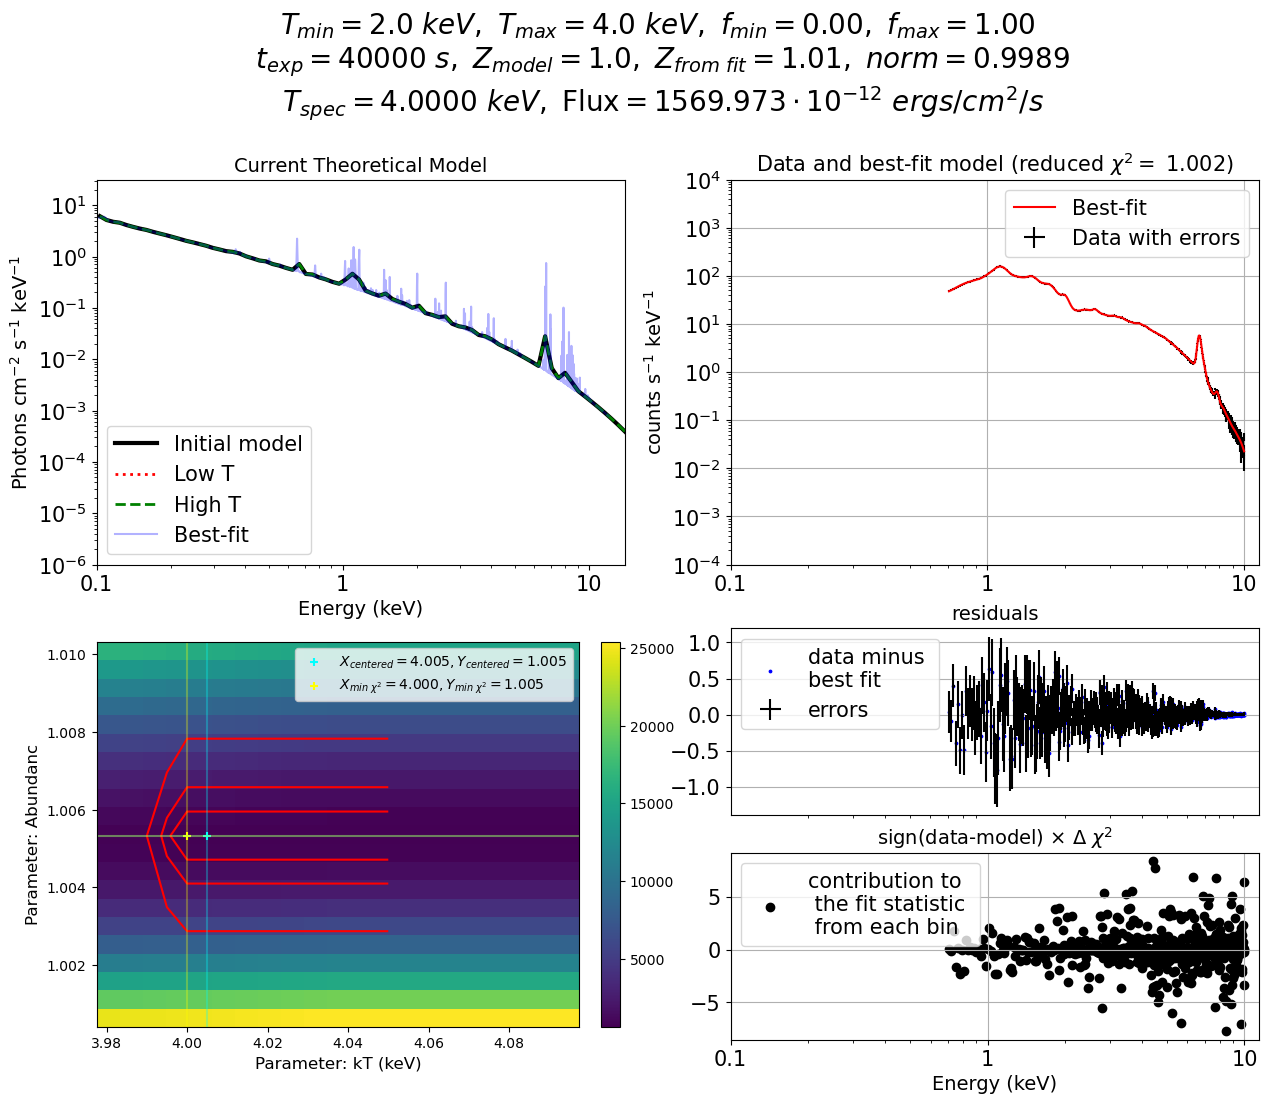

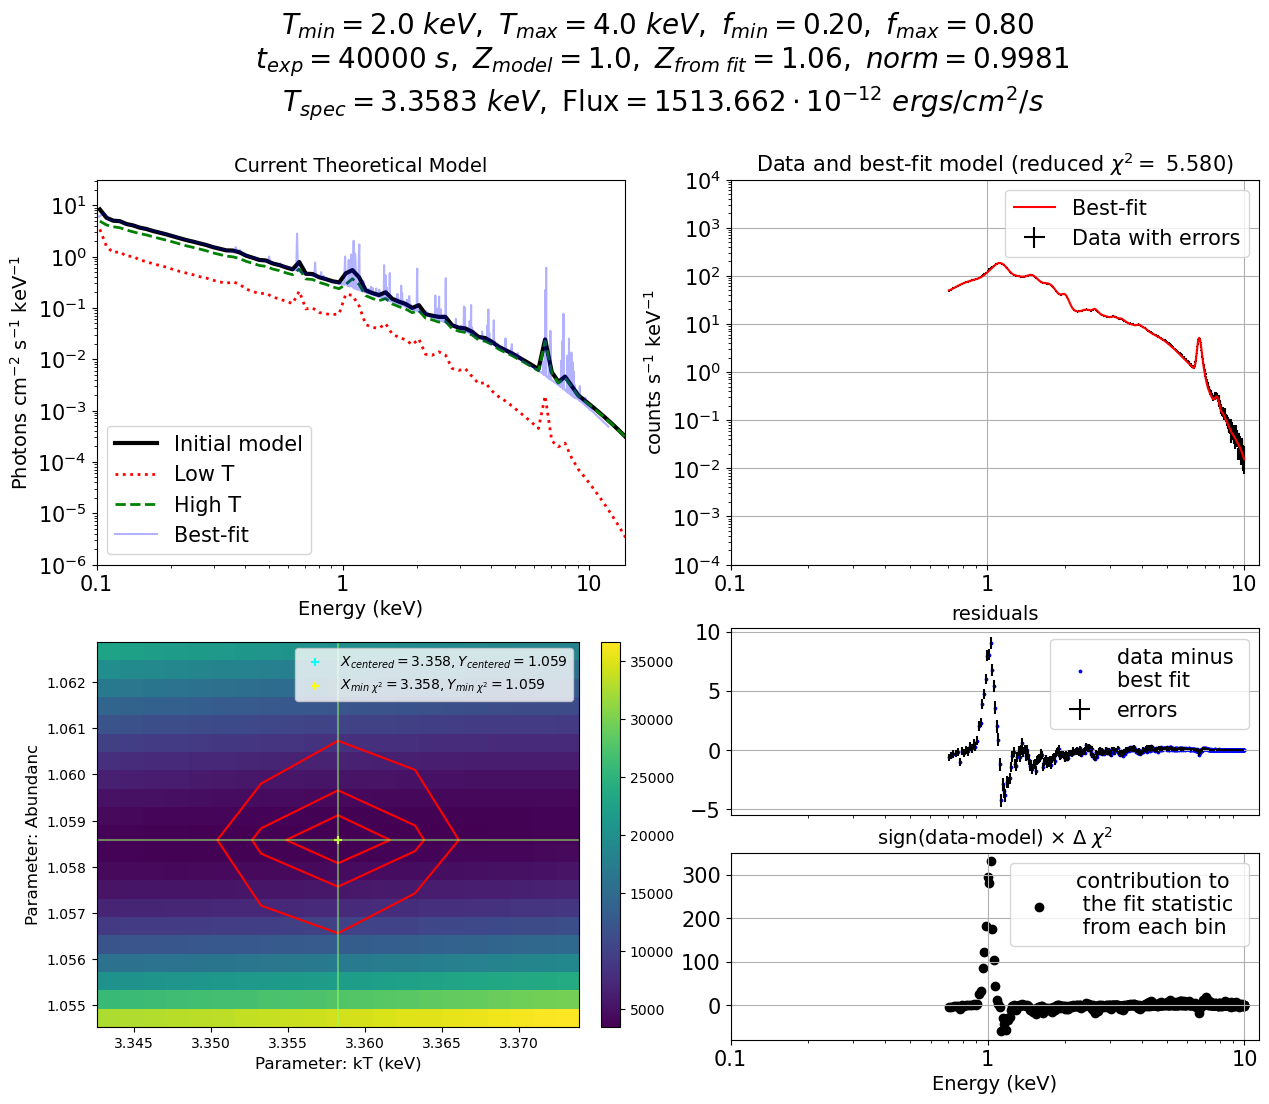

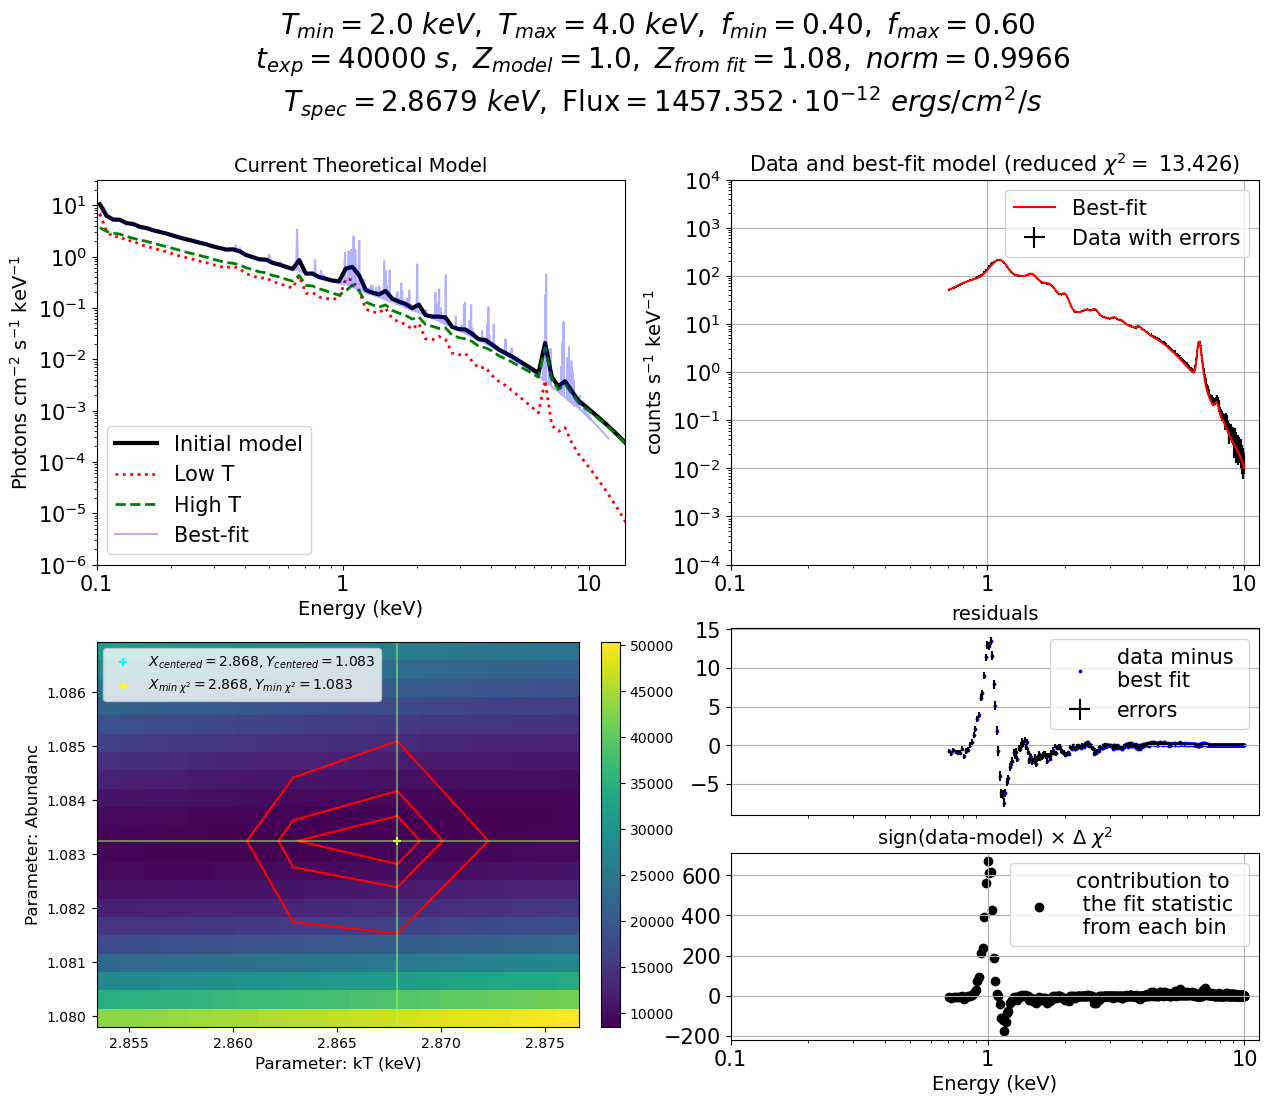

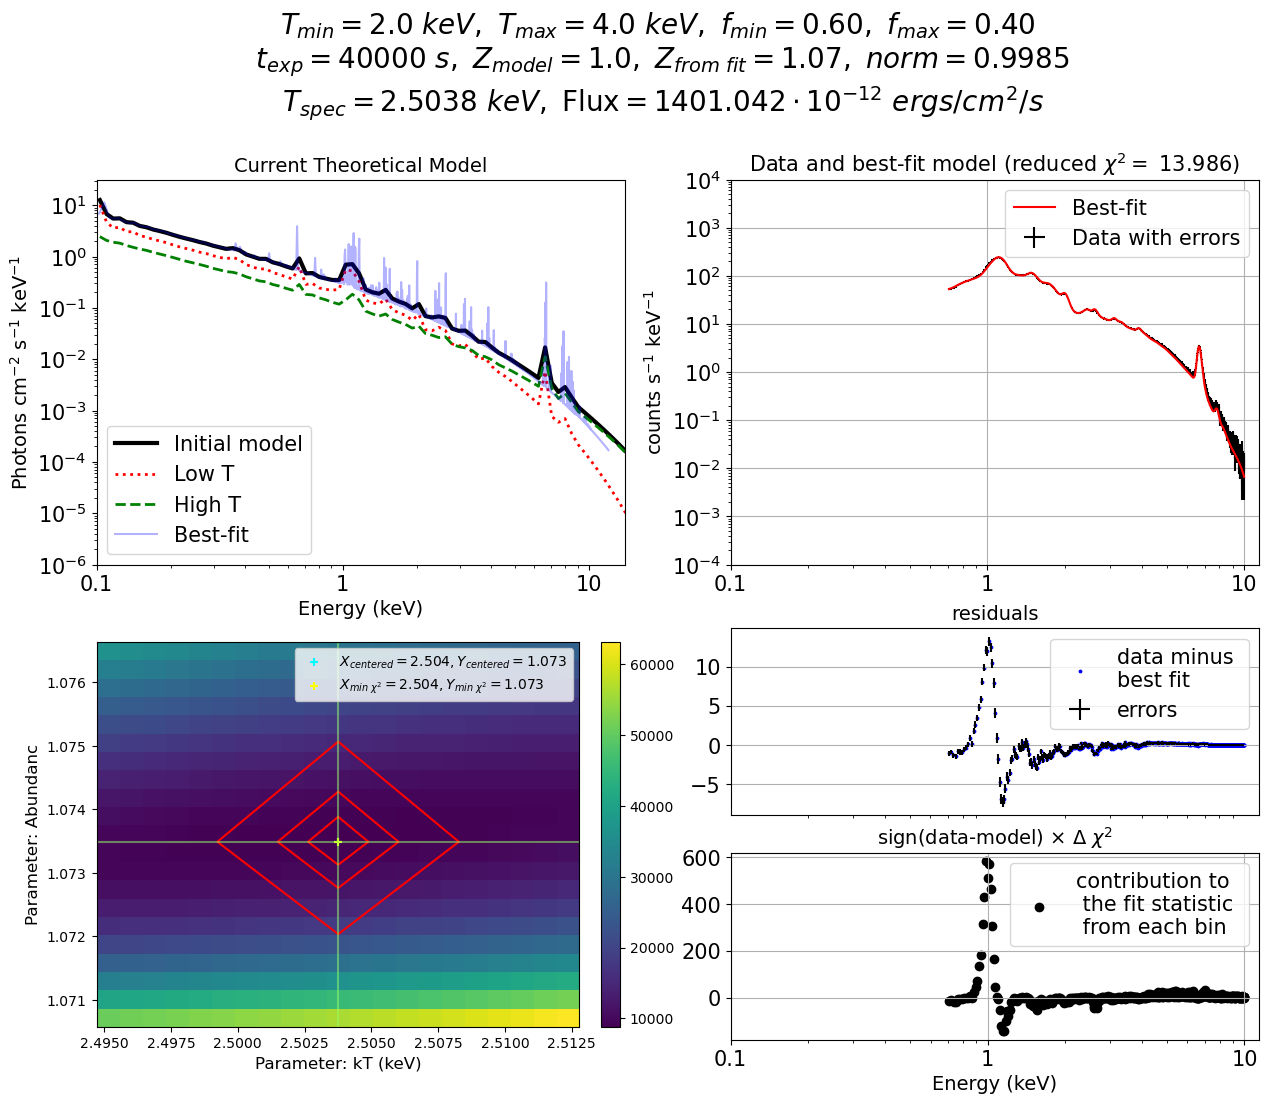

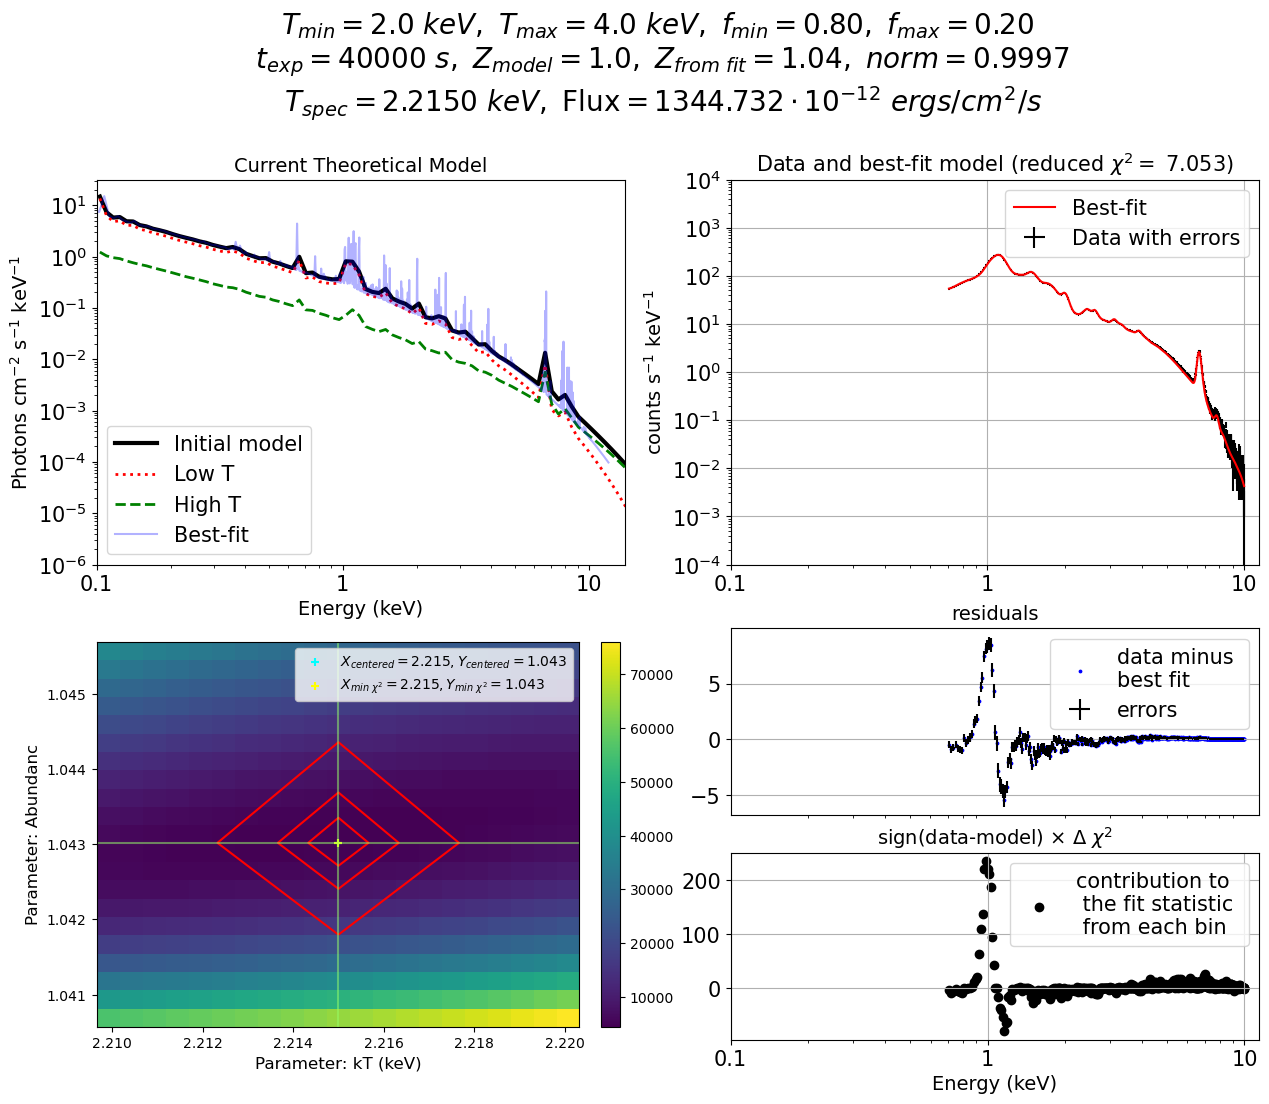

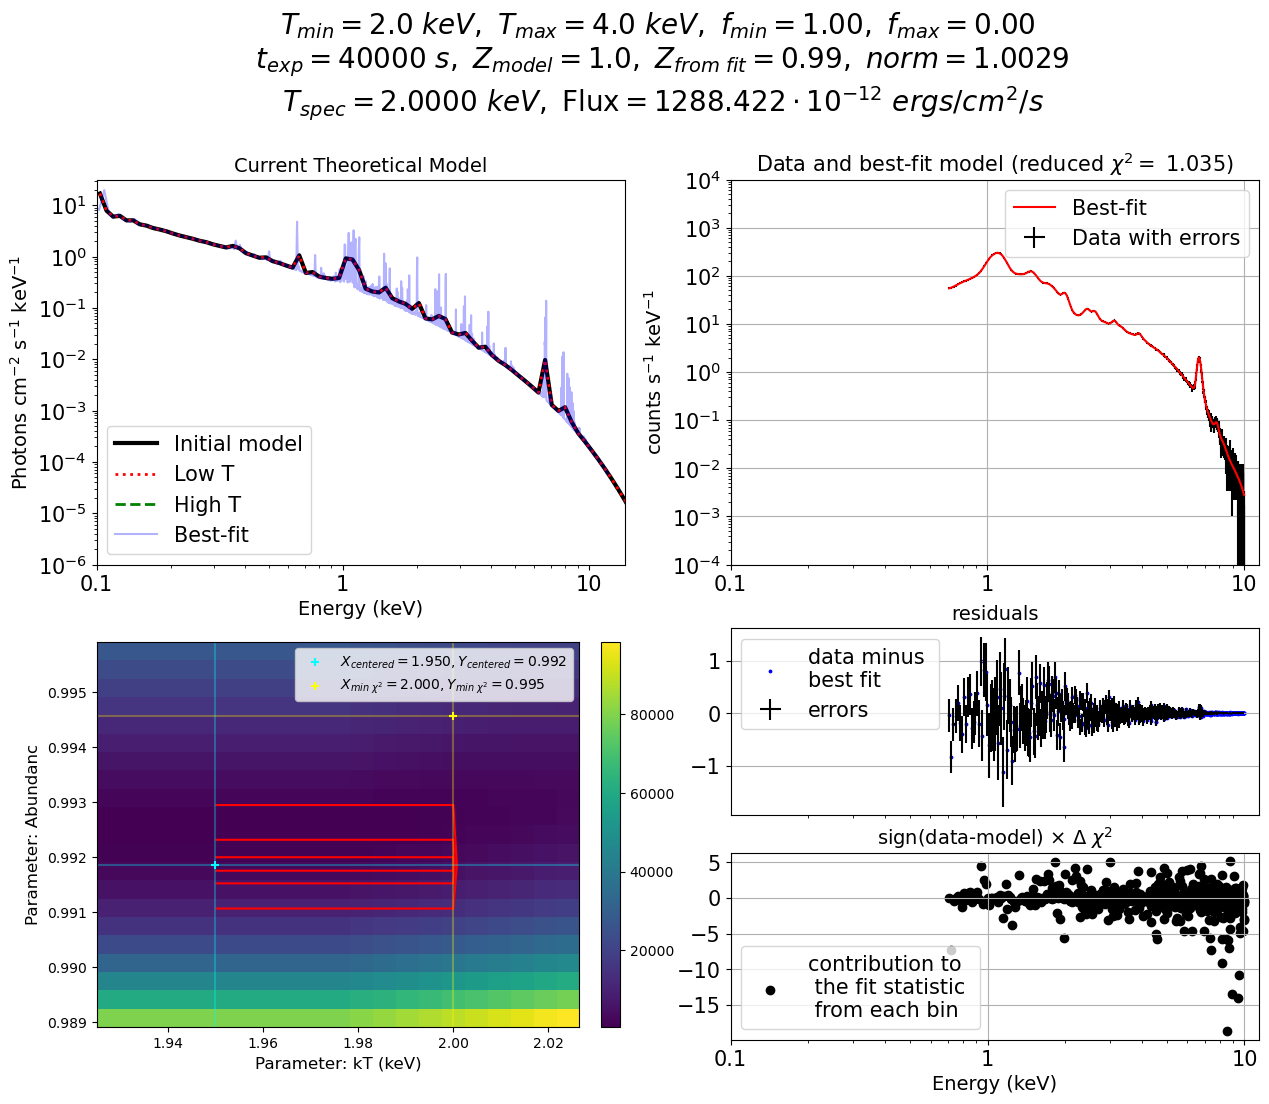

T:  [3.9999936766799187, 3.358259075057033, 2.867908560189121, 2.503756162992758, 2.214999237994721, 2.0]
F:  [1.5699725956721924e-09, 1.5136624119221884e-09, 1.4573522281721835e-09, 1.401042016832327e-09, 1.34473179048893e-09, 1.288421564145533e-09]


In [79]:
logFile = x.Xset.openLog("newLogFile.txt")

def single_T_realistic(T_minnn, T_maxxx, N_fmins, abund, telescope_name, nrm, texp, stpar=False, plot=False, Xplot=False):

    x.AllData.clear()
    x.AllData.removeDummyrsp()
    x.AllData.dummyrsp(lowE=0.1, highE=50.0, nBins=100)
    x.Xset.addModelString("APEC_TRACE_ABUND", "0")
    
    if Xplot:
        x.Plot.device = "/xs"
    else:
        x.Plot.device = '/null'

    tspec_list = []
    flux_list=[]

    for l in range(0, N_fmins):

        f_minnn = 0.0+1/(N_fmins-1)*(l)
        f_maxxx = 1-f_minnn
        
        # set model for fakeit
        mod = x.Model('phabs*(const*apec+const*apec)')
        mod.setPars(0.0, f_minnn, T_minnn, abund, 0, nrm, f_maxxx, T_maxxx, abund, 0, nrm)
        mod(9).link = "4"
        mod(10).link = "5"
        mod(11).link = "6"
        x.AllModels.show()
        
        # calculating flux
        x.AllModels.calcFlux('0.7 10.0')
        fluxx = x.AllModels(1).flux[0]/(nrm*abund)
        flux_list.append(fluxx) # in units of ergs/cm2/s 
        #or use [4] in units of photons / s / cm^2
       
        # plot model
        if plot:
            plt.figure(figsize=(15, 17))
            plt.subplot(3,2,1)
            draw_model(nrm, linesandcont=False)
        
        # data from fake spectrum
        perform_fakeit(telescope_name, str(texp))
        x.AllData.ignore("**-0.7 10.-**")             # IMPORTANT !
        x.AllData.show()
        
        # fitting
        x.AllModels.clear()
        mod2fit = x.Model("phabs*apec")
        mod2fit.setPars(0.0, 1.0, abund, 0., nrm)
        mod2fit(1).frozen = True    # n_H 
        mod2fit(2).values = f"{(T_minnn+T_maxxx)/2}, 0.001, {T_minnn}, {T_minnn}, {T_maxxx}, {T_maxxx}" # temperature
        mod2fit(3).frozen = False   # abundance
        #mod2fit(4).frozen = False  # redshift   
        #mod2fit(5).frozen = True   # norm
        #mod2fit(5).values = f"{nrm}, -1, 0.0, 0.0, 1.1, 1.1"
        
        #x.AllData.ignore("bad")
        x.Fit.renorm('auto')
        x.Fit.nIterations = 100
        x.Fit.query = 'yes'
        #x.Fit.weight = 'standard'
        x.Fit.statMethod = 'chi'
        x.Fit.perform()
        #x.Fit.goodness(10)
        #x.AllModels.show()
        x.Fit.show()

        # steppar
        if stpar:    
            N_steps = 20
            perform_steppar(mod2fit, 2, 0.05, 3, 0.5, N_steps)
            
        # return some parameters
        best_kT = mod2fit(2).values[0]
        abund_from_fit = mod2fit(3).values[0]
        norm = mod2fit(5).values[0]
        tspec_list.append(best_kT)
        #print(best_kT)

        # calculating flux
        #fluxx = x.AllData(1).rate[0]
        #flux_list.append(fluxx) # in units of counts / s
        #x.AllModels.calcFlux('0.7 10.0')
        #fluxx = x.AllData(1).flux[0]
        #flux_list.append(fluxx) # in units of ergs/cm2/s 
        # or use [4] in units of photons / s / cm^2      
        
        if plot:
            plt.suptitle(f'$T_{{min}}={T_minnn} \ keV, \ T_{{max}}={T_maxxx} \ keV, \ f_{{min}}={f_minnn:.2f}, \ f_{{max}}={f_maxxx:.2f}$ \n $t_{{exp}}={texp} \ s, \ Z_{{model}} ={abund}, \ Z_{{from \ fit}} = {abund_from_fit:.2f}, \ norm = {norm:.4f}$ \n $T_{{spec}}={best_kT:.4f} \ keV, \ $Flux$ = {fluxx*10**12:.3f}\cdot 10^{{-12}} \ ergs/cm^2/s$ \n ', fontsize = 20)
            plt.subplot(3,2,3)
            if stpar:
                plot_contours_from_steppar(N_steps, 2, 3, mod2fit, zoomin=True)
            else:
                draw_best_model(nrm, linesandcont=False)
                #draw_goodness()
            plt.subplot(3,2,2)
            draw_data_and_best_model(nrm, linesandcont=False)
            plt.subplot(3,2,1)
            draw_best_model(nrm, linesandcont=False)
            plt.show()
            
        #x.Plot.commands=()
        x.AllData.clear()

    return tspec_list, flux_list
    
aaa, aaa1 = single_T_realistic(2.0, 4.0, 6, 1.0, 'Chandra', nrm=1, texp=40000, stpar=True, plot=True, Xplot=False)
print("T: ", aaa)
print("F: ", aaa1)

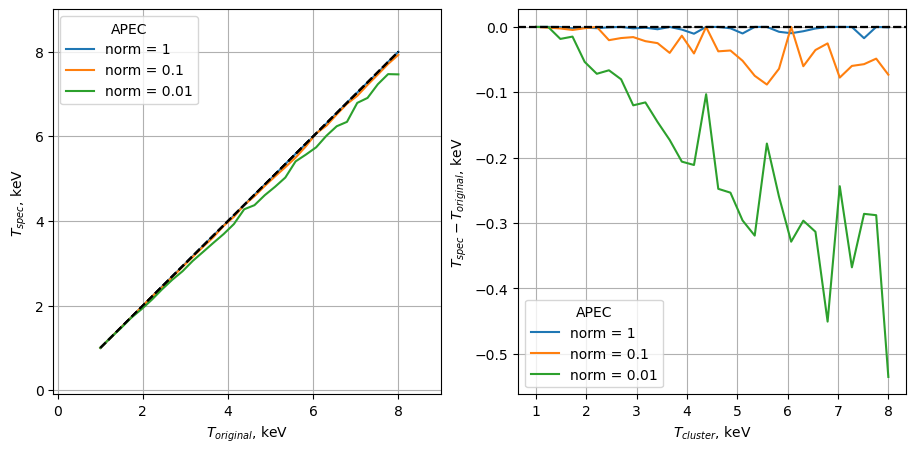

In [61]:
temps1 = np.linspace(1.0, 8.0, 30)

plt.figure(figsize=(11, 5))

for normm in (1, 0.1, 0.01):

    temps_spec = []
    temps_diff = []
        
    for t1 in temps1:
        temp_test, flux_test = single_T_realistic(1.0, t1, 2, 1.0, 'Chandra', normm, texp=40000, stpar=False, plot=False, Xplot=False)
                                   
        temps_spec.append(temp_test[0])
        temps_diff.append(temp_test[0]-t1)

    plt.subplot(1,2,1)
    plt.xlim(-0.1, temps1[-1]+1)
    plt.ylim(-0.1, temps1[-1]+1)
    plt.plot(temps1, temps_spec, label='norm = '+str(normm))
    plt.plot(temps1, temps1, linestyle = '--', color='black')
    plt.xlabel('$T_{original}$, keV')
    plt.ylabel('$T_{spec}$, keV')
    plt.grid()
    plt.legend(title='APEC')

    plt.subplot(1,2,2)
    plt.plot(temps1, temps_diff, label='norm = '+str(normm))
    plt.axhline(0, linestyle = '--', color='black')
    plt.xlabel('$T_{cluster}$, keV')
    plt.ylabel('$T_{spec}-T_{original}$, keV')
    plt.grid()
    plt.legend(title='APEC')
    
plt.show()

## 3.2 Figure 5

In [80]:
telescope = 'Chandra' 
#telescope = 'SRG/eROSITA'

f_min = np.linspace(0, 1, 11)
T_spec = f_min*0

T_mins = (1.0, 2.0)
T_maxs = (3.0, 6.0)

Tspec_continuum_fit_fig5 = {}
Tspec_cont_all_fig5 = {}
single_T_fit_all_fig5 = {}
Tspec_lines_all_fig5 = {}

exxxpo = 40000
normmm = 1

for T_min, T_max in list(zip(T_mins, T_maxs)):
    
    #Tsum = np.zeros(11)
    
    Tspec_cont_all_fig5[str(T_min)+'-'+str(T_max)] = get_Tspec_continuum_eq46(f_min, T_min, T_max, 0.875, telescope)
    Tspec_continuum_fit_fig5[str(T_min)+'-'+str(T_max)] = single_T_fit_continuum(T_min, T_max, len(f_min), telescope, normmm, exxxpo, stpar=True, plot=False, Xplot=False)[0]
    
    #N_trials = 10
    #for i in range(0, N_trials):
    #    Tspec_continuum_fit_fig5[str(T_min)+'-'+str(T_max)] = single_T_fit_continuum(T_min, T_max, len(f_min), telescope, normmm, exxxpo, stpar=False, plot=False, Xplot=False)[0]
        #plt.plot(f_min, Tspec_continuum_fit_fig5[str(T_min)+'-'+str(T_max)])
    #    Tsum += Tspec_continuum_fit_fig5[str(T_min)+'-'+str(T_max)]
    #Tspec_continuum_fit_fig5[str(T_min)+'-'+str(T_max)] = Tsum/N_trials
    
    if T_min == 1.0:
        single_T_fit_all_fig5[str(T_min)+'-'+str(T_max)] = single_T_realistic(T_min, T_max, len(f_min), 0.1, telescope, normmm, exxxpo, stpar=True, plot=False, Xplot=False)[0]
        Tspec_lines_all_fig5[str(T_min)+'-'+str(T_max)] = single_T_fit_lines(T_min, T_max, len(f_min), 5, telescope, normmm, exxxpo, stpar=True, plot = False, Xplot=False)[0]
    if T_min == 2.0:
        single_T_fit_all_fig5[str(T_min)+'-'+str(T_max)] = single_T_realistic(T_min, T_max, len(f_min), 0.3, telescope, normmm, exxxpo, stpar=True, plot=False, Xplot=False)[0]
        Tspec_lines_all_fig5[str(T_min)+'-'+str(T_max)] = single_T_fit_lines(T_min, T_max, len(f_min), 5, telescope, normmm, exxxpo, stpar=True, plot = False, Xplot=False)[0]
    
    print(str(T_min)+'-'+str(T_max)+": done")
    
def print_values(TSPEC_LISTS):
    
    for item in TSPEC_LISTS:
   
        for key in item.keys():
            print(key, 'keV')
            print([f'{vl:.2f}' for vl in item[key]], '\n')
            
#print_values([Tspec_cont_all_fig5, single_T_fit_all_fig5])

1.0-3.0: done
2.0-6.0: done


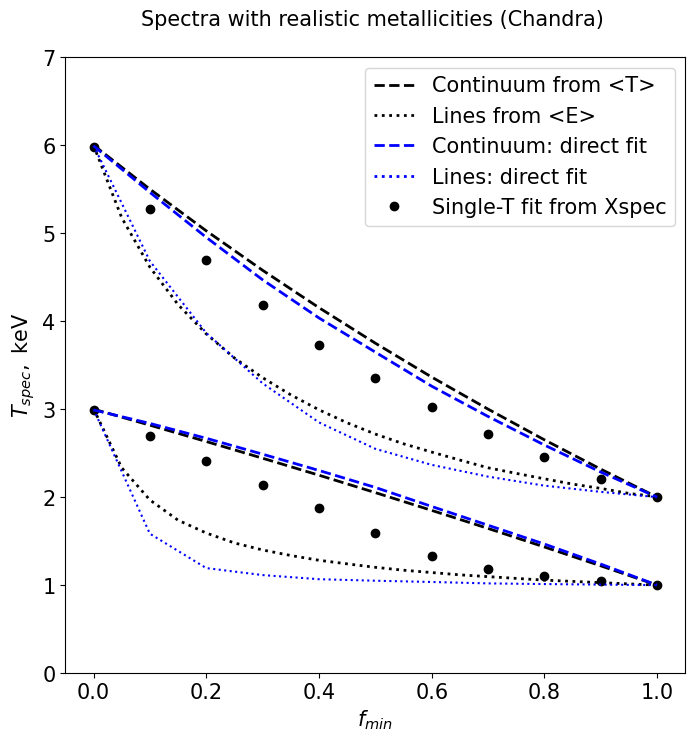

In [81]:
plt.figure(figsize=(8,8))

#telescope = 'Chandra' 
#telescope = 'SRG/eROSITA'
#f_min = np.linspace(0, 1, 6)
#T_mins = (1.0, 2.0)
#T_maxs = (3.0, 6.0)

for T_min, T_max in list(zip(T_mins, T_maxs)):
    
    # line-dominated from <E>
    plot_Tspec_fmin(T_min, T_max, 20, get_data("data/stats_03.dat", show_table=False), naive=False, lstyle=':', cline='black')
    #Tspec_list3 = f_min*0
    #for i in range(0, len(f_min)):
    #    Tspec_list3[i] = get_Tspec_lines(f_min[i], T_min, T_max, get_data("data/stats_12.dat", show_table=False))
    #plt.plot(f_min, Tspec_list3, linestyle=':', color='black')
    
    # line-dominated from direct fit
    Tspec_list4 = Tspec_lines_all_fig5[str(T_min)+'-'+str(T_max)]
    plt.plot(f_min, Tspec_list4, linestyle=':', color='blue')
    
    # continuum from eq. 4,6
    Tspec_list1 = Tspec_cont_all_fig5[str(T_min)+'-'+str(T_max)]
    plt.plot(f_min, Tspec_list1, linestyle = '--', linewidth = 2, color = 'black')
    
    # continuum from direct fit
    Tspec_list5 = Tspec_continuum_fit_fig5[str(T_min)+'-'+str(T_max)]
    plt.plot(f_min, Tspec_list5, linestyle = '--', linewidth = 2, color = 'blue')
    
    # realistic metallicities
    Tspec_list2 = single_T_fit_all_fig5[str(T_min)+'-'+str(T_max)]
    plt.scatter(f_min, Tspec_list2, color='black')
    #Tspec_list = Tspec_cont_all[str(T_min)+'-'+str(T_max)]
    #plt.scatter(np.linspace(0, 1, len(Tspec_list)), Tspec_list, color='black')
    #plt.plot(np.linspace(0, 1, len(Tspec_list)), Tspec_list, color='black', linewidth=1) 
    
handles, labels = plt.gca().get_legend_handles_labels()
line_n = Line2D([], [], label='Continuum from <T>', color='black', linestyle='--', linewidth=2)
line_e = Line2D([], [], label='Lines from <E>', color='black', linestyle=':', linewidth=2)
line_n1 = Line2D([], [], label='Continuum: direct fit', color='blue', linestyle='--', linewidth=2)
line_e1 = Line2D([], [], label='Lines: direct fit', color='blue', linestyle=':', linewidth=2)
dots_f = Line2D([], [], label='Single-T fit from Xspec', color='black', marker='.', linestyle='None', markersize=12)
handles.extend([line_n, line_e, line_n1, line_e1, dots_f])
plt.legend(handles=handles, fontsize=15)
    
plt.ylim(0, 7)
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('$f_{min}$', fontsize = 15)
plt.ylabel('$T_{spec},$ keV', fontsize = 15)
plt.title('Spectra with realistic metallicities ('+telescope+') \n', fontsize = 15)
#plt.savefig('Fig5_eROSITA.png')
plt.show()

# Finally, x($f_{line}$)

Figure 6.

In [66]:
def universal_function(flin, delta1, delta2, beta):
    
    return np.exp( -(flin/delta1)**(2*beta) ) * np.exp( -(flin/delta2)**(8) )

In [178]:
telescope = 'Chandra' 
#telescope = 'SRG/eROSITA'

f_min = np.linspace(0, 1, 11)

T_mins = (0.5, 1., 2., 3., 0.5, 1., 2., 3., 0.5, 1., 2., 3.)
T_maxs = (1. , 2., 4., 6., 1.5, 3., 6., 9., 2. , 4., 8., 12.)

metallicities = (0.1, 0.3, 1.0)

exxxpo = 40000
normmmm = 1

Tspec_lines_f6 = {}
Tspec_cont_f6 = {}
single_T_fit_f6 = {}

Flux_lines_f6 = {}
Flux_cont_f6 = {}
Flux_fit_f6 = {}

print(telescope)

for metallicity in metallicities:

    for T_min, T_max in list(zip(T_mins, T_maxs)):

        name = str(metallicity)+': '+str(T_min)+'-'+str(T_max)

        Tspec_cont_f6[name], Flux_cont_f6[name] = single_T_fit_continuum(T_min, T_max, len(f_min), telescope, normmmm, exxxpo, stpar=False, plot=False, Xplot=False)
        single_T_fit_f6[name], Flux_fit_f6[name] = single_T_realistic(T_min, T_max, len(f_min), metallicity, telescope, normmmm, exxxpo, stpar=False, plot=False, Xplot=False)
        Tspec_lines_f6[name], Flux_lines_f6[name] = single_T_fit_lines(T_min, T_max, len(f_min), metallicity, telescope, normmmm, exxxpo, stpar=False, plot = False, Xplot=False)
        
        print(name + ' done')
        
        #plt.plot(f_min, Tspec_list1, linestyle = '--', linewidth = 2, color = 'black')
        #plt.scatter(f_min, Tspec_list2, color='black')
        #plt.plot(f_min, Tspec_list3, linestyle=':', color='black')
        #plt.show()
        
#print_values([Flux_lines_f6, Flux_cont_f6, Flux_fit_f6])
#print_values([Tspec_lines_f6, Tspec_cont_f6, single_T_fit_f6])

Chandra
0.1: 0.5-1.0 done
0.1: 1.0-2.0 done
0.1: 2.0-4.0 done
0.1: 3.0-6.0 done
0.1: 0.5-1.5 done
0.1: 1.0-3.0 done
0.1: 2.0-6.0 done
0.1: 3.0-9.0 done
0.1: 0.5-2.0 done
0.1: 1.0-4.0 done
0.1: 2.0-8.0 done
0.1: 3.0-12.0 done
0.3: 0.5-1.0 done
0.3: 1.0-2.0 done
0.3: 2.0-4.0 done
0.3: 3.0-6.0 done
0.3: 0.5-1.5 done
0.3: 1.0-3.0 done
0.3: 2.0-6.0 done
0.3: 3.0-9.0 done
0.3: 0.5-2.0 done
0.3: 1.0-4.0 done
0.3: 2.0-8.0 done
0.3: 3.0-12.0 done
1.0: 0.5-1.0 done
1.0: 1.0-2.0 done
1.0: 2.0-4.0 done
1.0: 3.0-6.0 done
1.0: 0.5-1.5 done
1.0: 1.0-3.0 done
1.0: 2.0-6.0 done
1.0: 3.0-9.0 done
1.0: 0.5-2.0 done
1.0: 1.0-4.0 done
1.0: 2.0-8.0 done
1.0: 3.0-12.0 done


In [179]:
#for key in Flux_lines_f6.keys():
#    print(key, 'keV')
    #print([vl*10**10 for vl in Flux_lines_f6[key]], '\n')
    #print([vl*10**10 for vl in Flux_cont_f6[key]], '\n')
    #print([(vl1 + vl2)*10**10 for vl1, vl2 in zip(Flux_lines_f6[key], Flux_cont_f6[key])], '\n')
    #print([vl*10**10 for vl in Flux_fit_f6[key]], '\n')

F_cnt + F_lin = F_sum =?= F_fit
316.73 + 207.52 = 524.25 =?= 522.89 ....... f_line = 0.40, x = 1.77
296.18 + 209.40 = 505.58 =?= 502.86 ....... f_line = 0.41, x = -0.14
275.64 + 211.28 = 486.91 =?= 482.82 ....... f_line = 0.43, x = -0.39
255.09 + 213.16 = 468.25 =?= 462.79 ....... f_line = 0.46, x = -0.34
234.54 + 215.03 = 449.58 =?= 442.75 ....... f_line = 0.48, x = -0.29
214.00 + 216.91 = 430.91 =?= 422.72 ....... f_line = 0.50, x = -0.30
193.45 + 218.79 = 412.24 =?= 402.69 ....... f_line = 0.53, x = -0.17
172.91 + 220.67 = 393.57 =?= 382.65 ....... f_line = 0.56, x = -0.07
152.36 + 222.54 = 374.90 =?= 362.62 ....... f_line = 0.59, x = -0.18
131.81 + 224.42 = 356.23 =?= 342.59 ....... f_line = 0.63, x = 0.11
111.27 + 226.30 = 337.57 =?= 322.55 ....... f_line = 0.67, x = 1.00


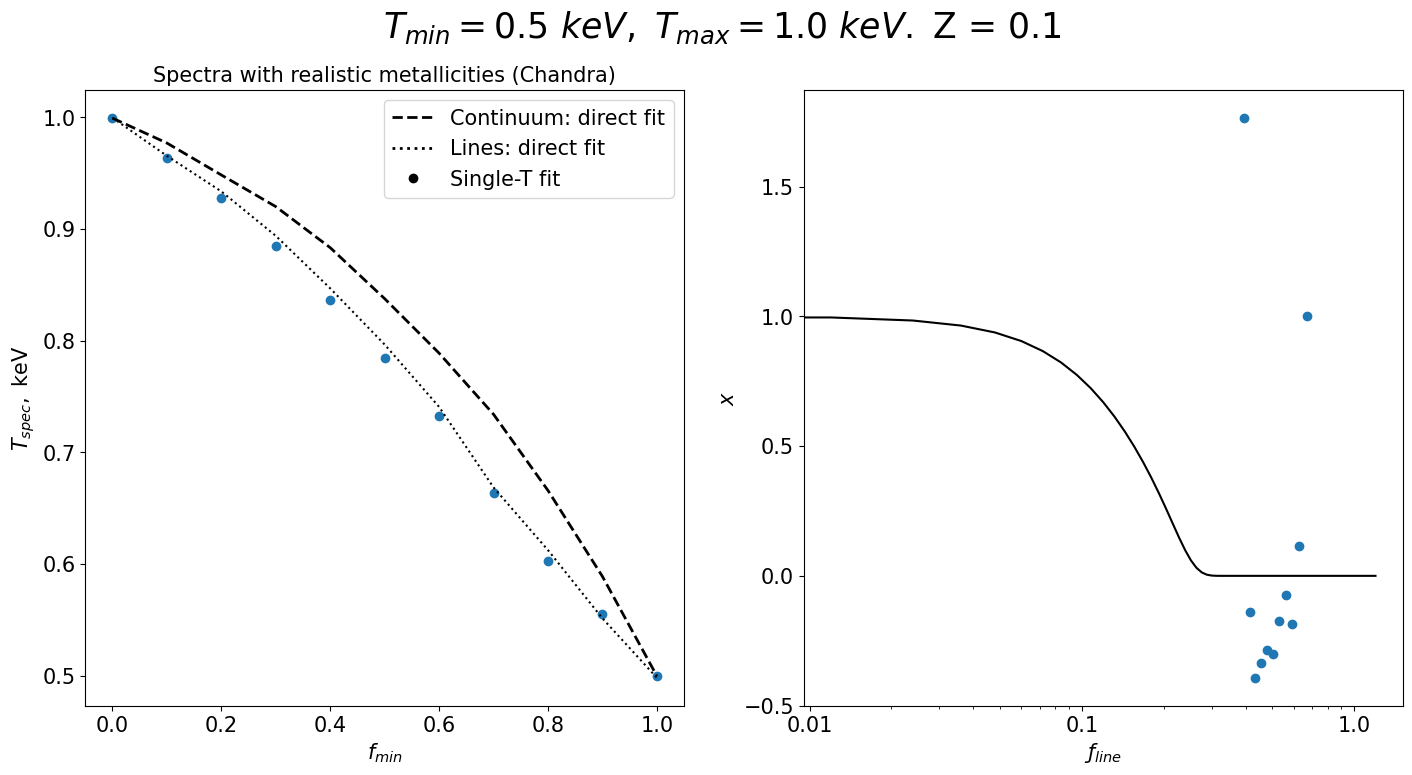

F_cnt + F_lin = F_sum =?= F_fit
659.40 + 63.06 = 722.47 =?= 722.31 ....... f_line = 0.09, x = 1.18
625.14 + 77.51 = 702.64 =?= 702.36 ....... f_line = 0.11, x = 0.80
590.87 + 91.95 = 682.82 =?= 682.42 ....... f_line = 0.13, x = 0.70
556.60 + 106.40 = 663.00 =?= 662.48 ....... f_line = 0.16, x = 0.64
522.33 + 120.85 = 643.18 =?= 642.54 ....... f_line = 0.19, x = 0.51
488.07 + 135.29 = 623.36 =?= 622.60 ....... f_line = 0.22, x = 0.38
453.80 + 149.74 = 603.54 =?= 602.66 ....... f_line = 0.25, x = 0.30
419.53 + 164.18 = 583.72 =?= 582.71 ....... f_line = 0.28, x = 0.24
385.26 + 178.63 = 563.89 =?= 562.77 ....... f_line = 0.32, x = 0.20
351.00 + 193.08 = 544.07 =?= 542.83 ....... f_line = 0.35, x = 0.18
316.73 + 207.52 = 524.25 =?= 522.89 ....... f_line = 0.40, x = 2.50


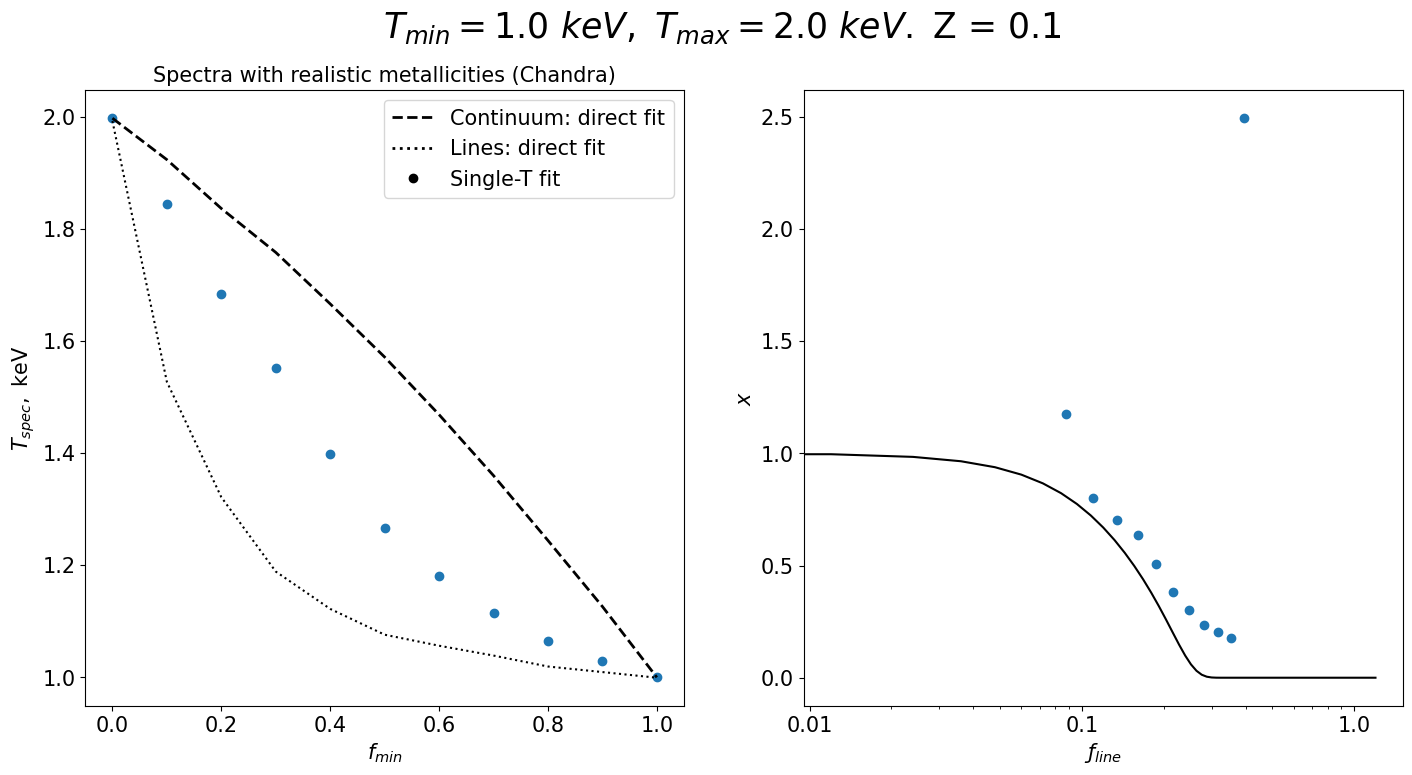

F_cnt + F_lin = F_sum =?= F_fit
1093.35 + 47.83 = 1141.18 =?= 1141.01 ....... f_line = 0.04, x = 0.93
1049.96 + 49.36 = 1099.31 =?= 1099.14 ....... f_line = 0.04, x = 0.89
1006.56 + 50.88 = 1057.44 =?= 1057.27 ....... f_line = 0.05, x = 0.94
963.17 + 52.40 = 1015.57 =?= 1015.40 ....... f_line = 0.05, x = 0.93
919.77 + 53.92 = 973.70 =?= 973.53 ....... f_line = 0.06, x = 0.92
876.38 + 55.45 = 931.82 =?= 931.66 ....... f_line = 0.06, x = 0.90
832.98 + 56.97 = 889.95 =?= 889.79 ....... f_line = 0.06, x = 0.90
789.59 + 58.49 = 848.08 =?= 847.92 ....... f_line = 0.07, x = 0.91
746.19 + 60.02 = 806.21 =?= 806.05 ....... f_line = 0.07, x = 0.88
702.80 + 61.54 = 764.34 =?= 764.18 ....... f_line = 0.08, x = 0.91
659.40 + 63.06 = 722.47 =?= 722.31 ....... f_line = 0.09, x = 1.00


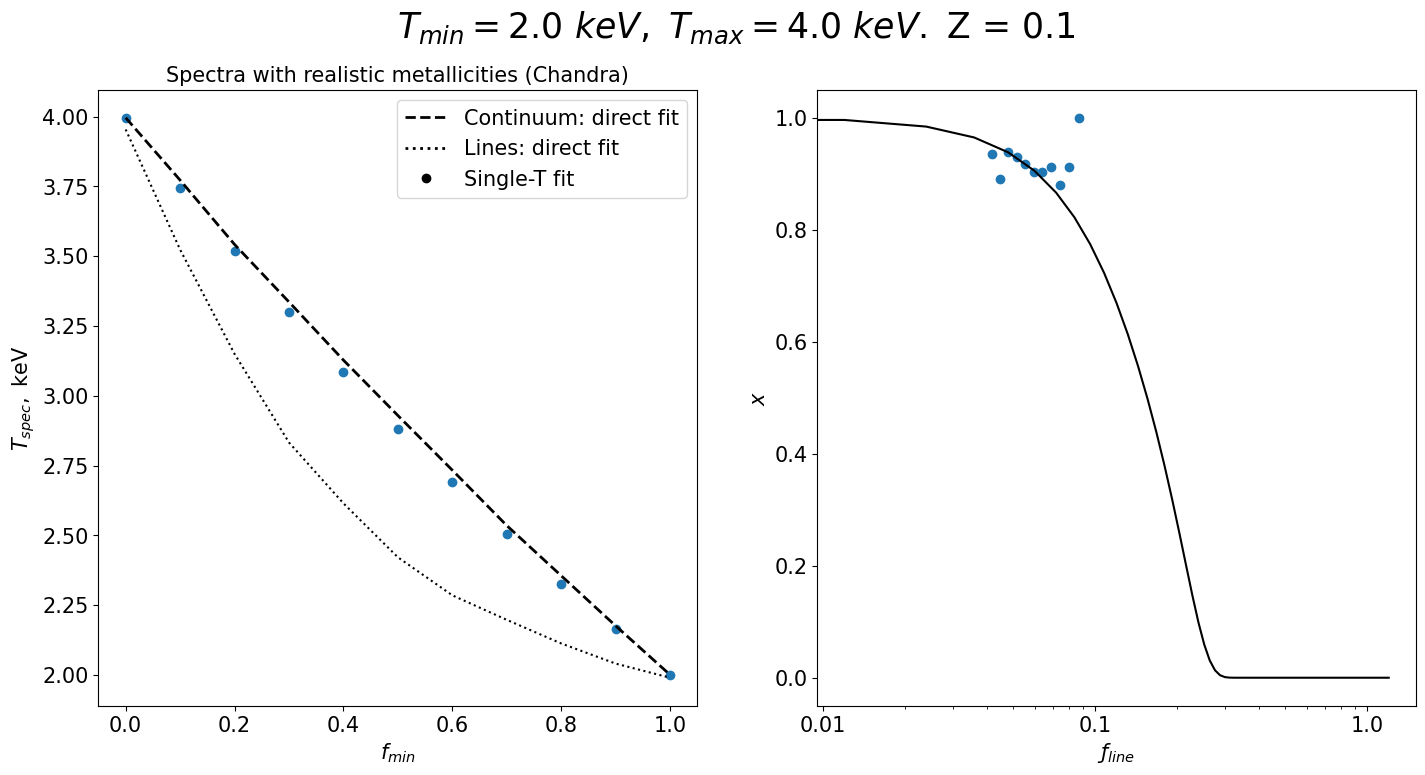

F_cnt + F_lin = F_sum =?= F_fit
1332.37 + 45.45 = 1377.83 =?= 1377.69 ....... f_line = 0.03, x = 0.68
1290.01 + 45.94 = 1335.95 =?= 1335.81 ....... f_line = 0.03, x = 0.89
1247.64 + 46.43 = 1294.07 =?= 1293.93 ....... f_line = 0.04, x = 0.92
1205.28 + 46.92 = 1252.20 =?= 1252.05 ....... f_line = 0.04, x = 0.88
1162.91 + 47.41 = 1210.32 =?= 1210.17 ....... f_line = 0.04, x = 0.89
1120.55 + 47.90 = 1168.45 =?= 1168.30 ....... f_line = 0.04, x = 0.92
1078.18 + 48.39 = 1126.57 =?= 1126.42 ....... f_line = 0.04, x = 0.93
1035.82 + 48.88 = 1084.69 =?= 1084.54 ....... f_line = 0.05, x = 0.90
993.45 + 49.36 = 1042.82 =?= 1042.66 ....... f_line = 0.05, x = 0.94
951.09 + 49.85 = 1000.94 =?= 1000.78 ....... f_line = 0.05, x = 0.93
908.73 + 50.34 = 959.07 =?= 958.90 ....... f_line = 0.05, x = 1.08


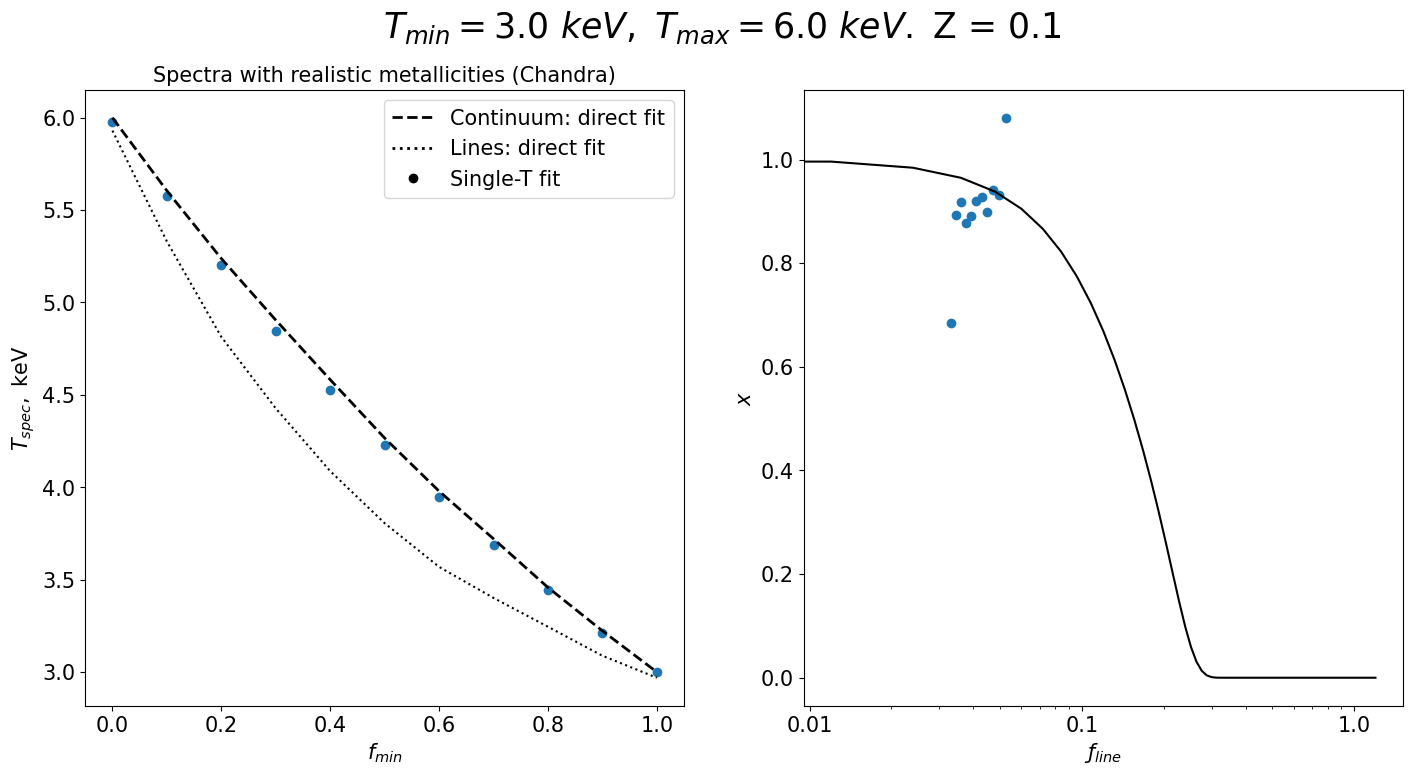

F_cnt + F_lin = F_sum =?= F_fit
501.70 + 93.24 = 594.93 =?= 594.70 ....... f_line = 0.16, x = 0.69
462.66 + 106.54 = 569.20 =?= 567.49 ....... f_line = 0.19, x = 0.07
423.61 + 119.85 = 543.46 =?= 540.27 ....... f_line = 0.22, x = -0.00
384.57 + 133.15 = 517.72 =?= 513.06 ....... f_line = 0.26, x = 0.02
345.53 + 146.46 = 491.99 =?= 485.84 ....... f_line = 0.30, x = 0.08
306.48 + 159.77 = 466.25 =?= 458.63 ....... f_line = 0.34, x = 0.39
267.44 + 173.07 = 440.51 =?= 431.41 ....... f_line = 0.39, x = 0.29
228.40 + 186.38 = 414.78 =?= 404.20 ....... f_line = 0.45, x = 0.22
189.35 + 199.69 = 389.04 =?= 376.98 ....... f_line = 0.51, x = 0.20
150.31 + 212.99 = 363.30 =?= 349.77 ....... f_line = 0.59, x = 0.23
111.27 + 226.30 = 337.57 =?= 322.55 ....... f_line = 0.67, x = 1.00


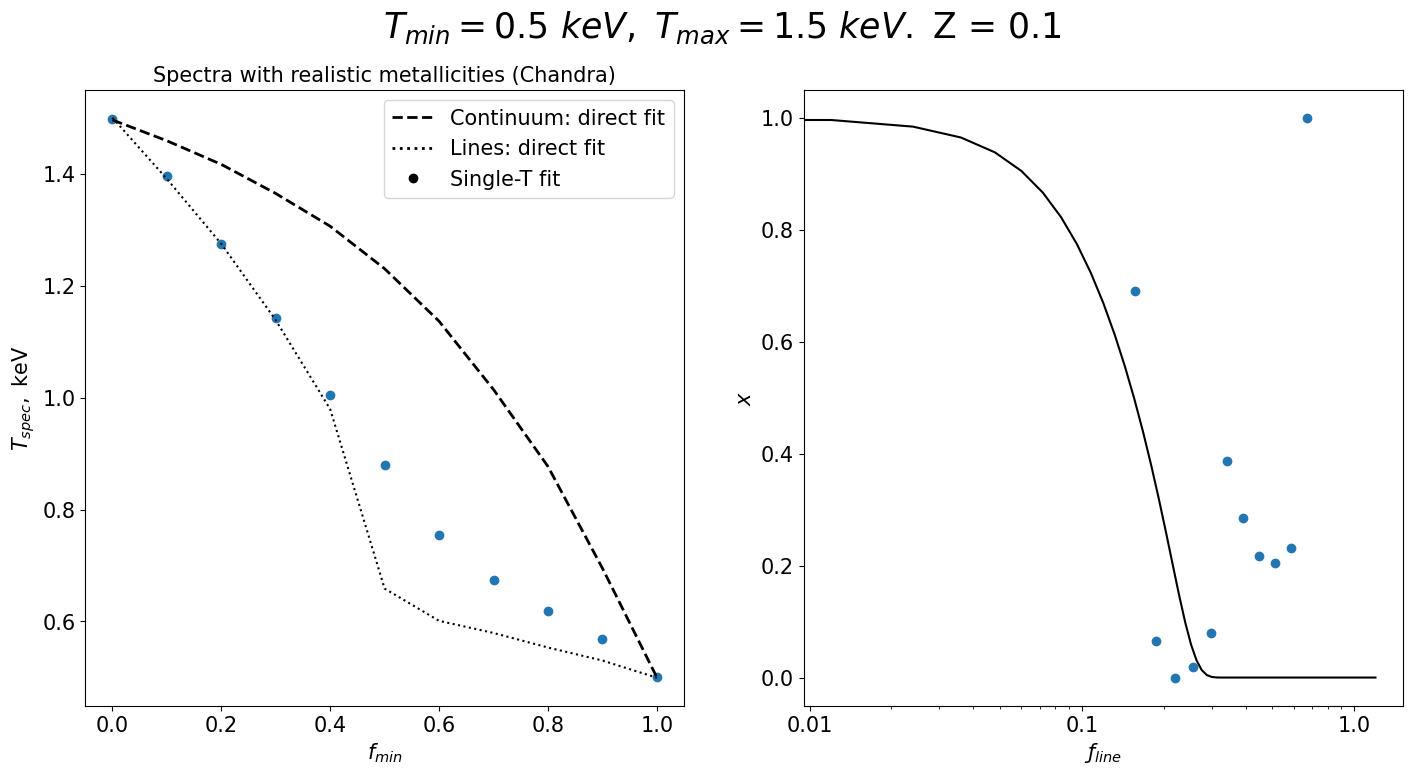

F_cnt + F_lin = F_sum =?= F_fit
908.73 + 50.34 = 959.07 =?= 958.90 ....... f_line = 0.05, x = 1.09
849.53 + 66.06 = 915.59 =?= 915.30 ....... f_line = 0.07, x = 0.89
790.33 + 81.78 = 872.10 =?= 871.70 ....... f_line = 0.09, x = 0.83
731.13 + 97.50 = 828.62 =?= 828.10 ....... f_line = 0.12, x = 0.74
671.93 + 113.21 = 785.14 =?= 784.50 ....... f_line = 0.14, x = 0.65
612.73 + 128.93 = 741.66 =?= 740.90 ....... f_line = 0.17, x = 0.55
553.53 + 144.65 = 698.18 =?= 697.30 ....... f_line = 0.21, x = 0.34
494.33 + 160.37 = 654.70 =?= 653.69 ....... f_line = 0.24, x = 0.25
435.13 + 176.09 = 611.21 =?= 610.09 ....... f_line = 0.29, x = 0.20
375.93 + 191.80 = 567.73 =?= 566.49 ....... f_line = 0.34, x = 0.17
316.73 + 207.52 = 524.25 =?= 522.89 ....... f_line = 0.40, x = 1.00


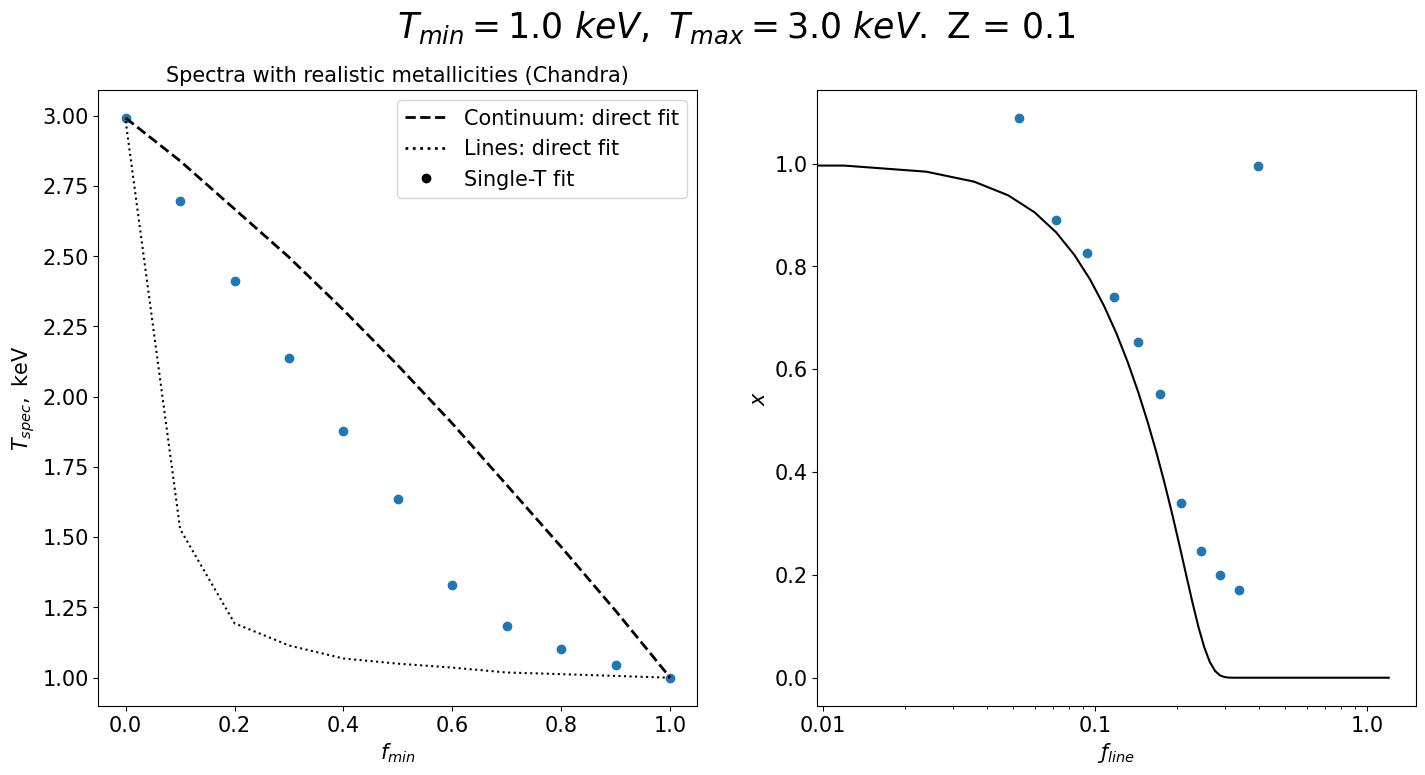

F_cnt + F_lin = F_sum =?= F_fit
1332.37 + 45.45 = 1377.83 =?= 1377.69 ....... f_line = 0.03, x = 0.79
1265.08 + 47.21 = 1312.29 =?= 1312.15 ....... f_line = 0.04, x = 0.91
1197.78 + 48.97 = 1246.75 =?= 1246.61 ....... f_line = 0.04, x = 0.91
1130.48 + 50.74 = 1181.22 =?= 1181.07 ....... f_line = 0.04, x = 0.90
1063.19 + 52.50 = 1115.68 =?= 1115.53 ....... f_line = 0.05, x = 0.91
995.89 + 54.26 = 1050.15 =?= 1050.00 ....... f_line = 0.05, x = 0.90
928.59 + 56.02 = 984.61 =?= 984.46 ....... f_line = 0.06, x = 0.89
861.29 + 57.78 = 919.07 =?= 918.92 ....... f_line = 0.06, x = 0.89
794.00 + 59.54 = 853.54 =?= 853.38 ....... f_line = 0.07, x = 0.89
726.70 + 61.30 = 788.00 =?= 787.84 ....... f_line = 0.08, x = 0.88
659.40 + 63.06 = 722.47 =?= 722.31 ....... f_line = 0.09, x = 1.00


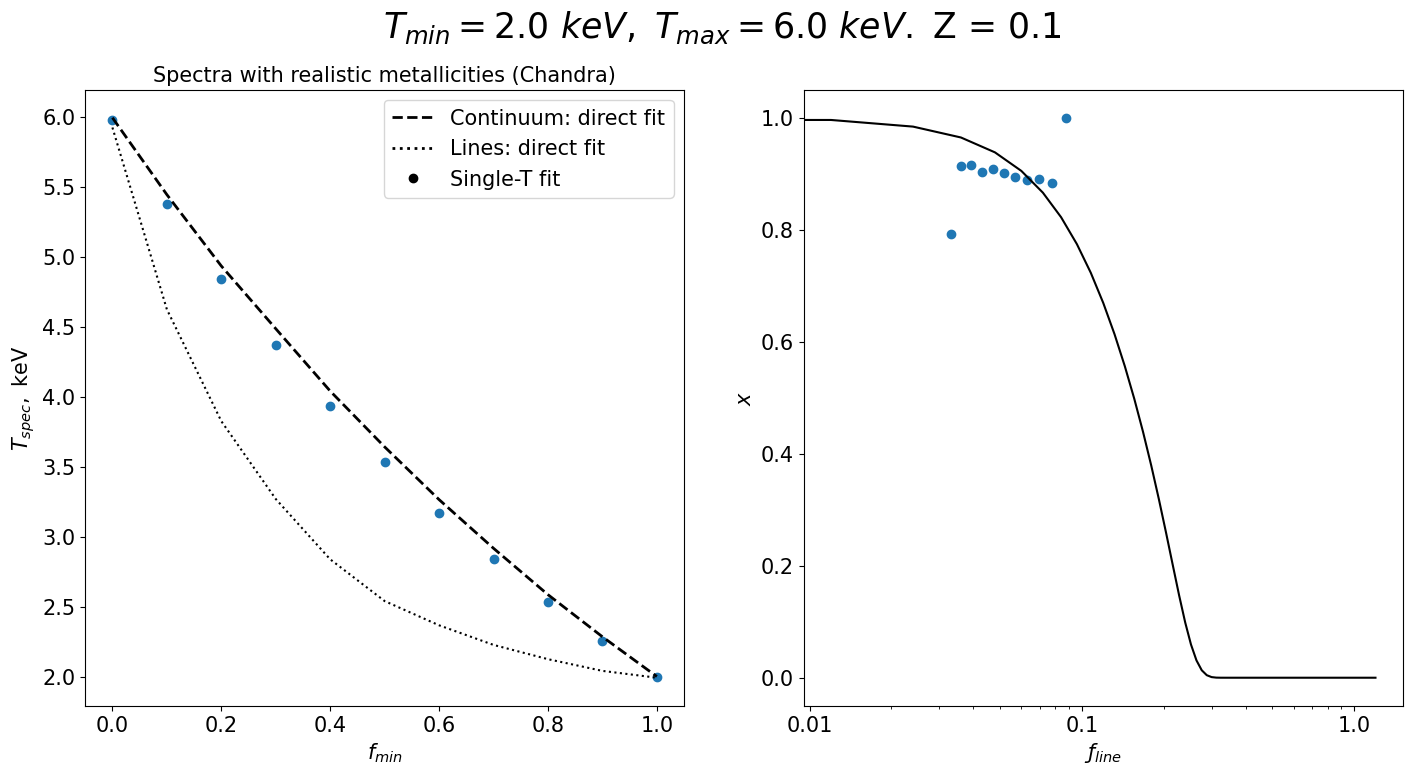

F_cnt + F_lin = F_sum =?= F_fit
1513.45 + 40.18 = 1553.63 =?= 1553.56 ....... f_line = 0.03, x = -0.65
1452.97 + 41.20 = 1494.17 =?= 1494.09 ....... f_line = 0.03, x = 0.97
1392.50 + 42.21 = 1434.72 =?= 1434.63 ....... f_line = 0.03, x = 0.93
1332.03 + 43.23 = 1375.26 =?= 1375.16 ....... f_line = 0.03, x = 0.94
1271.56 + 44.25 = 1315.80 =?= 1315.70 ....... f_line = 0.03, x = 0.93
1211.09 + 45.26 = 1256.35 =?= 1256.23 ....... f_line = 0.04, x = 0.90
1150.61 + 46.28 = 1196.89 =?= 1196.77 ....... f_line = 0.04, x = 0.91
1090.14 + 47.29 = 1137.44 =?= 1137.30 ....... f_line = 0.04, x = 0.91
1029.67 + 48.31 = 1077.98 =?= 1077.84 ....... f_line = 0.04, x = 0.92
969.20 + 49.33 = 1018.52 =?= 1018.37 ....... f_line = 0.05, x = 0.93
908.73 + 50.34 = 959.07 =?= 958.90 ....... f_line = 0.05, x = 1.00


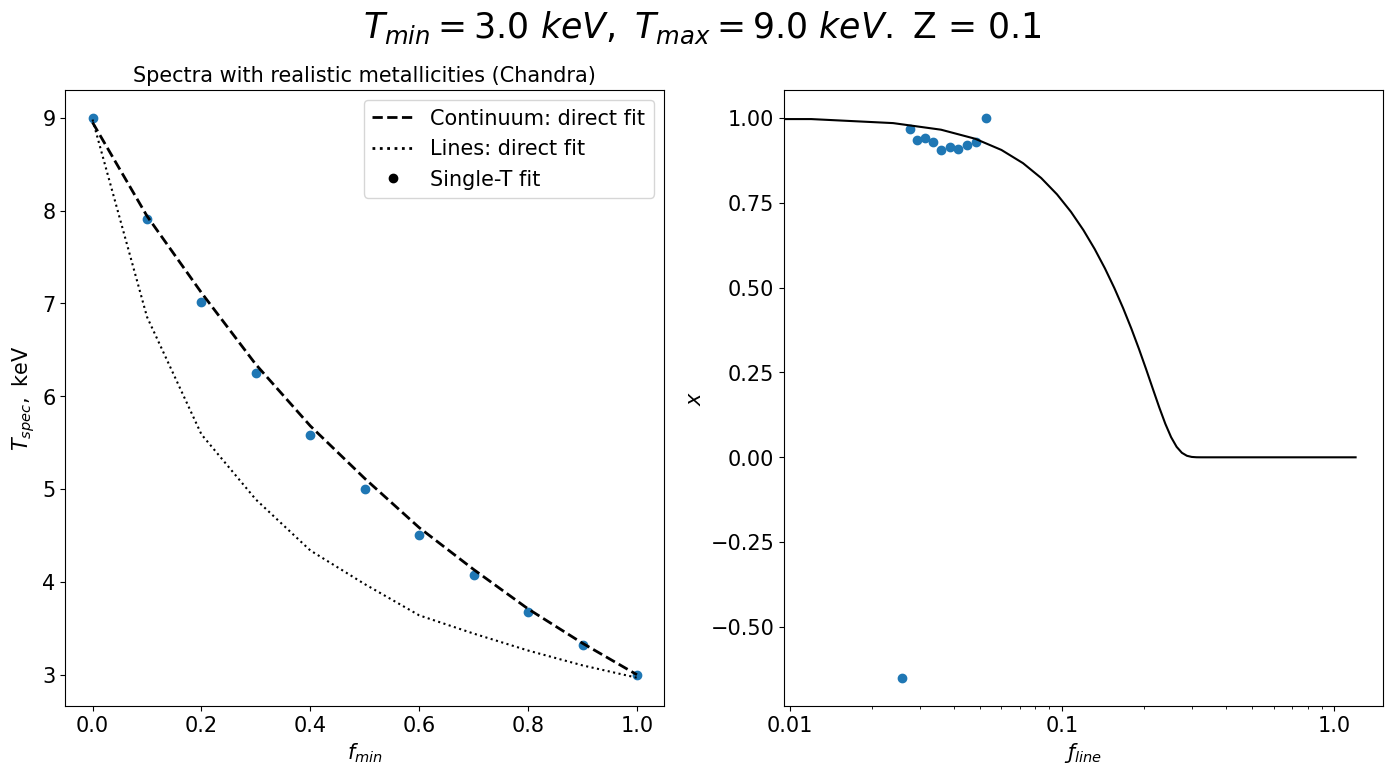

F_cnt + F_lin = F_sum =?= F_fit
659.40 + 63.06 = 722.47 =?= 722.31 ....... f_line = 0.09, x = 1.76
604.59 + 79.39 = 683.98 =?= 682.33 ....... f_line = 0.12, x = 0.56
549.78 + 95.71 = 645.49 =?= 642.36 ....... f_line = 0.15, x = 0.47
494.96 + 112.03 = 607.00 =?= 602.38 ....... f_line = 0.18, x = 0.73
440.15 + 128.36 = 568.51 =?= 562.40 ....... f_line = 0.23, x = 0.64
385.34 + 144.68 = 530.02 =?= 522.43 ....... f_line = 0.27, x = 0.51
330.52 + 161.00 = 491.53 =?= 482.45 ....... f_line = 0.33, x = 0.30
275.71 + 177.33 = 453.04 =?= 442.48 ....... f_line = 0.39, x = 0.21
220.89 + 193.65 = 414.55 =?= 402.50 ....... f_line = 0.47, x = 0.19
166.08 + 209.97 = 376.06 =?= 362.53 ....... f_line = 0.56, x = 0.23
111.27 + 226.30 = 337.57 =?= 322.55 ....... f_line = 0.67, x = 1.00


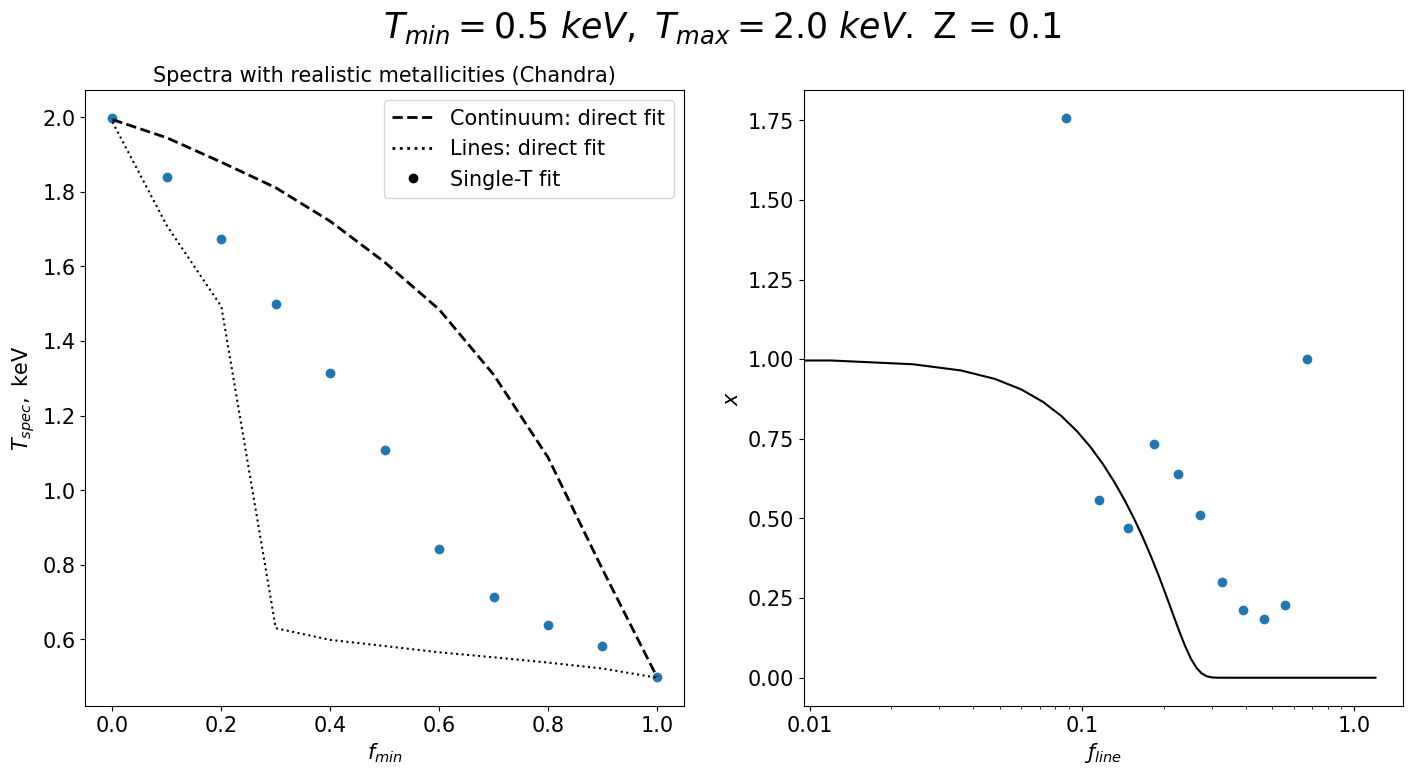

F_cnt + F_lin = F_sum =?= F_fit
1093.35 + 47.83 = 1141.18 =?= 1141.01 ....... f_line = 0.04, x = 1.00
1015.69 + 63.80 = 1079.49 =?= 1079.20 ....... f_line = 0.06, x = 0.91
938.03 + 79.77 = 1017.80 =?= 1017.39 ....... f_line = 0.08, x = 0.85
860.36 + 95.74 = 956.10 =?= 955.58 ....... f_line = 0.10, x = 0.77
782.70 + 111.71 = 894.41 =?= 893.76 ....... f_line = 0.12, x = 0.70
705.04 + 127.68 = 832.72 =?= 831.95 ....... f_line = 0.15, x = 0.60
627.38 + 143.65 = 771.02 =?= 770.14 ....... f_line = 0.19, x = 0.44
549.72 + 159.62 = 709.33 =?= 708.33 ....... f_line = 0.23, x = 0.25
472.05 + 175.58 = 647.64 =?= 646.51 ....... f_line = 0.27, x = 0.18
394.39 + 191.55 = 585.95 =?= 584.70 ....... f_line = 0.33, x = 0.15
316.73 + 207.52 = 524.25 =?= 522.89 ....... f_line = 0.40, x = 1.00


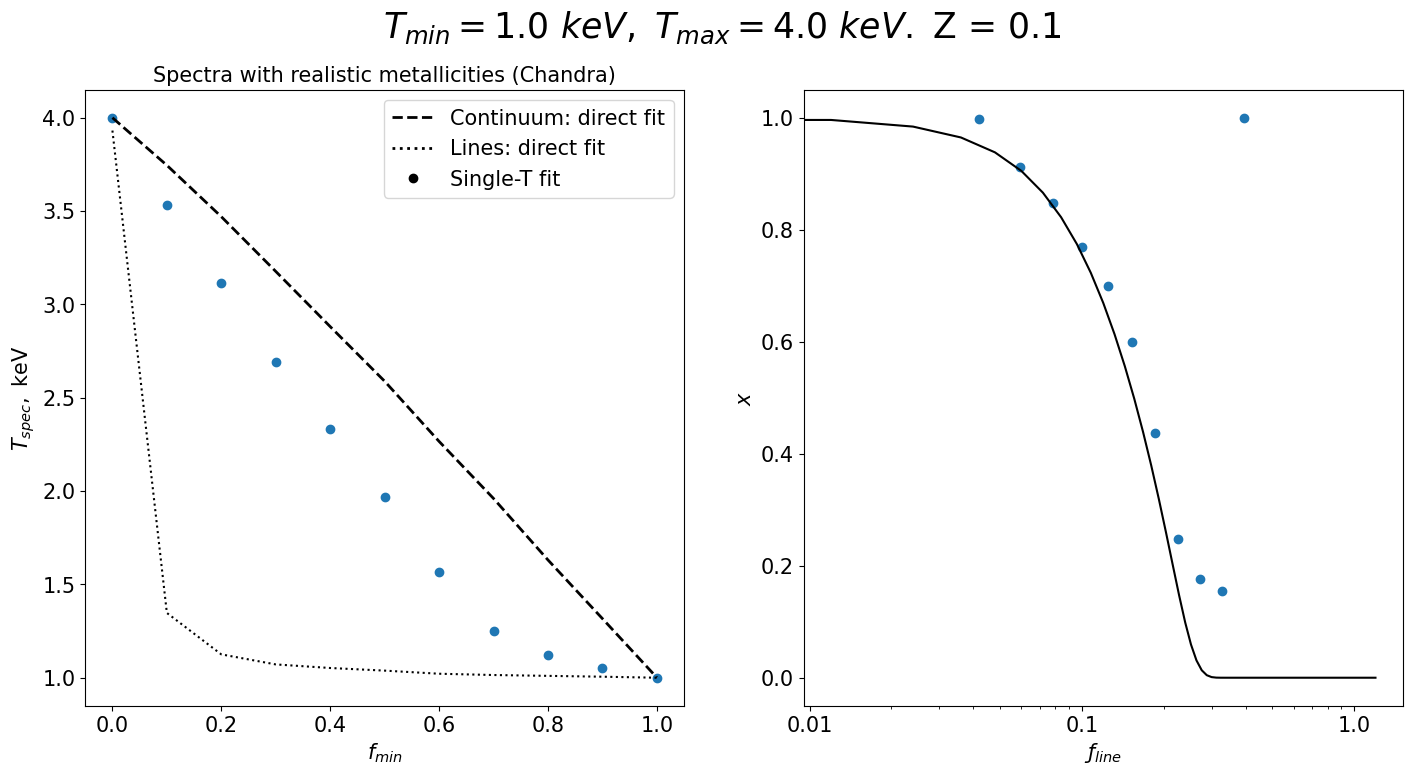

F_cnt + F_lin = F_sum =?= F_fit
1468.22 + 42.07 = 1510.29 =?= 1510.19 ....... f_line = 0.03, x = 1.04
1387.33 + 44.17 = 1431.50 =?= 1431.41 ....... f_line = 0.03, x = 0.94
1306.45 + 46.27 = 1352.72 =?= 1352.62 ....... f_line = 0.03, x = 0.91
1225.57 + 48.37 = 1273.94 =?= 1273.83 ....... f_line = 0.04, x = 0.90
1144.69 + 50.47 = 1195.16 =?= 1195.04 ....... f_line = 0.04, x = 0.90
1063.81 + 52.57 = 1116.38 =?= 1116.25 ....... f_line = 0.05, x = 0.89
982.93 + 54.67 = 1037.59 =?= 1037.46 ....... f_line = 0.05, x = 0.88
902.05 + 56.76 = 958.81 =?= 958.67 ....... f_line = 0.06, x = 0.89
821.17 + 58.86 = 880.03 =?= 879.88 ....... f_line = 0.07, x = 0.88
740.29 + 60.96 = 801.25 =?= 801.09 ....... f_line = 0.08, x = 0.87
659.40 + 63.06 = 722.47 =?= 722.31 ....... f_line = 0.09, x = 1.00


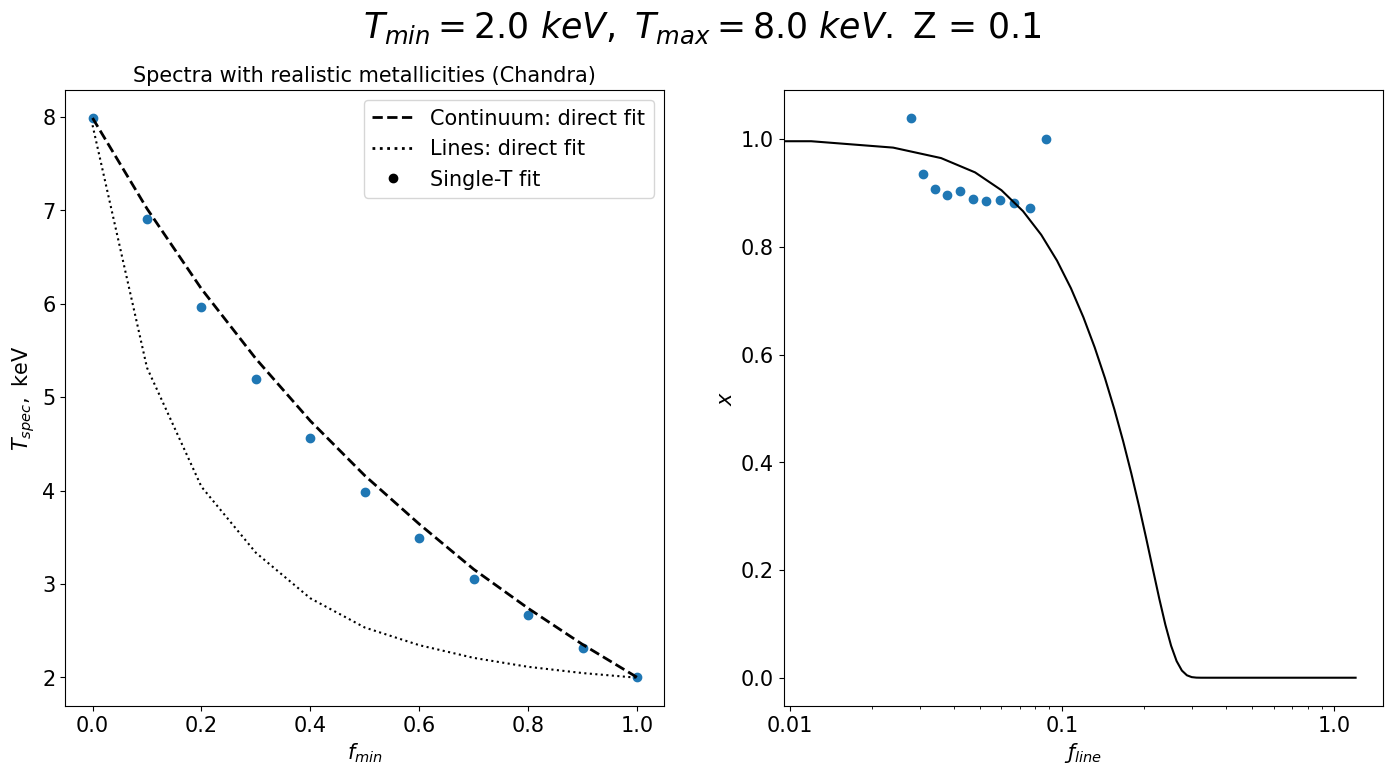

F_cnt + F_lin = F_sum =?= F_fit
1596.00 + 35.15 = 1631.15 =?= 1631.12 ....... f_line = 0.02, x = 0.69
1527.27 + 36.67 = 1563.94 =?= 1563.90 ....... f_line = 0.02, x = 0.97
1458.54 + 38.19 = 1496.73 =?= 1496.67 ....... f_line = 0.03, x = 0.95
1389.82 + 39.71 = 1429.53 =?= 1429.45 ....... f_line = 0.03, x = 0.95
1321.09 + 41.23 = 1362.32 =?= 1362.23 ....... f_line = 0.03, x = 0.93
1252.36 + 42.75 = 1295.11 =?= 1295.01 ....... f_line = 0.03, x = 0.92
1183.63 + 44.27 = 1227.90 =?= 1227.79 ....... f_line = 0.04, x = 0.90
1114.91 + 45.79 = 1160.69 =?= 1160.57 ....... f_line = 0.04, x = 0.91
1046.18 + 47.30 = 1093.48 =?= 1093.35 ....... f_line = 0.04, x = 0.92
977.45 + 48.82 = 1026.28 =?= 1026.13 ....... f_line = 0.05, x = 0.90
908.73 + 50.34 = 959.07 =?= 958.90 ....... f_line = 0.05, x = 1.00


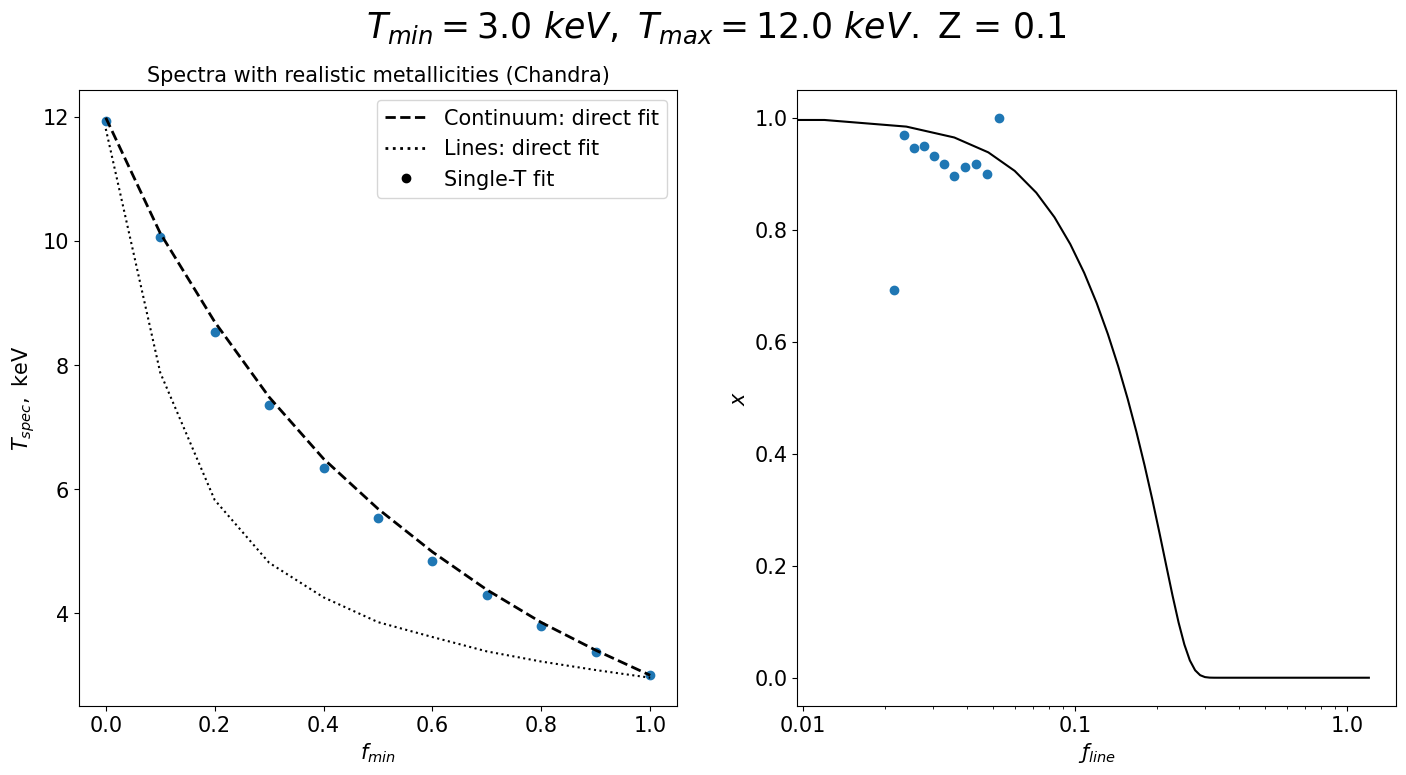

F_cnt + F_lin = F_sum =?= F_fit
316.73 + 622.57 = 939.30 =?= 935.21 ....... f_line = 0.66, x = 0.20
296.18 + 628.20 = 924.38 =?= 916.20 ....... f_line = 0.68, x = -0.35
275.64 + 633.83 = 909.47 =?= 897.19 ....... f_line = 0.70, x = -0.50
255.09 + 639.47 = 894.56 =?= 878.18 ....... f_line = 0.71, x = -0.43
234.54 + 645.10 = 879.64 =?= 859.17 ....... f_line = 0.73, x = -0.38
214.00 + 650.73 = 864.73 =?= 840.17 ....... f_line = 0.75, x = -0.37
193.45 + 656.36 = 849.82 =?= 821.16 ....... f_line = 0.77, x = -0.62
172.91 + 662.00 = 834.90 =?= 802.15 ....... f_line = 0.79, x = -0.21
152.36 + 667.63 = 819.99 =?= 783.14 ....... f_line = 0.81, x = -0.40
131.81 + 673.26 = 805.08 =?= 764.13 ....... f_line = 0.84, x = -0.27
111.27 + 678.90 = 790.16 =?= 745.12 ....... f_line = 0.86, x = 1.00


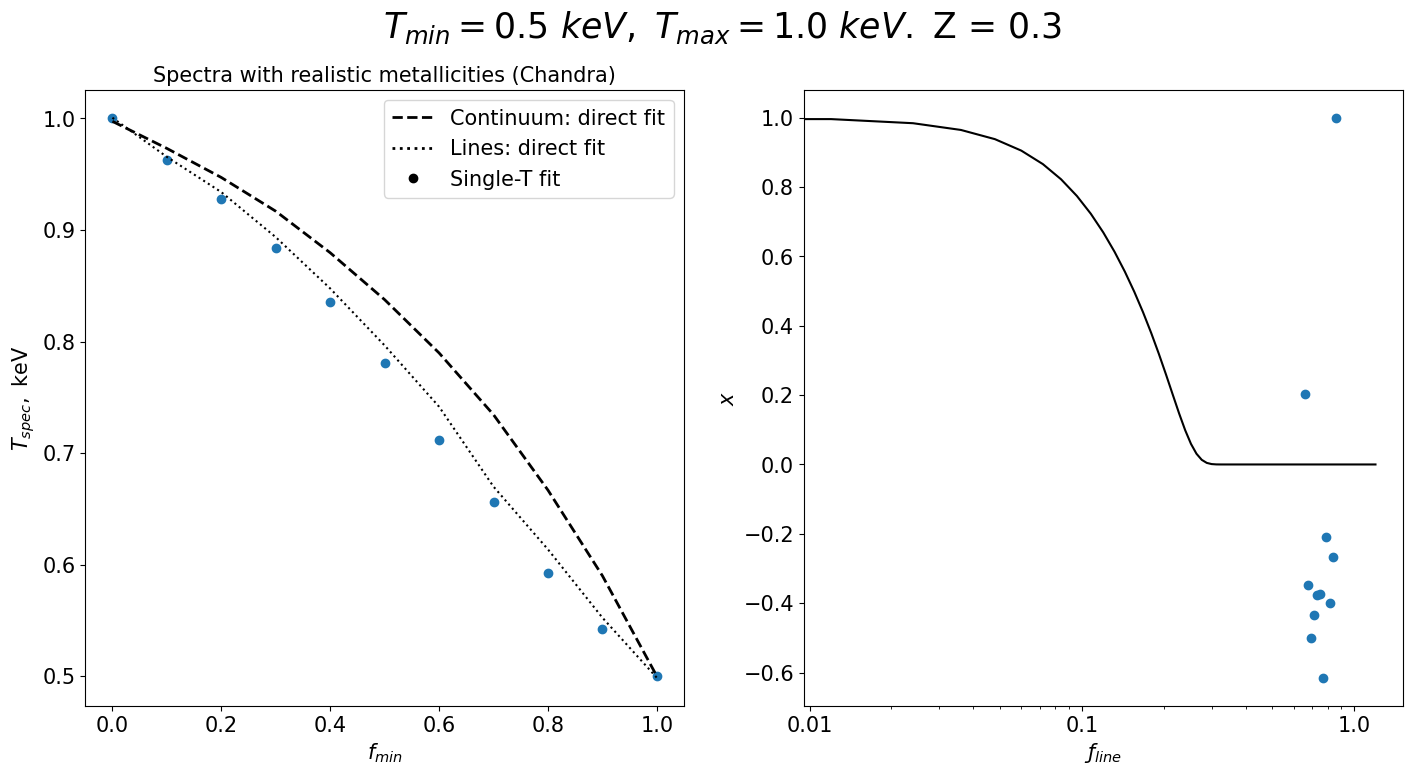

F_cnt + F_lin = F_sum =?= F_fit
659.40 + 189.19 = 848.59 =?= 848.11 ....... f_line = 0.22, x = -2.55
625.14 + 232.52 = 857.66 =?= 856.82 ....... f_line = 0.27, x = 0.40
590.87 + 275.86 = 866.73 =?= 865.53 ....... f_line = 0.32, x = 0.32
556.60 + 319.20 = 875.80 =?= 874.24 ....... f_line = 0.36, x = 0.22
522.33 + 362.54 = 884.87 =?= 882.95 ....... f_line = 0.41, x = 0.13
488.07 + 405.88 = 893.94 =?= 891.66 ....... f_line = 0.45, x = 0.10
453.80 + 449.22 = 903.02 =?= 900.37 ....... f_line = 0.50, x = 0.06
419.53 + 492.55 = 912.09 =?= 909.08 ....... f_line = 0.54, x = 0.04
385.26 + 535.89 = 921.16 =?= 917.79 ....... f_line = 0.58, x = 0.04
351.00 + 579.23 = 930.23 =?= 926.50 ....... f_line = 0.62, x = 0.03
316.73 + 622.57 = 939.30 =?= 935.21 ....... f_line = 0.66, x = 1.00


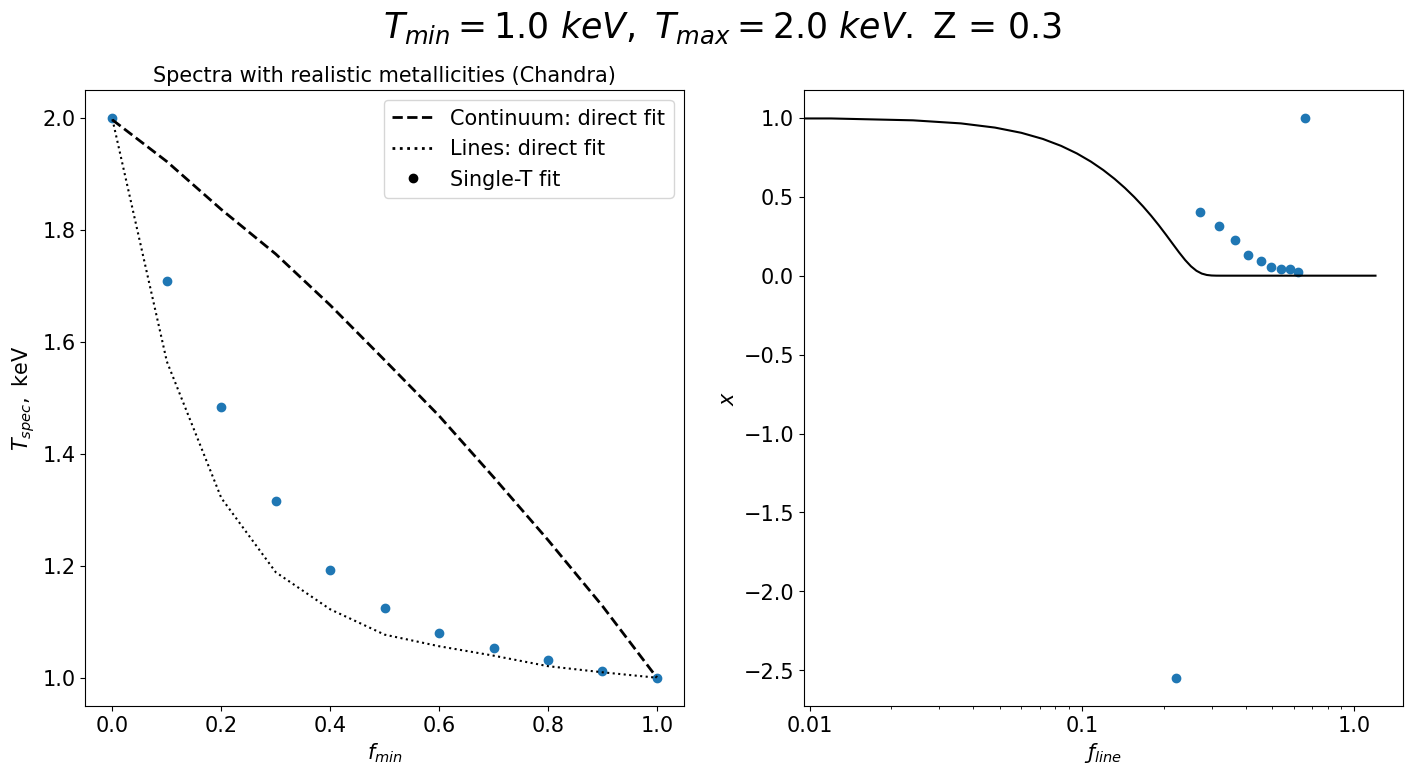

F_cnt + F_lin = F_sum =?= F_fit
1093.35 + 143.50 = 1236.85 =?= 1236.34 ....... f_line = 0.12, x = 1.28
1049.96 + 148.07 = 1198.02 =?= 1197.51 ....... f_line = 0.12, x = 0.83
1006.56 + 152.63 = 1159.20 =?= 1158.69 ....... f_line = 0.13, x = 0.77
963.17 + 157.20 = 1120.37 =?= 1119.87 ....... f_line = 0.14, x = 0.77
919.77 + 161.77 = 1081.55 =?= 1081.05 ....... f_line = 0.15, x = 0.76
876.38 + 166.34 = 1042.72 =?= 1042.22 ....... f_line = 0.16, x = 0.76
832.98 + 170.91 = 1003.89 =?= 1003.40 ....... f_line = 0.17, x = 0.75
789.59 + 175.48 = 965.07 =?= 964.58 ....... f_line = 0.18, x = 0.73
746.19 + 180.05 = 926.24 =?= 925.75 ....... f_line = 0.19, x = 0.68
702.80 + 184.62 = 887.42 =?= 886.93 ....... f_line = 0.21, x = 0.65
659.40 + 189.19 = 848.59 =?= 848.11 ....... f_line = 0.22, x = 1.00


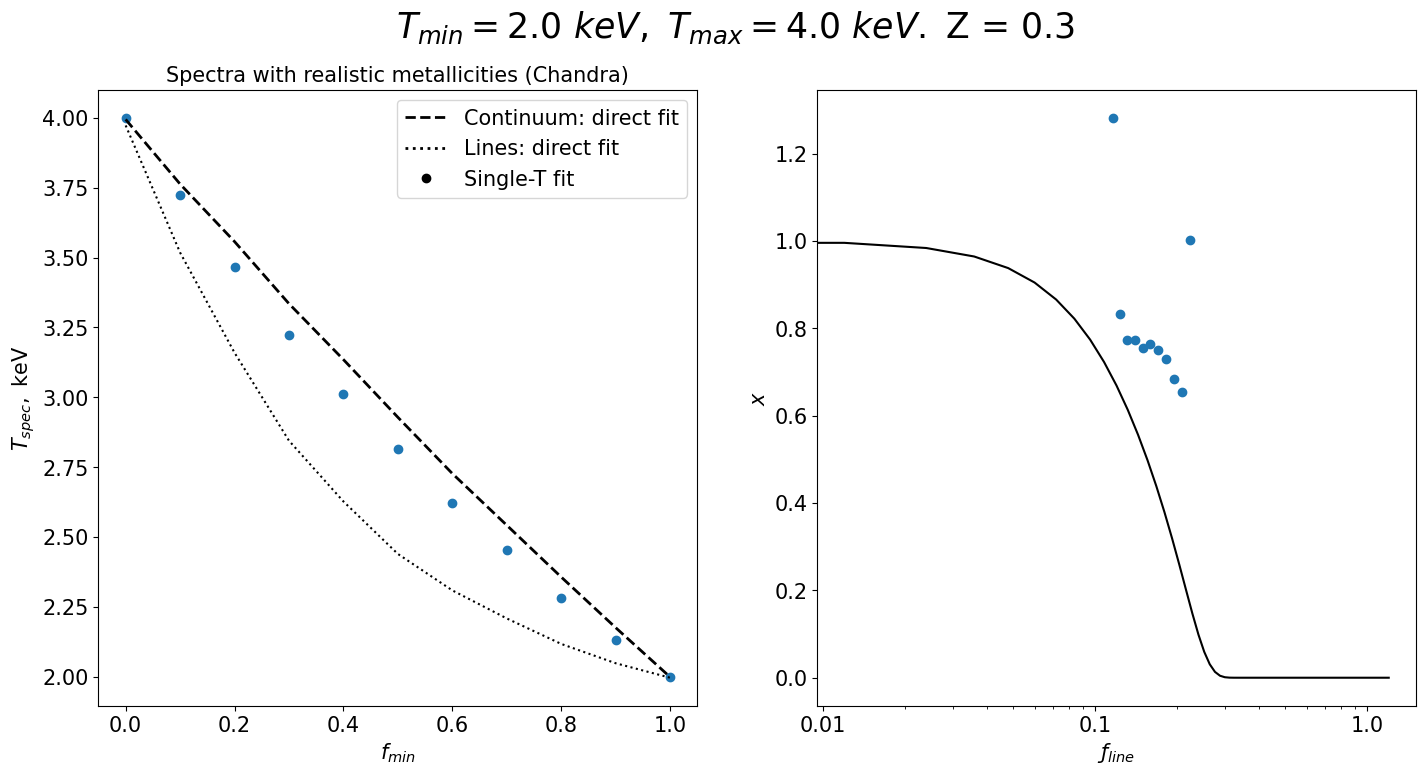

F_cnt + F_lin = F_sum =?= F_fit
1332.37 + 136.36 = 1468.73 =?= 1468.31 ....... f_line = 0.09, x = 0.99
1290.01 + 137.83 = 1427.83 =?= 1427.41 ....... f_line = 0.10, x = 0.80
1247.64 + 139.29 = 1386.93 =?= 1386.50 ....... f_line = 0.10, x = 0.84
1205.28 + 140.76 = 1346.04 =?= 1345.60 ....... f_line = 0.10, x = 0.84
1162.91 + 142.23 = 1305.14 =?= 1304.69 ....... f_line = 0.11, x = 0.80
1120.55 + 143.69 = 1264.24 =?= 1263.79 ....... f_line = 0.11, x = 0.81
1078.18 + 145.16 = 1223.34 =?= 1222.88 ....... f_line = 0.12, x = 0.81
1035.82 + 146.63 = 1182.45 =?= 1181.98 ....... f_line = 0.12, x = 0.78
993.45 + 148.09 = 1141.55 =?= 1141.07 ....... f_line = 0.13, x = 0.76
951.09 + 149.56 = 1100.65 =?= 1100.17 ....... f_line = 0.14, x = 0.74
908.73 + 151.03 = 1059.75 =?= 1059.26 ....... f_line = 0.14, x = 1.00


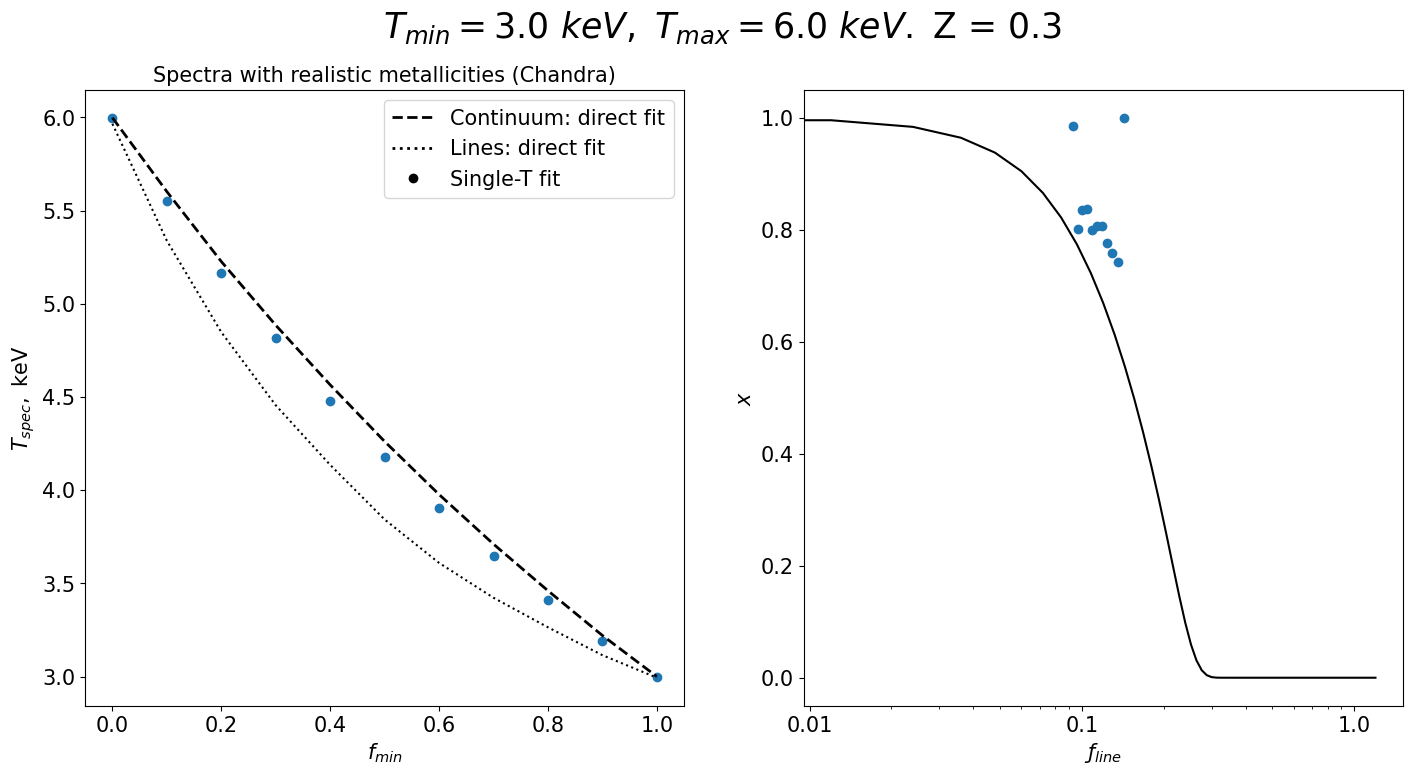

F_cnt + F_lin = F_sum =?= F_fit
501.70 + 279.71 = 781.41 =?= 780.71 ....... f_line = 0.36, x = -0.10
462.66 + 319.63 = 782.28 =?= 777.15 ....... f_line = 0.41, x = -0.55
423.61 + 359.55 = 783.16 =?= 773.59 ....... f_line = 0.46, x = -0.53
384.57 + 399.46 = 784.03 =?= 770.03 ....... f_line = 0.51, x = -0.61
345.53 + 439.38 = 784.91 =?= 766.47 ....... f_line = 0.56, x = -0.57
306.48 + 479.30 = 785.78 =?= 762.92 ....... f_line = 0.61, x = 0.06
267.44 + 519.22 = 786.66 =?= 759.36 ....... f_line = 0.66, x = 0.02
228.40 + 559.14 = 787.54 =?= 755.80 ....... f_line = 0.71, x = 0.02
189.35 + 599.06 = 788.41 =?= 752.24 ....... f_line = 0.76, x = 0.01
150.31 + 638.98 = 789.29 =?= 748.68 ....... f_line = 0.81, x = 0.02
111.27 + 678.90 = 790.16 =?= 745.12 ....... f_line = 0.86, x = 1.00


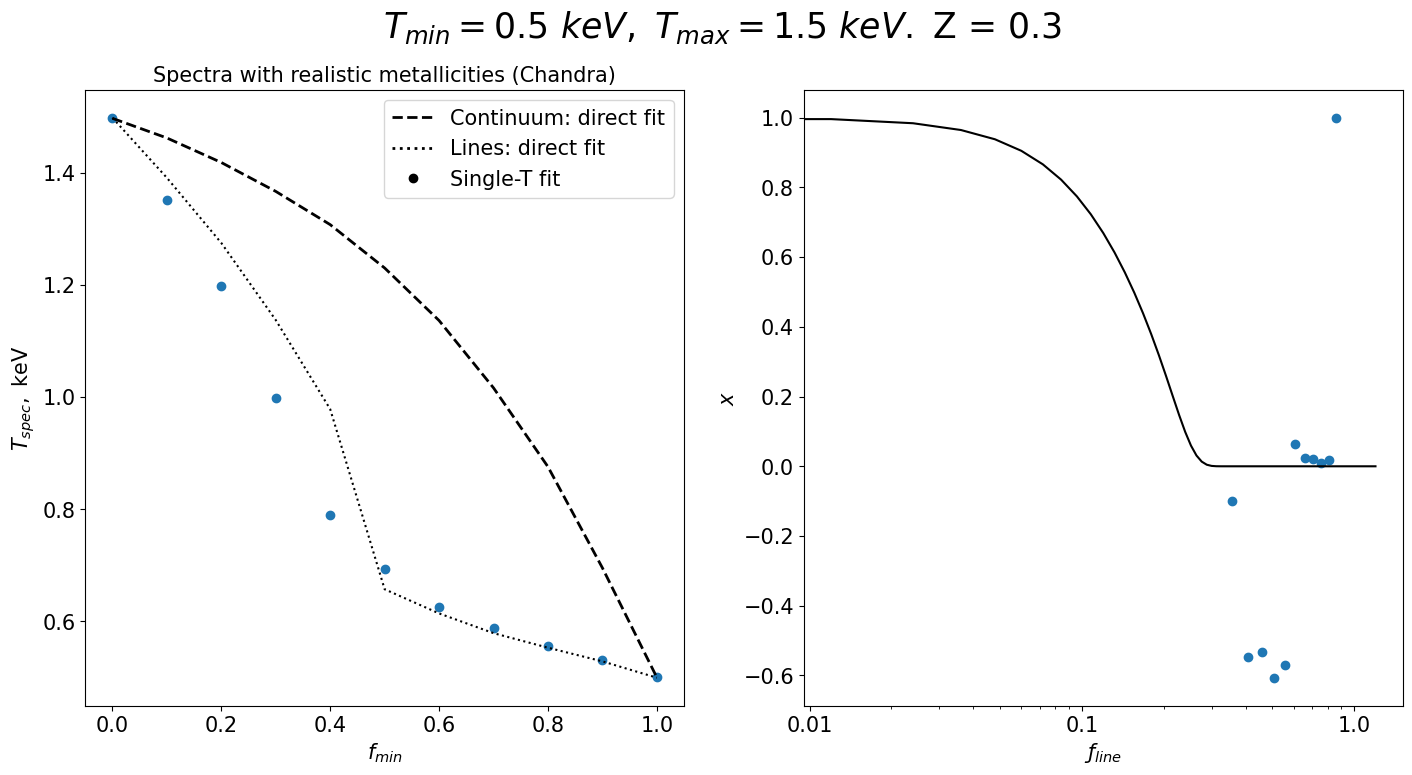

F_cnt + F_lin = F_sum =?= F_fit
908.73 + 151.03 = 1059.75 =?= 1059.26 ....... f_line = 0.14, x = 0.75
849.53 + 198.18 = 1047.71 =?= 1046.86 ....... f_line = 0.19, x = 0.75
790.33 + 245.33 = 1035.66 =?= 1034.45 ....... f_line = 0.24, x = 0.60
731.13 + 292.49 = 1023.62 =?= 1022.05 ....... f_line = 0.29, x = 0.39
671.93 + 339.64 = 1011.57 =?= 1009.64 ....... f_line = 0.34, x = 0.16
612.73 + 386.80 = 999.52 =?= 997.24 ....... f_line = 0.39, x = 0.11
553.53 + 433.95 = 987.48 =?= 984.83 ....... f_line = 0.44, x = 0.07
494.33 + 481.11 = 975.43 =?= 972.43 ....... f_line = 0.49, x = 0.06
435.13 + 528.26 = 963.39 =?= 960.02 ....... f_line = 0.55, x = 0.05
375.93 + 575.41 = 951.34 =?= 947.61 ....... f_line = 0.60, x = 0.03
316.73 + 622.57 = 939.30 =?= 935.21 ....... f_line = 0.66, x = 0.90


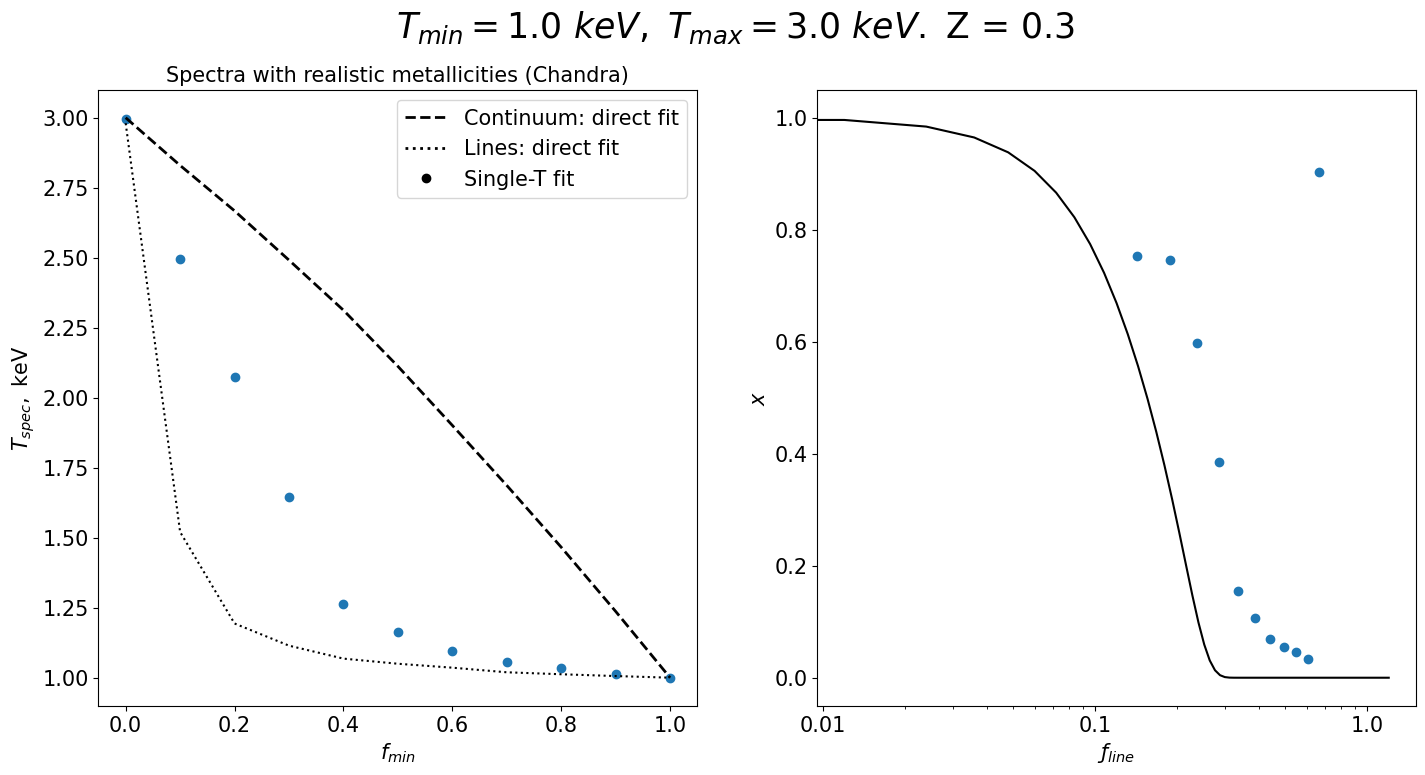

F_cnt + F_lin = F_sum =?= F_fit
1332.37 + 136.36 = 1468.73 =?= 1468.31 ....... f_line = 0.09, x = 5.45
1265.08 + 141.64 = 1406.72 =?= 1406.29 ....... f_line = 0.10, x = 0.83
1197.78 + 146.92 = 1344.70 =?= 1344.27 ....... f_line = 0.11, x = 0.79
1130.48 + 152.21 = 1282.69 =?= 1282.25 ....... f_line = 0.12, x = 0.76
1063.19 + 157.49 = 1220.67 =?= 1220.23 ....... f_line = 0.13, x = 0.75
995.89 + 162.77 = 1158.66 =?= 1158.21 ....... f_line = 0.14, x = 0.73
928.59 + 168.06 = 1096.65 =?= 1096.19 ....... f_line = 0.15, x = 0.72
861.29 + 173.34 = 1034.63 =?= 1034.17 ....... f_line = 0.17, x = 0.72
794.00 + 178.62 = 972.62 =?= 972.15 ....... f_line = 0.18, x = 0.71
726.70 + 183.90 = 910.60 =?= 910.13 ....... f_line = 0.20, x = 0.69
659.40 + 189.19 = 848.59 =?= 848.11 ....... f_line = 0.22, x = 0.32


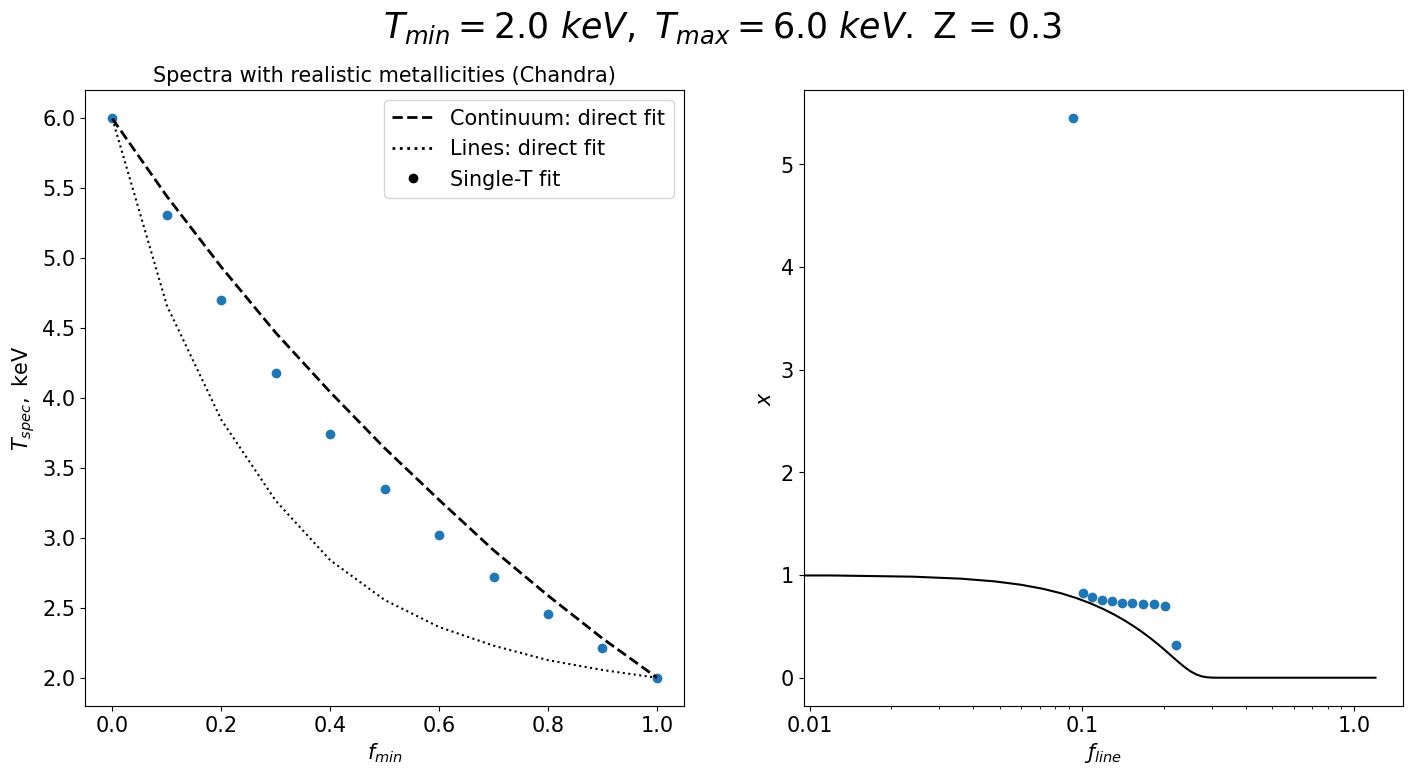

F_cnt + F_lin = F_sum =?= F_fit
1513.45 + 120.55 = 1633.99 =?= 1633.78 ....... f_line = 0.07, x = -0.30
1452.97 + 123.60 = 1576.57 =?= 1576.33 ....... f_line = 0.08, x = 0.85
1392.50 + 126.64 = 1519.15 =?= 1518.87 ....... f_line = 0.08, x = 0.83
1332.03 + 129.69 = 1461.72 =?= 1461.42 ....... f_line = 0.09, x = 0.81
1271.56 + 132.74 = 1404.30 =?= 1403.97 ....... f_line = 0.09, x = 0.77
1211.09 + 135.79 = 1346.87 =?= 1346.52 ....... f_line = 0.10, x = 0.79
1150.61 + 138.83 = 1289.45 =?= 1289.07 ....... f_line = 0.11, x = 0.79
1090.14 + 141.88 = 1232.02 =?= 1231.62 ....... f_line = 0.12, x = 0.77
1029.67 + 144.93 = 1174.60 =?= 1174.17 ....... f_line = 0.12, x = 0.76
969.20 + 147.98 = 1117.18 =?= 1116.72 ....... f_line = 0.13, x = 0.79
908.73 + 151.03 = 1059.75 =?= 1059.26 ....... f_line = 0.14, x = 0.65


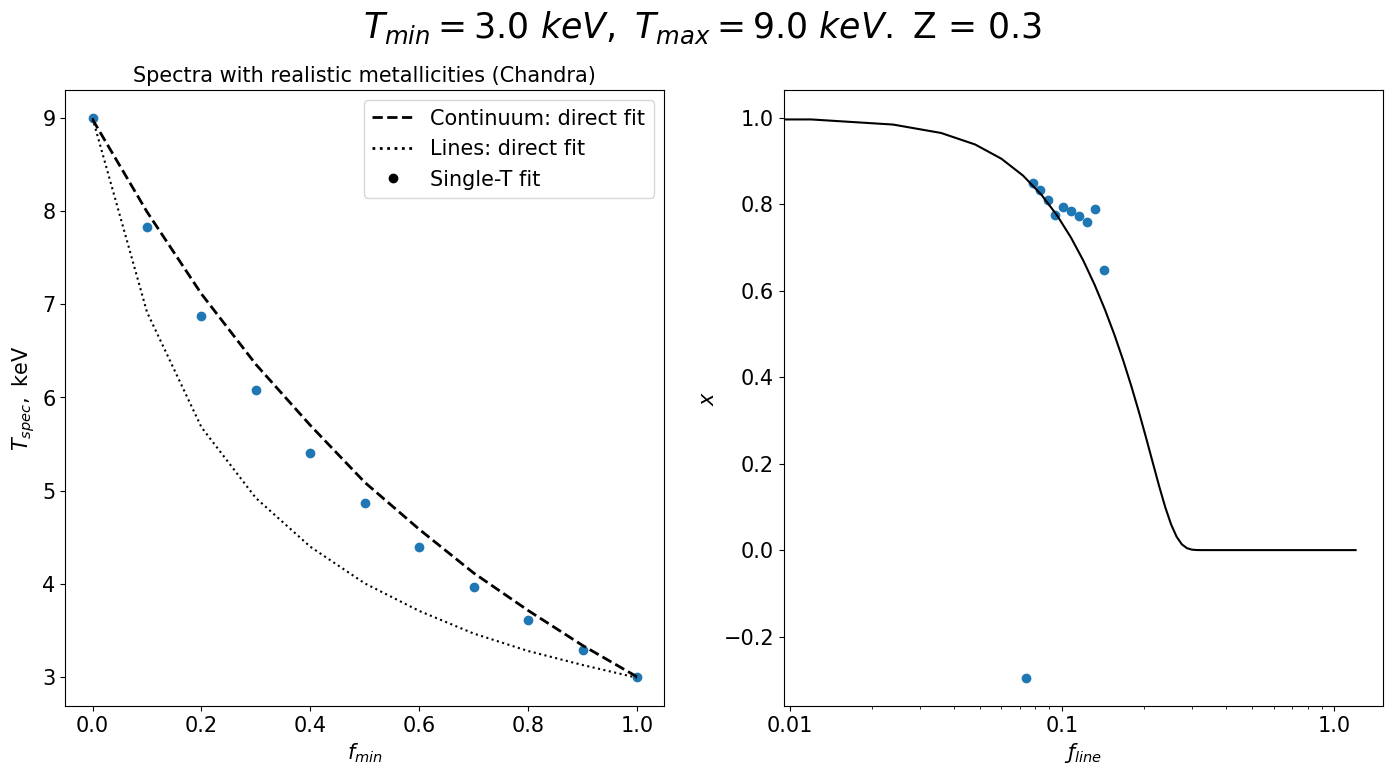

F_cnt + F_lin = F_sum =?= F_fit
659.40 + 189.19 = 848.59 =?= 848.11 ....... f_line = 0.22, x = -3.99
604.59 + 238.16 = 842.75 =?= 837.81 ....... f_line = 0.28, x = -0.01
549.78 + 287.13 = 836.90 =?= 827.51 ....... f_line = 0.34, x = -0.18
494.96 + 336.10 = 831.06 =?= 817.21 ....... f_line = 0.40, x = 0.45
440.15 + 385.07 = 825.22 =?= 806.92 ....... f_line = 0.47, x = 0.21
385.34 + 434.04 = 819.38 =?= 796.62 ....... f_line = 0.53, x = 0.11
330.52 + 483.01 = 813.53 =?= 786.32 ....... f_line = 0.59, x = 0.07
275.71 + 531.98 = 807.69 =?= 776.02 ....... f_line = 0.66, x = 0.05
220.89 + 580.95 = 801.85 =?= 765.72 ....... f_line = 0.72, x = 0.04
166.08 + 629.92 = 796.01 =?= 755.42 ....... f_line = 0.79, x = 0.06
111.27 + 678.90 = 790.16 =?= 745.12 ....... f_line = 0.86, x = 1.00


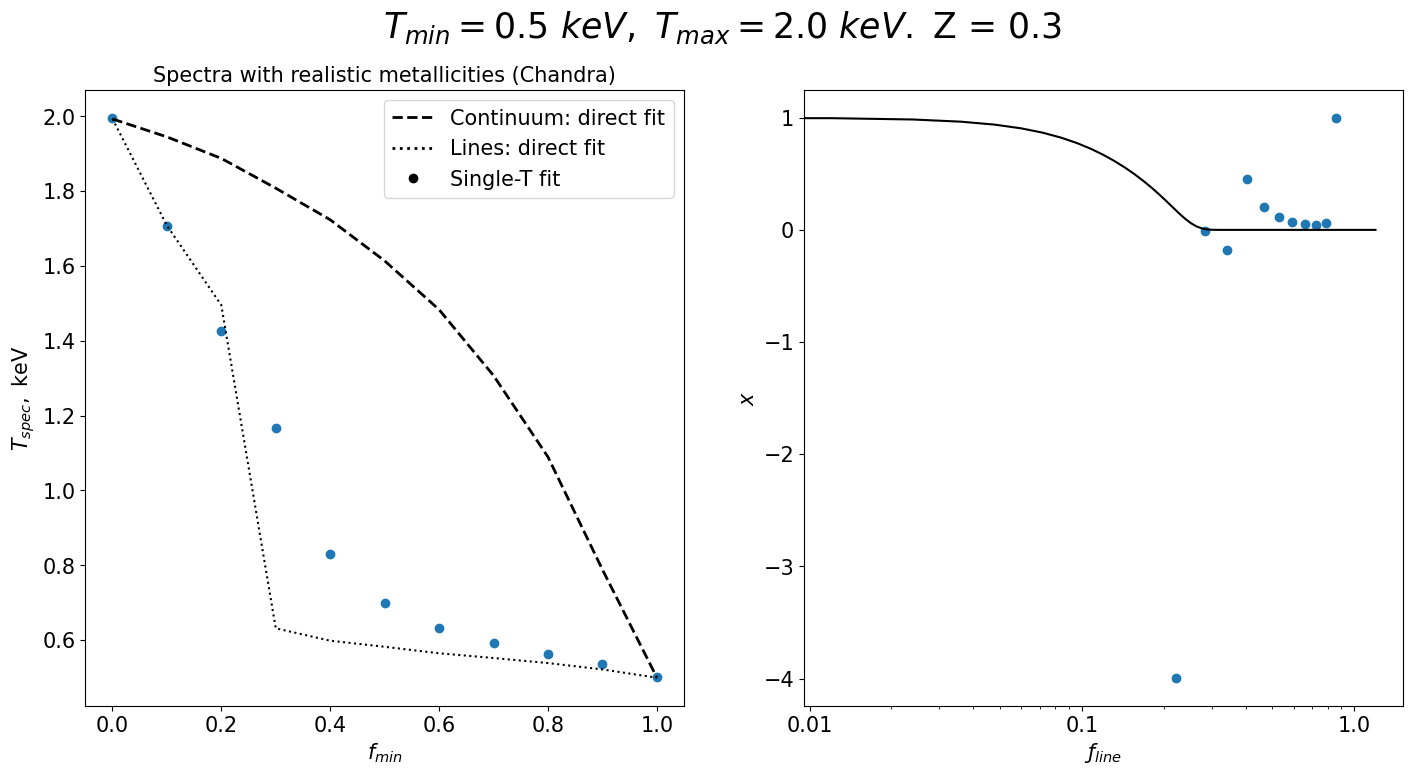

F_cnt + F_lin = F_sum =?= F_fit
1093.35 + 143.50 = 1236.85 =?= 1236.34 ....... f_line = 0.12, x = 0.97
1015.69 + 191.40 = 1207.09 =?= 1206.22 ....... f_line = 0.16, x = 0.79
938.03 + 239.31 = 1177.34 =?= 1176.11 ....... f_line = 0.20, x = 0.65
860.36 + 287.22 = 1147.58 =?= 1146.00 ....... f_line = 0.25, x = 0.48
782.70 + 335.13 = 1117.83 =?= 1115.89 ....... f_line = 0.30, x = 0.23
705.04 + 383.03 = 1088.07 =?= 1085.77 ....... f_line = 0.35, x = 0.09
627.38 + 430.94 = 1058.32 =?= 1055.66 ....... f_line = 0.41, x = 0.07
549.72 + 478.85 = 1028.56 =?= 1025.55 ....... f_line = 0.47, x = 0.05
472.05 + 526.75 = 998.81 =?= 995.43 ....... f_line = 0.53, x = 0.04
394.39 + 574.66 = 969.05 =?= 965.32 ....... f_line = 0.59, x = 0.03
316.73 + 622.57 = 939.30 =?= 935.21 ....... f_line = 0.66, x = 1.30


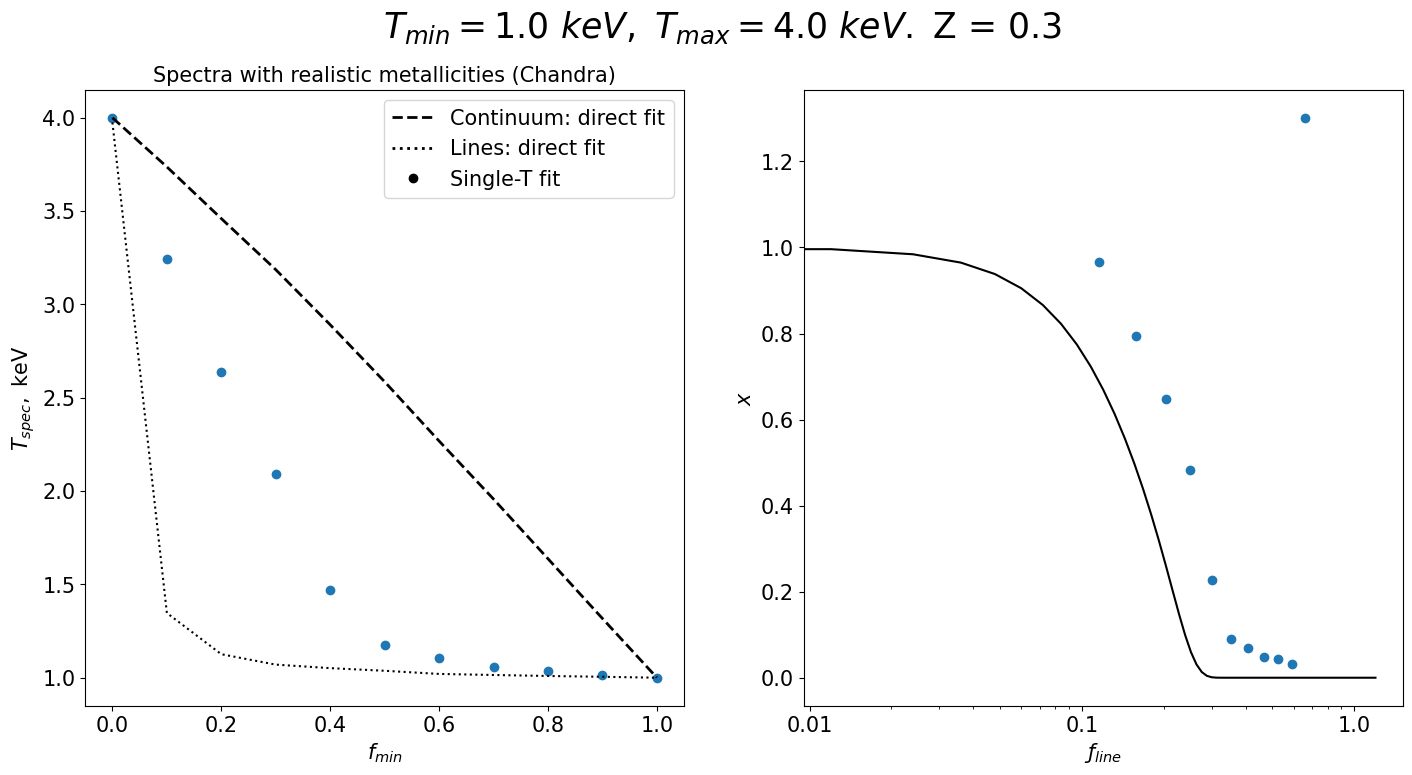

F_cnt + F_lin = F_sum =?= F_fit
1468.22 + 126.21 = 1594.43 =?= 1594.15 ....... f_line = 0.08, x = 0.81
1387.33 + 132.51 = 1519.84 =?= 1519.55 ....... f_line = 0.09, x = 0.80
1306.45 + 138.81 = 1445.26 =?= 1444.94 ....... f_line = 0.10, x = 0.77
1225.57 + 145.10 = 1370.68 =?= 1370.34 ....... f_line = 0.11, x = 0.74
1144.69 + 151.40 = 1296.09 =?= 1295.74 ....... f_line = 0.12, x = 0.72
1063.81 + 157.70 = 1221.51 =?= 1221.13 ....... f_line = 0.13, x = 0.71
982.93 + 164.00 = 1146.93 =?= 1146.53 ....... f_line = 0.14, x = 0.70
902.05 + 170.29 = 1072.34 =?= 1071.92 ....... f_line = 0.16, x = 0.69
821.17 + 176.59 = 997.76 =?= 997.32 ....... f_line = 0.18, x = 0.68
740.29 + 182.89 = 923.17 =?= 922.71 ....... f_line = 0.20, x = 0.66
659.40 + 189.19 = 848.59 =?= 848.11 ....... f_line = 0.22, x = 1.00


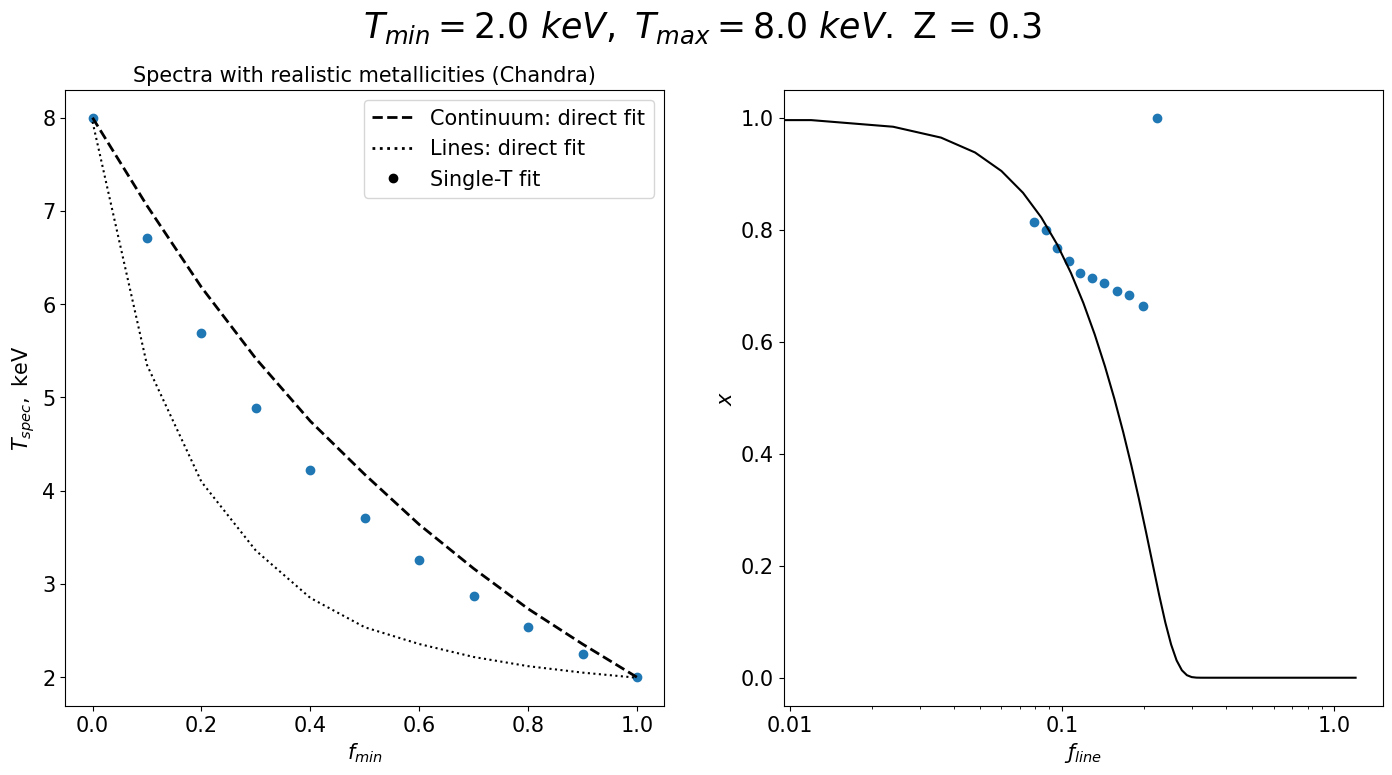

F_cnt + F_lin = F_sum =?= F_fit
1596.00 + 105.46 = 1701.46 =?= 1701.36 ....... f_line = 0.06, x = 0.97
1527.27 + 110.02 = 1637.29 =?= 1637.15 ....... f_line = 0.07, x = 0.88
1458.54 + 114.57 = 1573.12 =?= 1572.94 ....... f_line = 0.07, x = 0.85
1389.82 + 119.13 = 1508.95 =?= 1508.73 ....... f_line = 0.08, x = 0.83
1321.09 + 123.69 = 1444.78 =?= 1444.52 ....... f_line = 0.09, x = 0.81
1252.36 + 128.24 = 1380.60 =?= 1380.31 ....... f_line = 0.09, x = 0.77
1183.63 + 132.80 = 1316.43 =?= 1316.10 ....... f_line = 0.10, x = 0.77
1114.91 + 137.36 = 1252.26 =?= 1251.89 ....... f_line = 0.11, x = 0.75
1046.18 + 141.91 = 1188.09 =?= 1187.68 ....... f_line = 0.12, x = 0.76
977.45 + 146.47 = 1123.92 =?= 1123.47 ....... f_line = 0.13, x = 0.77
908.73 + 151.03 = 1059.75 =?= 1059.26 ....... f_line = 0.14, x = 1.00


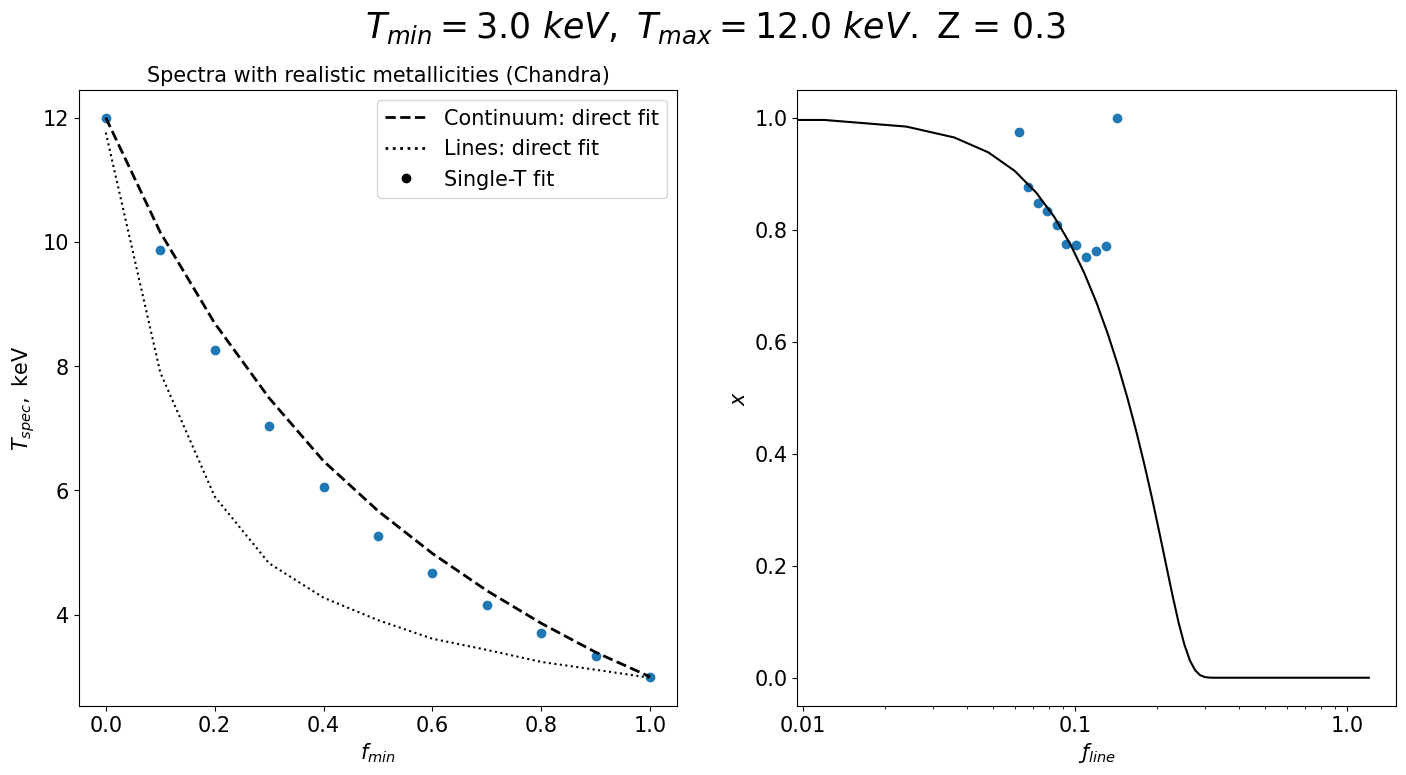

F_cnt + F_lin = F_sum =?= F_fit
316.73 + 2075.23 = 2391.96 =?= 2378.33 ....... f_line = 0.87, x = -0.00
296.18 + 2094.01 = 2390.19 =?= 2362.91 ....... f_line = 0.88, x = -0.39
275.64 + 2112.78 = 2388.42 =?= 2347.49 ....... f_line = 0.88, x = -0.49
255.09 + 2131.56 = 2386.65 =?= 2332.07 ....... f_line = 0.89, x = -0.35
234.54 + 2150.33 = 2384.88 =?= 2316.65 ....... f_line = 0.90, x = -0.33
214.00 + 2169.11 = 2383.10 =?= 2301.23 ....... f_line = 0.91, x = -0.29
193.45 + 2187.88 = 2381.33 =?= 2285.81 ....... f_line = 0.92, x = -0.60
172.91 + 2206.66 = 2379.56 =?= 2270.39 ....... f_line = 0.93, x = -0.21
152.36 + 2225.43 = 2377.79 =?= 2254.97 ....... f_line = 0.94, x = -0.46
131.81 + 2244.21 = 2376.02 =?= 2239.55 ....... f_line = 0.94, x = -0.41
111.27 + 2262.98 = 2374.25 =?= 2224.13 ....... f_line = 0.95, x = 1.00


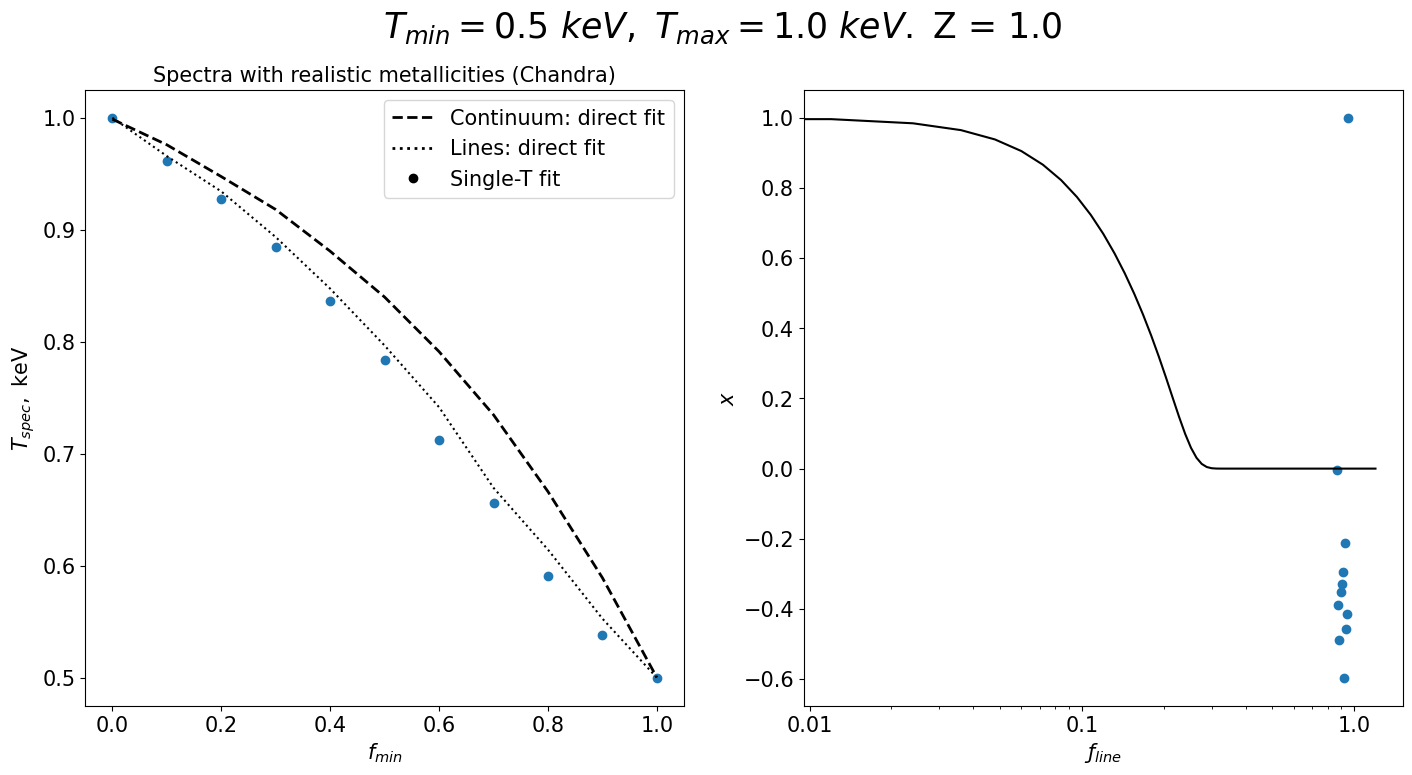

F_cnt + F_lin = F_sum =?= F_fit
659.40 + 630.62 = 1290.03 =?= 1288.42 ....... f_line = 0.49, x = 0.12
625.14 + 775.08 = 1400.22 =?= 1397.41 ....... f_line = 0.55, x = 0.02
590.87 + 919.54 = 1510.41 =?= 1506.40 ....... f_line = 0.61, x = 0.01
556.60 + 1064.00 = 1620.61 =?= 1615.39 ....... f_line = 0.66, x = 0.00
522.33 + 1208.47 = 1730.80 =?= 1724.38 ....... f_line = 0.70, x = 0.00
488.07 + 1352.93 = 1840.99 =?= 1833.37 ....... f_line = 0.73, x = -0.00
453.80 + 1497.39 = 1951.19 =?= 1942.36 ....... f_line = 0.77, x = -0.01
419.53 + 1641.85 = 2061.38 =?= 2051.36 ....... f_line = 0.80, x = -0.01
385.26 + 1786.31 = 2171.57 =?= 2160.35 ....... f_line = 0.82, x = -0.00
351.00 + 1930.77 = 2281.77 =?= 2269.34 ....... f_line = 0.85, x = -0.01
316.73 + 2075.23 = 2391.96 =?= 2378.33 ....... f_line = 0.87, x = 2.10


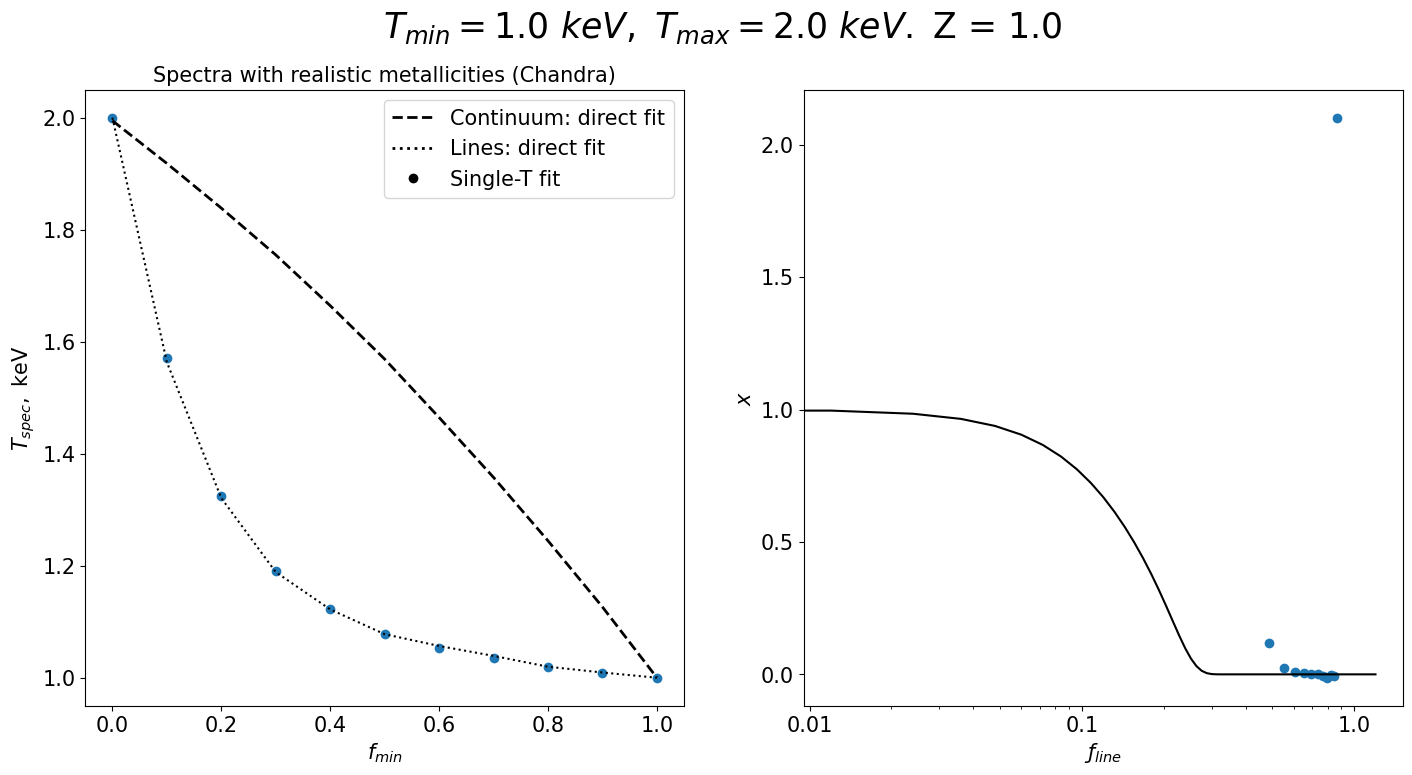

F_cnt + F_lin = F_sum =?= F_fit
1093.35 + 478.32 = 1571.67 =?= 1569.97 ....... f_line = 0.30, x = 0.98
1049.96 + 493.55 = 1543.51 =?= 1541.82 ....... f_line = 0.32, x = 0.55
1006.56 + 508.78 = 1515.34 =?= 1513.66 ....... f_line = 0.34, x = 0.51
963.17 + 524.01 = 1487.18 =?= 1485.51 ....... f_line = 0.35, x = 0.52
919.77 + 539.24 = 1459.01 =?= 1457.35 ....... f_line = 0.37, x = 0.49
876.38 + 554.47 = 1430.85 =?= 1429.20 ....... f_line = 0.39, x = 0.45
832.98 + 569.70 = 1402.69 =?= 1401.04 ....... f_line = 0.41, x = 0.43
789.59 + 584.93 = 1374.52 =?= 1372.89 ....... f_line = 0.43, x = 0.44
746.19 + 600.16 = 1346.36 =?= 1344.73 ....... f_line = 0.45, x = 0.40
702.80 + 615.39 = 1318.19 =?= 1316.58 ....... f_line = 0.47, x = 0.38
659.40 + 630.62 = 1290.03 =?= 1288.42 ....... f_line = 0.49, x = 1.93


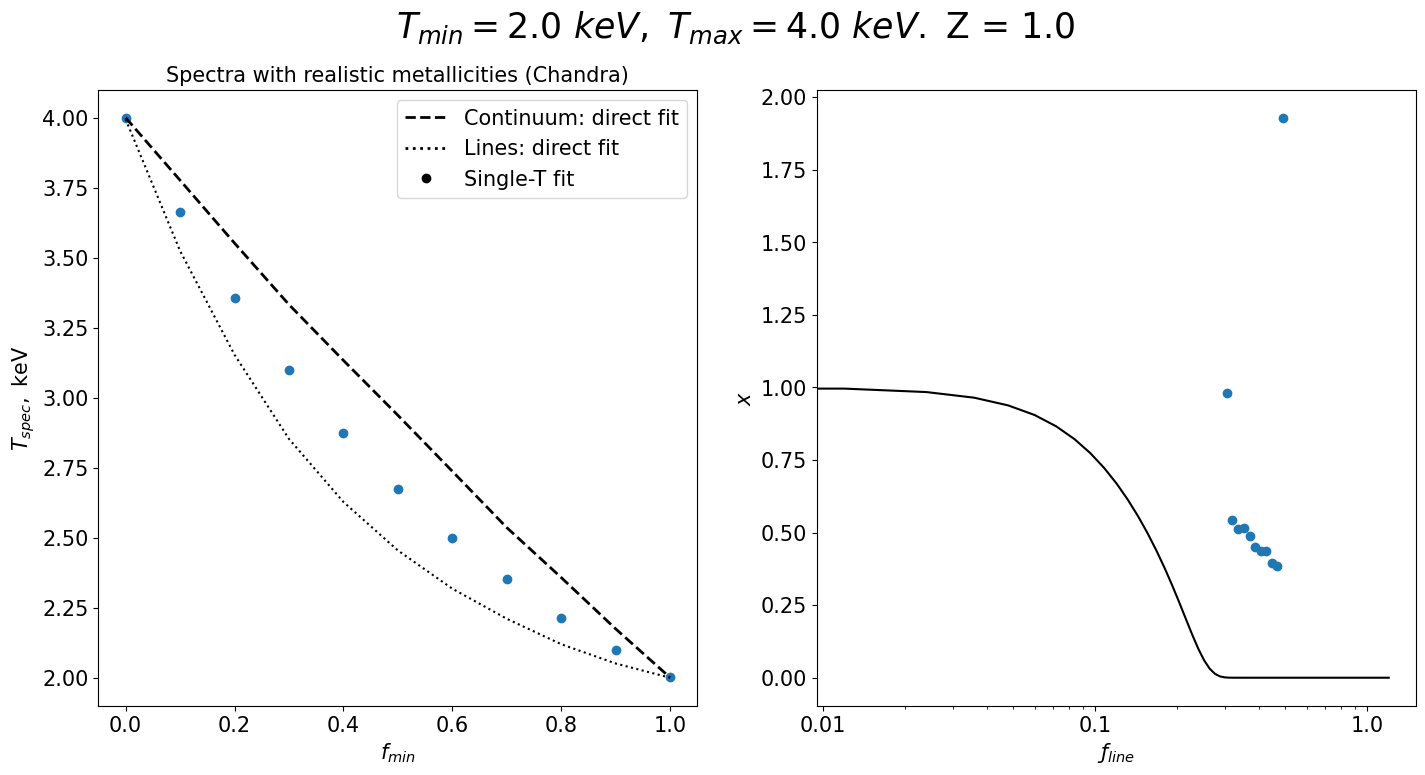

F_cnt + F_lin = F_sum =?= F_fit
1332.37 + 454.53 = 1786.90 =?= 1785.51 ....... f_line = 0.25, x = 0.58
1290.01 + 459.42 = 1749.42 =?= 1748.01 ....... f_line = 0.26, x = 0.50
1247.64 + 464.31 = 1711.95 =?= 1710.51 ....... f_line = 0.27, x = 0.51
1205.28 + 469.20 = 1674.47 =?= 1673.01 ....... f_line = 0.28, x = 0.49
1162.91 + 474.08 = 1637.00 =?= 1635.51 ....... f_line = 0.29, x = 0.52
1120.55 + 478.97 = 1599.52 =?= 1598.01 ....... f_line = 0.30, x = 0.50
1078.18 + 483.86 = 1562.05 =?= 1560.52 ....... f_line = 0.31, x = 0.51
1035.82 + 488.75 = 1524.57 =?= 1523.02 ....... f_line = 0.32, x = 0.52
993.45 + 493.64 = 1487.10 =?= 1485.52 ....... f_line = 0.33, x = 0.51
951.09 + 498.53 = 1449.62 =?= 1448.02 ....... f_line = 0.34, x = 0.49
908.73 + 503.42 = 1412.15 =?= 1410.52 ....... f_line = 0.36, x = 1.00


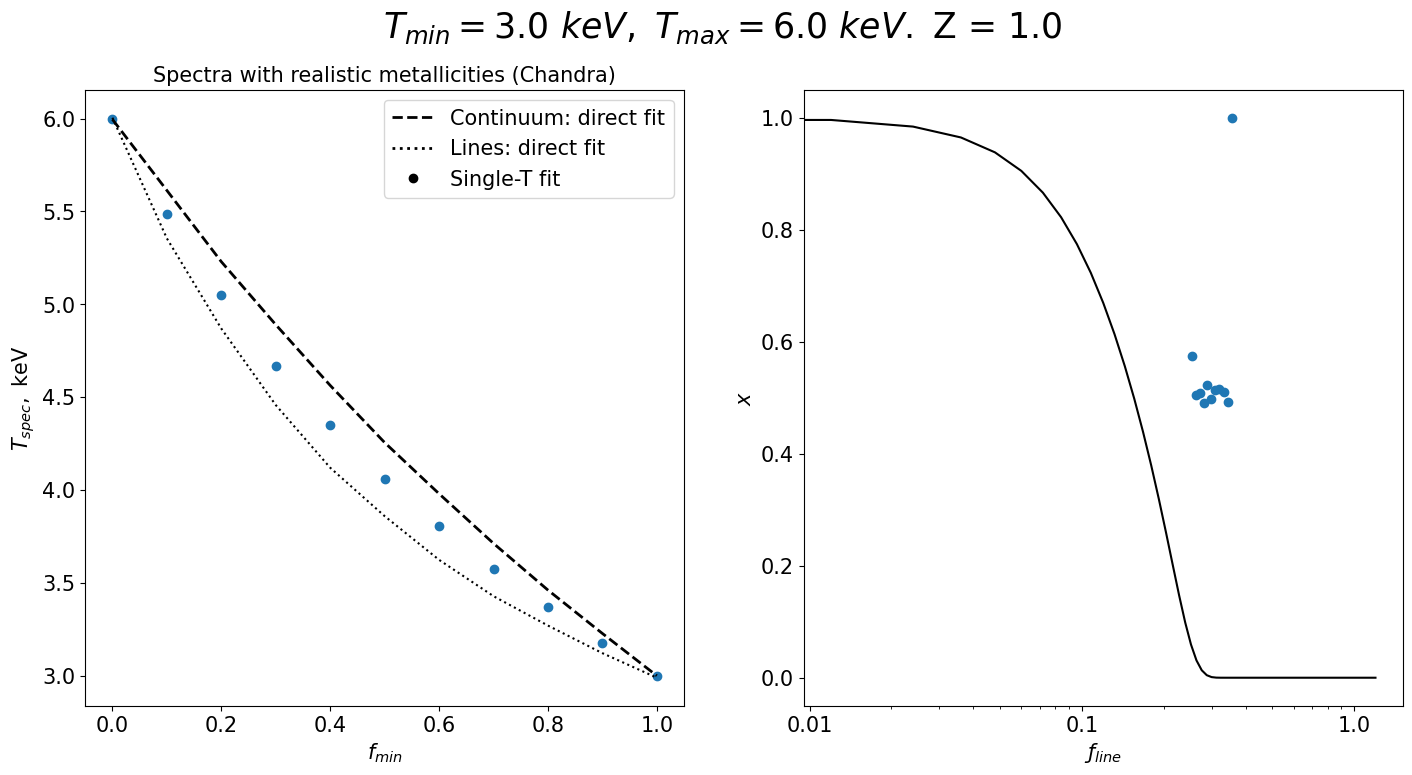

F_cnt + F_lin = F_sum =?= F_fit
501.70 + 932.36 = 1434.06 =?= 1431.72 ....... f_line = 0.65, x = 0.01
462.66 + 1065.42 = 1528.08 =?= 1510.96 ....... f_line = 0.70, x = -0.83
423.61 + 1198.48 = 1622.10 =?= 1590.20 ....... f_line = 0.74, x = -0.71
384.57 + 1331.55 = 1716.12 =?= 1669.44 ....... f_line = 0.78, x = -0.96
345.53 + 1464.61 = 1810.13 =?= 1748.68 ....... f_line = 0.81, x = -0.97
306.48 + 1597.67 = 1904.15 =?= 1827.92 ....... f_line = 0.84, x = -0.10
267.44 + 1730.73 = 1998.17 =?= 1907.17 ....... f_line = 0.87, x = -0.09
228.40 + 1863.80 = 2092.19 =?= 1986.41 ....... f_line = 0.89, x = -0.07
189.35 + 1996.86 = 2186.21 =?= 2065.65 ....... f_line = 0.91, x = -0.07
150.31 + 2129.92 = 2280.23 =?= 2144.89 ....... f_line = 0.93, x = -0.07
111.27 + 2262.98 = 2374.25 =?= 2224.13 ....... f_line = 0.95, x = -0.15


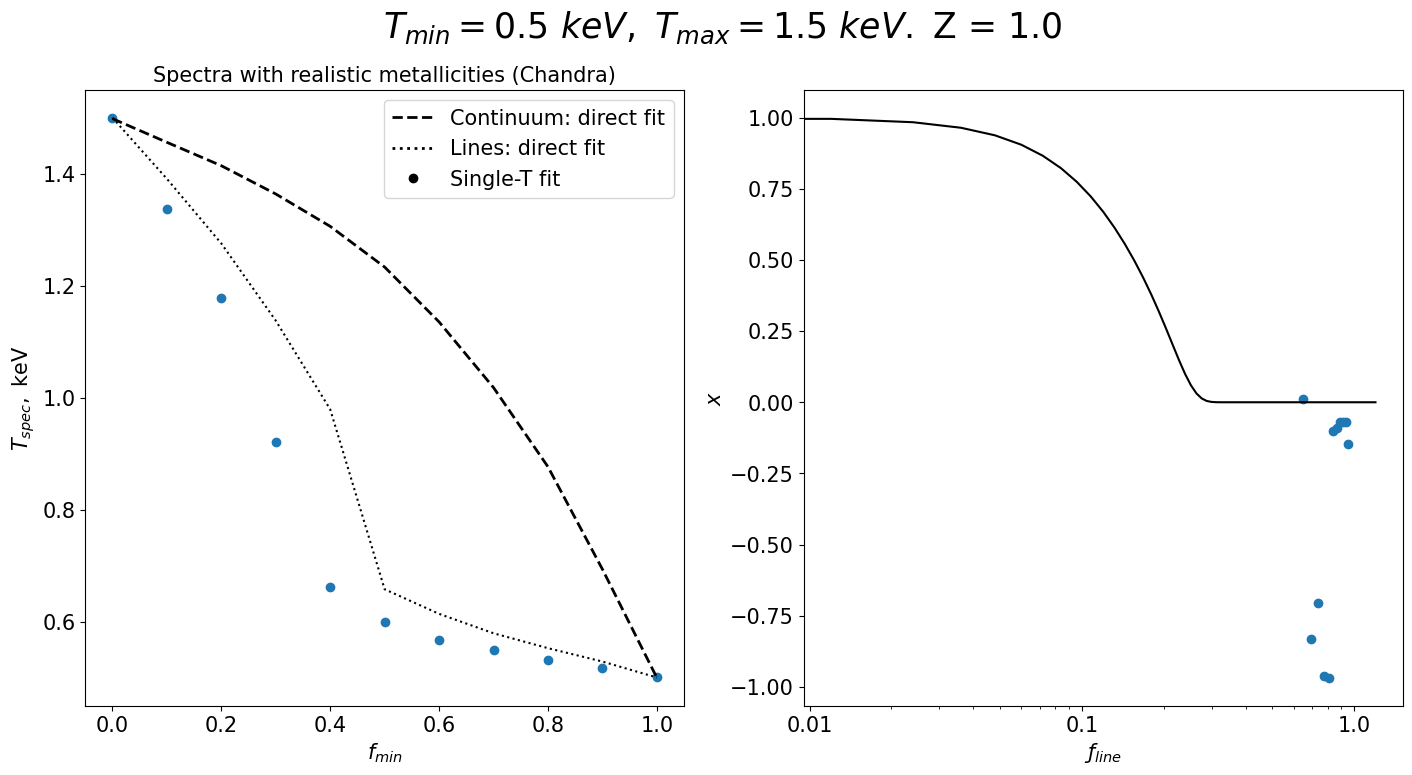

F_cnt + F_lin = F_sum =?= F_fit
908.73 + 503.42 = 1412.15 =?= 1410.52 ....... f_line = 0.36, x = -8.08
849.53 + 660.60 = 1510.13 =?= 1507.30 ....... f_line = 0.44, x = 0.37
790.33 + 817.78 = 1608.11 =?= 1604.08 ....... f_line = 0.51, x = 0.13
731.13 + 974.96 = 1706.09 =?= 1700.86 ....... f_line = 0.57, x = 0.04
671.93 + 1132.14 = 1804.07 =?= 1797.64 ....... f_line = 0.63, x = 0.03
612.73 + 1289.33 = 1902.05 =?= 1894.42 ....... f_line = 0.68, x = 0.01
553.53 + 1446.51 = 2000.03 =?= 1991.21 ....... f_line = 0.72, x = 0.01
494.33 + 1603.69 = 2098.02 =?= 2087.99 ....... f_line = 0.76, x = 0.01
435.13 + 1760.87 = 2196.00 =?= 2184.77 ....... f_line = 0.80, x = 0.00
375.93 + 1918.05 = 2293.98 =?= 2281.55 ....... f_line = 0.84, x = 0.00
316.73 + 2075.23 = 2391.96 =?= 2378.33 ....... f_line = 0.87, x = 1.00


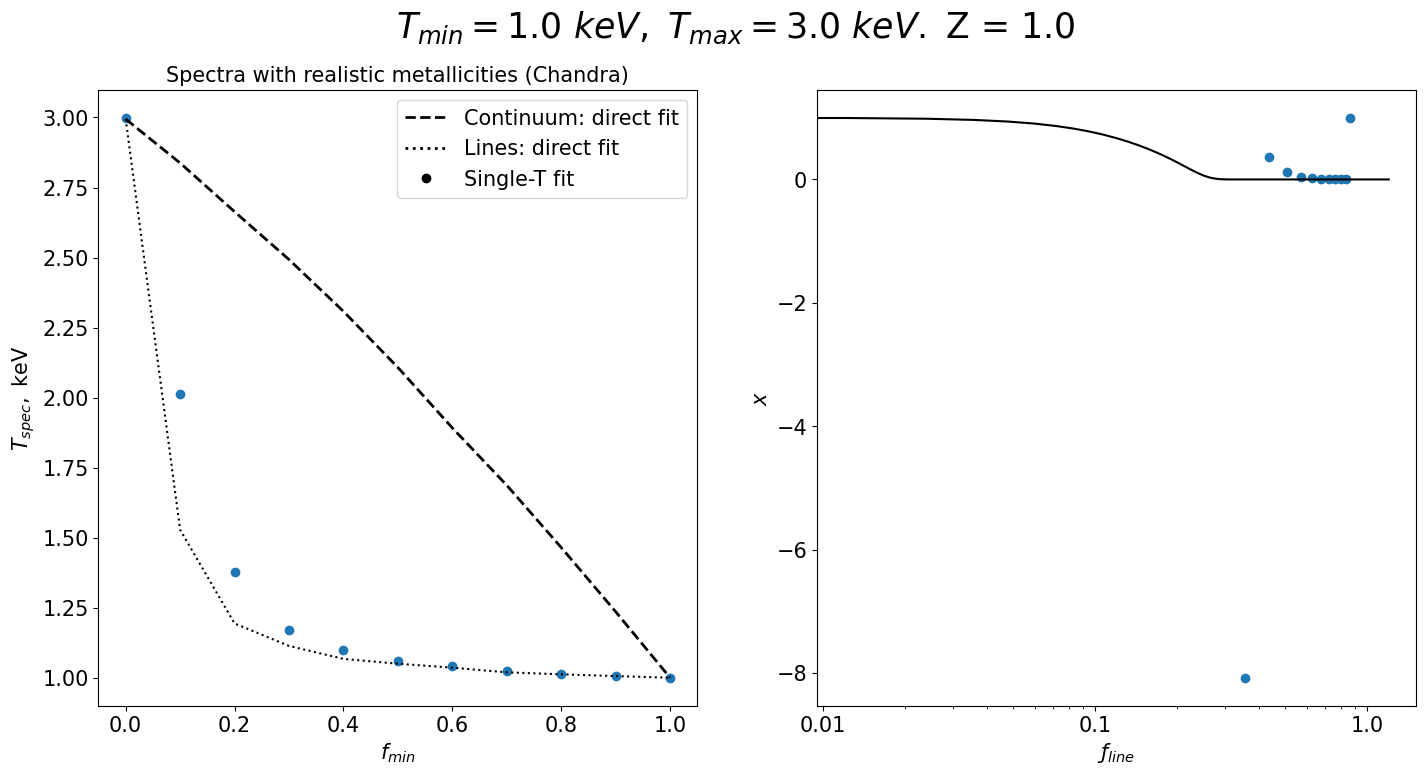

F_cnt + F_lin = F_sum =?= F_fit
1332.37 + 454.53 = 1786.90 =?= 1785.51 ....... f_line = 0.25, x = 4.44
1265.08 + 472.14 = 1737.21 =?= 1735.80 ....... f_line = 0.27, x = 0.48
1197.78 + 489.75 = 1687.53 =?= 1686.09 ....... f_line = 0.29, x = 0.48
1130.48 + 507.36 = 1637.84 =?= 1636.38 ....... f_line = 0.31, x = 0.46
1063.19 + 524.97 = 1588.15 =?= 1586.67 ....... f_line = 0.33, x = 0.47
995.89 + 542.57 = 1538.46 =?= 1536.96 ....... f_line = 0.35, x = 0.46
928.59 + 560.18 = 1488.78 =?= 1487.26 ....... f_line = 0.38, x = 0.45
861.29 + 577.79 = 1439.09 =?= 1437.55 ....... f_line = 0.40, x = 0.41
794.00 + 595.40 = 1389.40 =?= 1387.84 ....... f_line = 0.43, x = 0.40
726.70 + 613.01 = 1339.71 =?= 1338.13 ....... f_line = 0.46, x = 0.34
659.40 + 630.62 = 1290.03 =?= 1288.42 ....... f_line = 0.49, x = 0.99


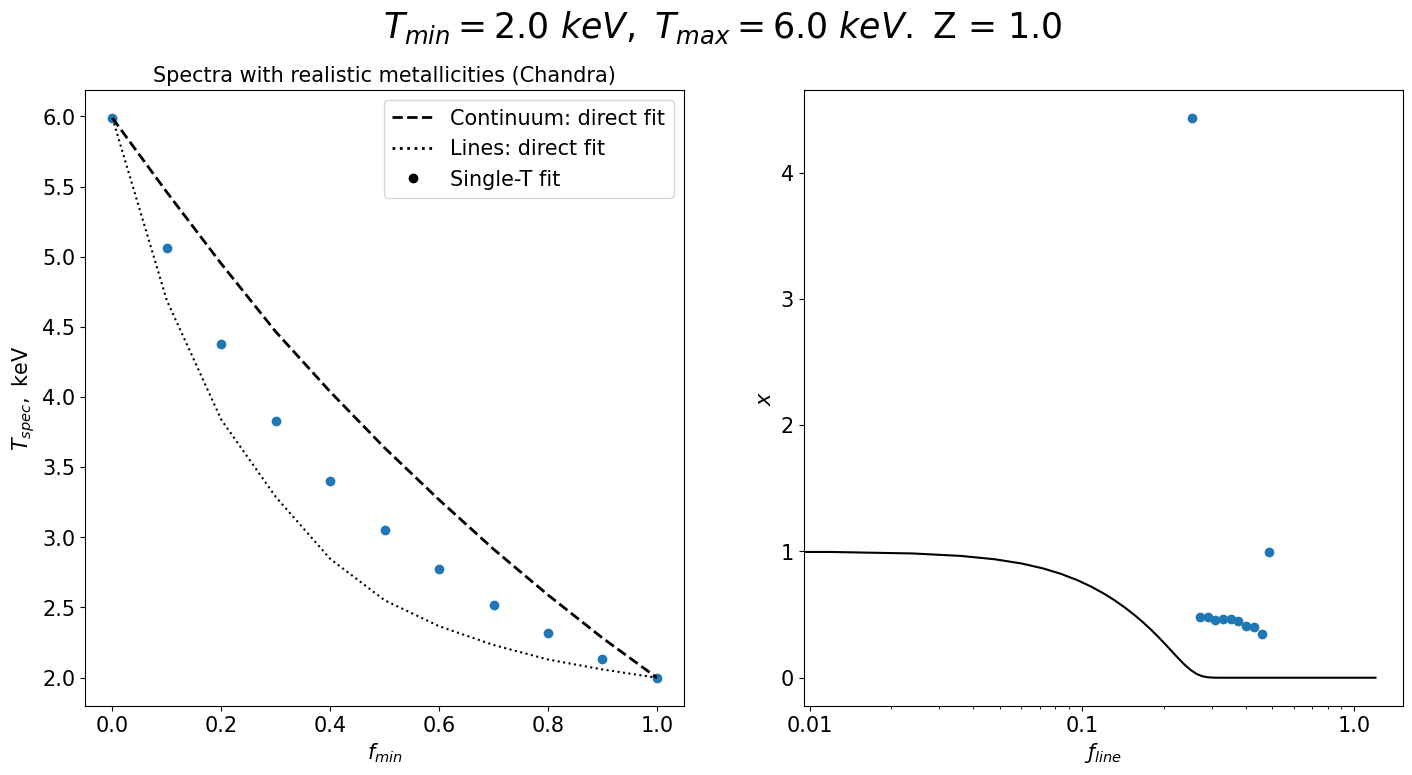

F_cnt + F_lin = F_sum =?= F_fit
1513.45 + 401.83 = 1915.27 =?= 1914.55 ....... f_line = 0.21, x = 0.99
1452.97 + 411.99 = 1864.96 =?= 1864.15 ....... f_line = 0.22, x = 0.60
1392.50 + 422.15 = 1814.65 =?= 1813.74 ....... f_line = 0.23, x = 0.59
1332.03 + 432.31 = 1764.33 =?= 1763.34 ....... f_line = 0.25, x = 0.51
1271.56 + 442.46 = 1714.02 =?= 1712.94 ....... f_line = 0.26, x = 0.49
1211.09 + 452.62 = 1663.71 =?= 1662.54 ....... f_line = 0.27, x = 0.48
1150.61 + 462.78 = 1613.40 =?= 1612.13 ....... f_line = 0.29, x = 0.47
1090.14 + 472.94 = 1563.08 =?= 1561.73 ....... f_line = 0.30, x = 0.47
1029.67 + 483.10 = 1512.77 =?= 1511.33 ....... f_line = 0.32, x = 0.48
969.20 + 493.26 = 1462.46 =?= 1460.92 ....... f_line = 0.34, x = 0.48
908.73 + 503.42 = 1412.15 =?= 1410.52 ....... f_line = 0.36, x = 1.00


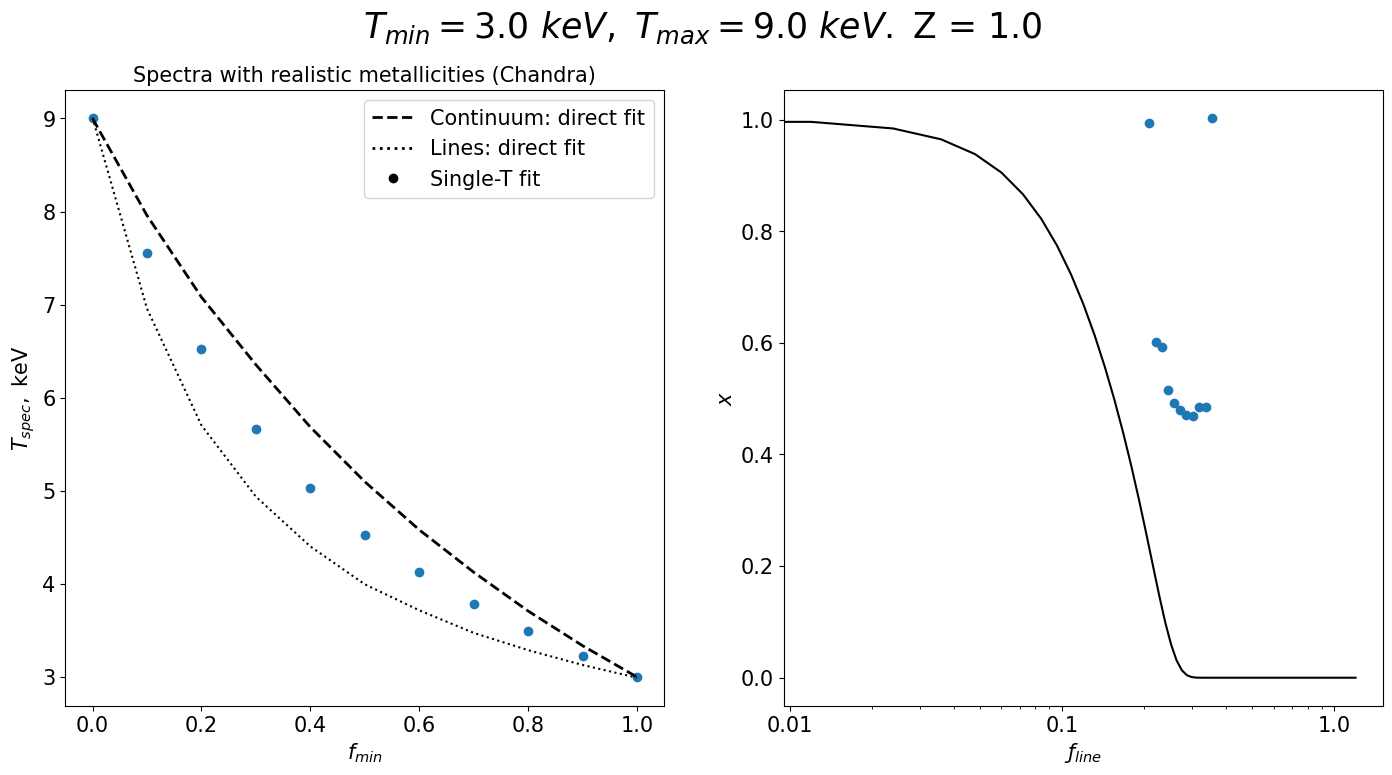

F_cnt + F_lin = F_sum =?= F_fit
659.40 + 630.62 = 1290.03 =?= 1288.42 ....... f_line = 0.49, x = -0.56
604.59 + 793.86 = 1398.45 =?= 1381.99 ....... f_line = 0.57, x = -0.55
549.78 + 957.09 = 1506.87 =?= 1475.56 ....... f_line = 0.64, x = -0.82
494.96 + 1120.33 = 1615.29 =?= 1569.13 ....... f_line = 0.69, x = 0.06
440.15 + 1283.57 = 1723.72 =?= 1662.70 ....... f_line = 0.74, x = 0.02
385.34 + 1446.80 = 1832.14 =?= 1756.27 ....... f_line = 0.79, x = 0.00
330.52 + 1610.04 = 1940.56 =?= 1849.84 ....... f_line = 0.83, x = -0.00
275.71 + 1773.27 = 2048.98 =?= 1943.41 ....... f_line = 0.87, x = -0.01
220.89 + 1936.51 = 2157.41 =?= 2036.98 ....... f_line = 0.90, x = -0.02
166.08 + 2099.75 = 2265.83 =?= 2130.56 ....... f_line = 0.93, x = -0.01
111.27 + 2262.98 = 2374.25 =?= 2224.13 ....... f_line = 0.95, x = 0.99


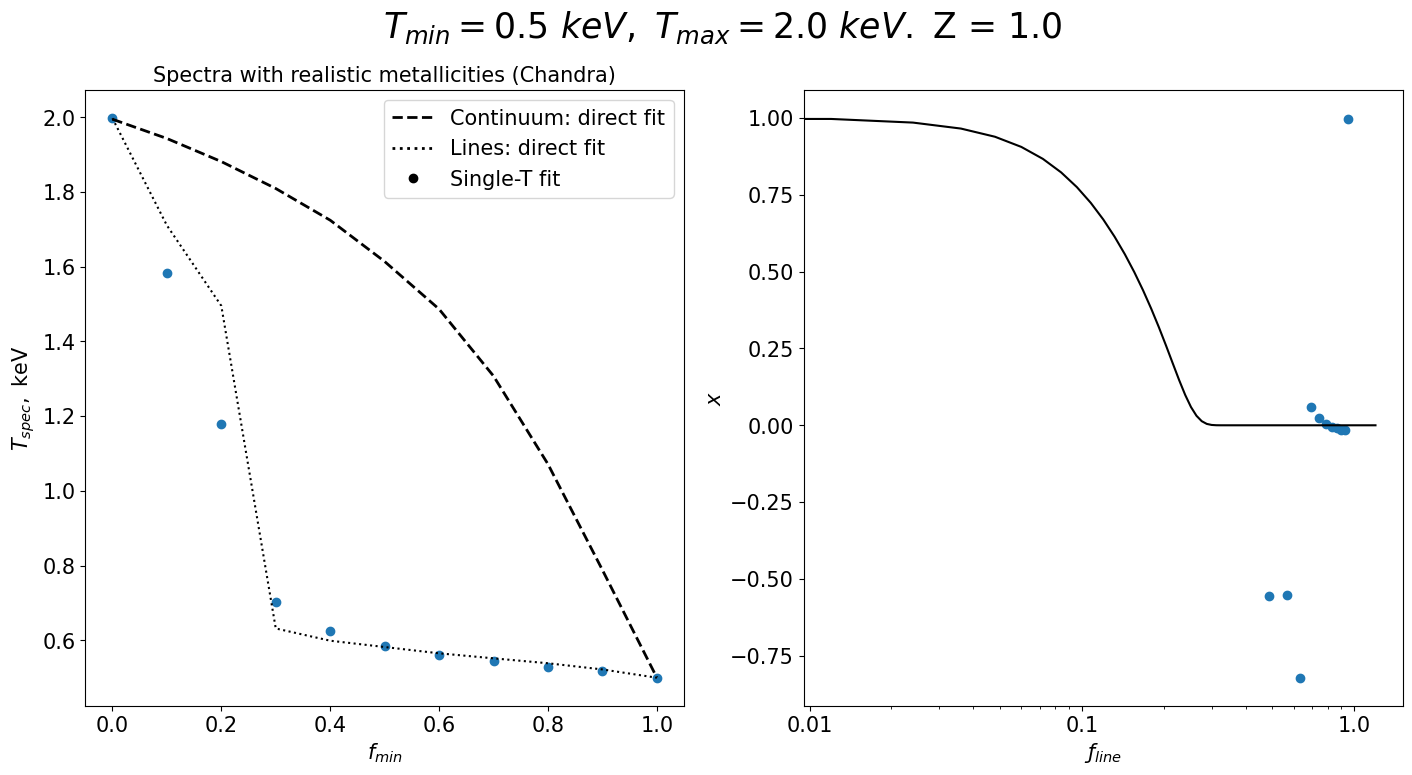

F_cnt + F_lin = F_sum =?= F_fit
1093.35 + 478.32 = 1571.67 =?= 1569.97 ....... f_line = 0.30, x = -0.14
1015.69 + 638.01 = 1653.70 =?= 1650.81 ....... f_line = 0.39, x = 0.55
938.03 + 797.70 = 1735.73 =?= 1731.64 ....... f_line = 0.46, x = 0.12
860.36 + 957.40 = 1817.76 =?= 1812.48 ....... f_line = 0.53, x = 0.04
782.70 + 1117.09 = 1899.79 =?= 1893.31 ....... f_line = 0.59, x = 0.02
705.04 + 1276.78 = 1981.82 =?= 1974.15 ....... f_line = 0.64, x = 0.01
627.38 + 1436.47 = 2063.85 =?= 2054.99 ....... f_line = 0.70, x = 0.01
549.72 + 1596.16 = 2145.87 =?= 2135.82 ....... f_line = 0.74, x = 0.01
472.05 + 1755.85 = 2227.90 =?= 2216.66 ....... f_line = 0.79, x = 0.00
394.39 + 1915.54 = 2309.93 =?= 2297.49 ....... f_line = 0.83, x = 0.00
316.73 + 2075.23 = 2391.96 =?= 2378.33 ....... f_line = 0.87, x = 1.00


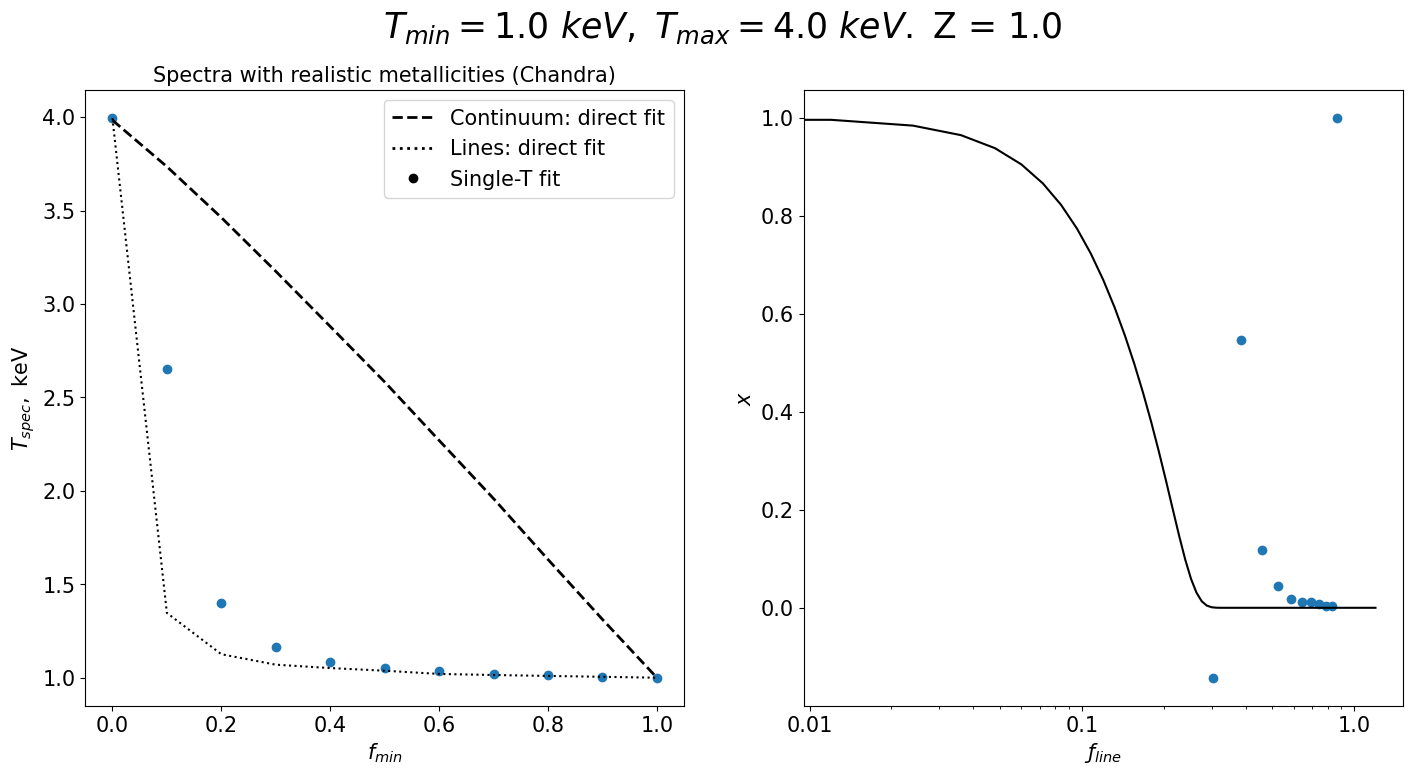

F_cnt + F_lin = F_sum =?= F_fit
1468.22 + 420.71 = 1888.92 =?= 1888.01 ....... f_line = 0.22, x = -1.01
1387.33 + 441.70 = 1829.03 =?= 1828.05 ....... f_line = 0.24, x = 0.52
1306.45 + 462.69 = 1769.14 =?= 1768.09 ....... f_line = 0.26, x = 0.46
1225.57 + 483.68 = 1709.25 =?= 1708.13 ....... f_line = 0.28, x = 0.44
1144.69 + 504.67 = 1649.36 =?= 1648.17 ....... f_line = 0.31, x = 0.44
1063.81 + 525.66 = 1589.47 =?= 1588.21 ....... f_line = 0.33, x = 0.44
982.93 + 546.66 = 1529.58 =?= 1528.26 ....... f_line = 0.36, x = 0.41
902.05 + 567.65 = 1469.70 =?= 1468.30 ....... f_line = 0.39, x = 0.40
821.17 + 588.64 = 1409.81 =?= 1408.34 ....... f_line = 0.42, x = 0.37
740.29 + 609.63 = 1349.92 =?= 1348.38 ....... f_line = 0.45, x = 0.34
659.40 + 630.62 = 1290.03 =?= 1288.42 ....... f_line = 0.49, x = 1.01


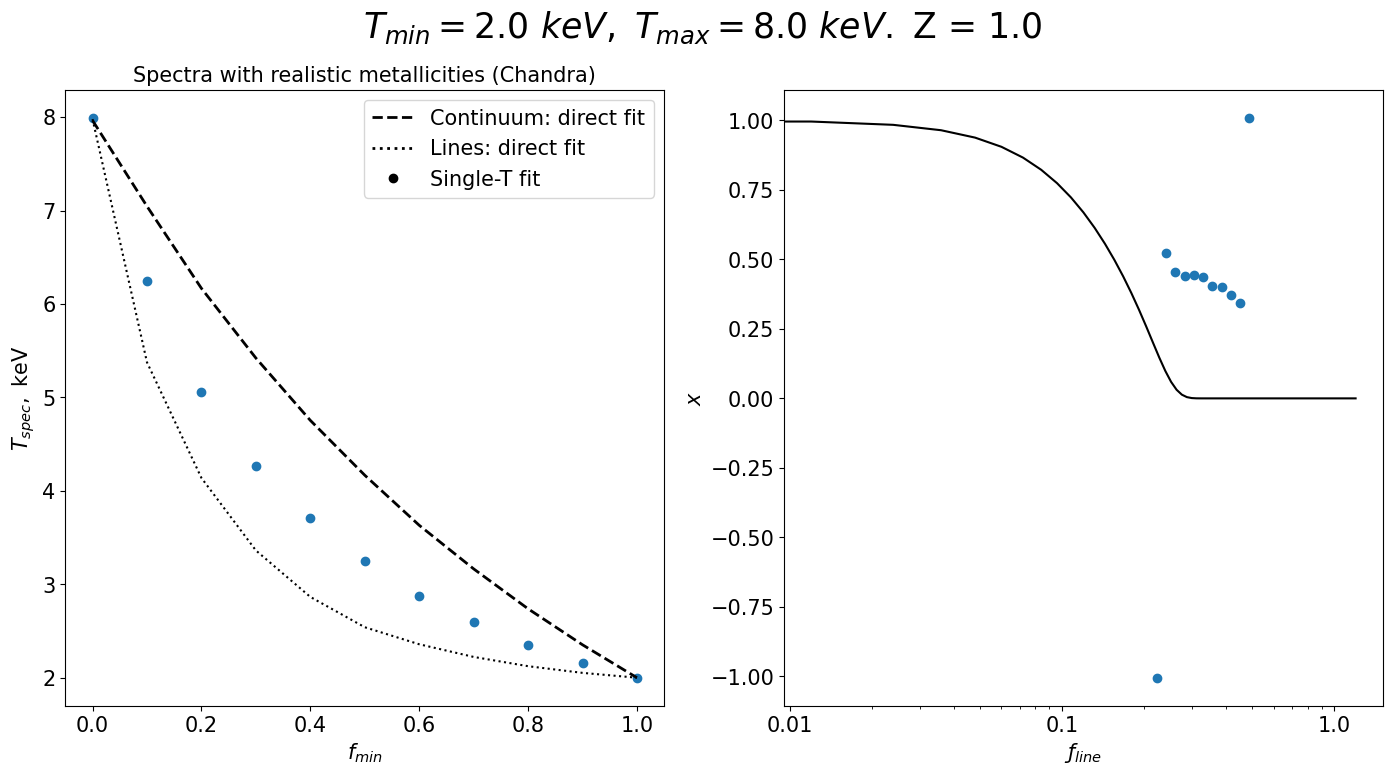

F_cnt + F_lin = F_sum =?= F_fit
1596.00 + 351.54 = 1947.53 =?= 1947.19 ....... f_line = 0.18, x = 1.00
1527.27 + 366.73 = 1893.99 =?= 1893.53 ....... f_line = 0.19, x = 0.66
1458.54 + 381.91 = 1840.46 =?= 1839.86 ....... f_line = 0.21, x = 0.60
1389.82 + 397.10 = 1786.92 =?= 1786.19 ....... f_line = 0.22, x = 0.56
1321.09 + 412.29 = 1733.38 =?= 1732.53 ....... f_line = 0.24, x = 0.51
1252.36 + 427.48 = 1679.84 =?= 1678.86 ....... f_line = 0.25, x = 0.48
1183.63 + 442.67 = 1626.30 =?= 1625.19 ....... f_line = 0.27, x = 0.45
1114.91 + 457.86 = 1572.76 =?= 1571.52 ....... f_line = 0.29, x = 0.46
1046.18 + 473.04 = 1519.22 =?= 1517.86 ....... f_line = 0.31, x = 0.46
977.45 + 488.23 = 1465.68 =?= 1464.19 ....... f_line = 0.33, x = 0.47
908.73 + 503.42 = 1412.15 =?= 1410.52 ....... f_line = 0.36, x = 1.00


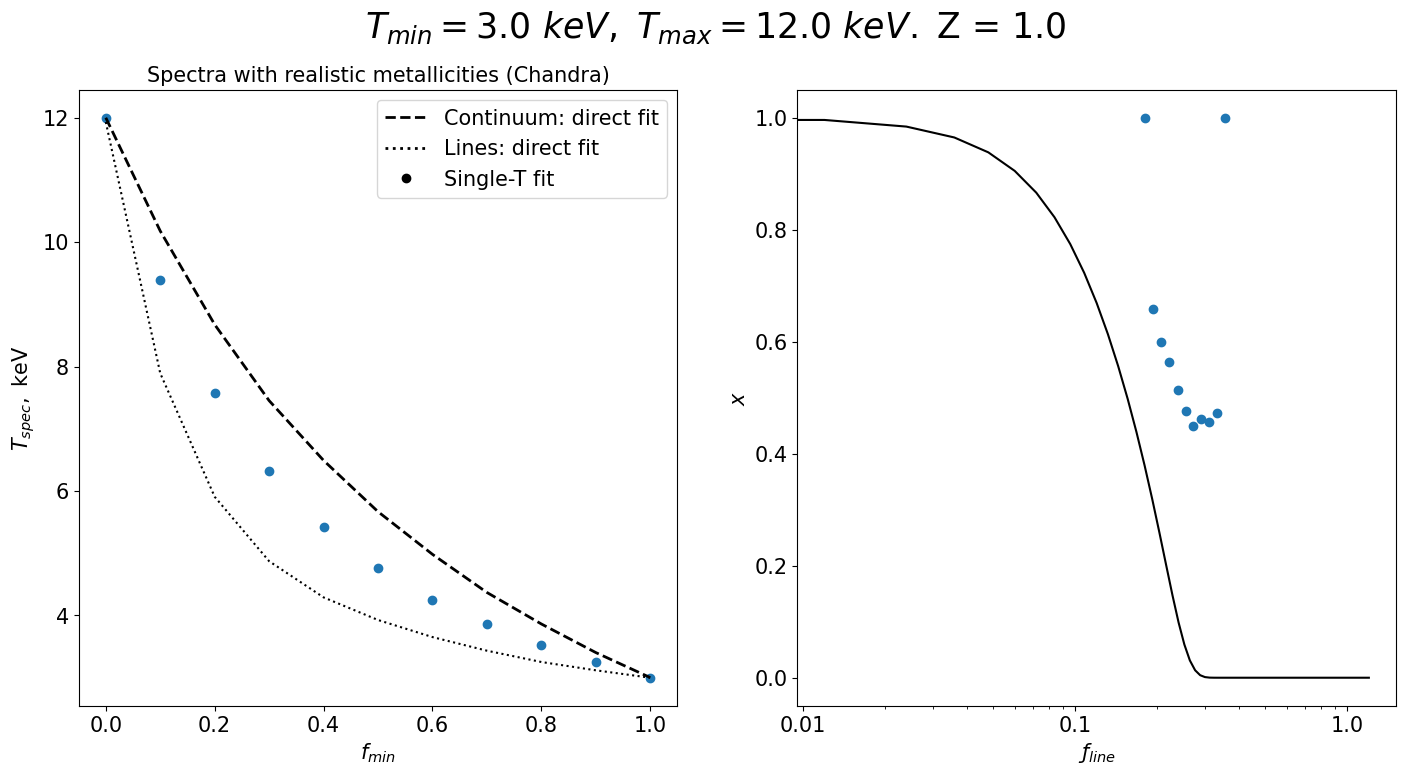

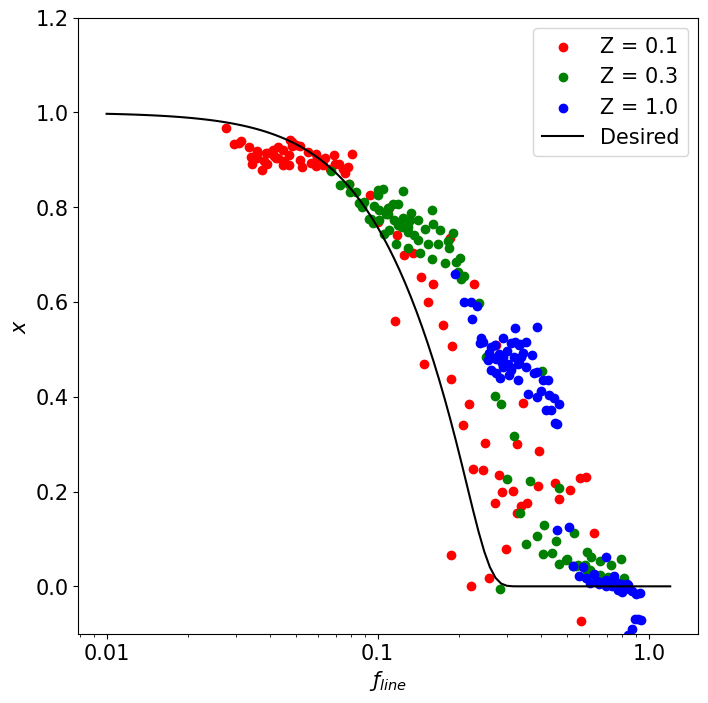

In [269]:
iks_all = []
fline_all = []

for metallicity in metallicities:

    for T_min, T_max in list(zip(T_mins, T_maxs)):

        name_key = str(metallicity)+': '+str(T_min)+'-'+str(T_max)
         
        Tspec_list1 = Tspec_cont_f6[name_key]  # continuum
        Tspec_list2 = single_T_fit_f6[name_key] # realistic metallicities
        Tspec_list3 = Tspec_lines_f6[name_key]  # line-dominated

        num_iks = [tsp - tli for tsp, tli in zip(Tspec_list2, Tspec_list3)]
        denom_iks = [tco - tli for tco, tli in zip(Tspec_list1, Tspec_list3)]
                
        for i in range(0, len(denom_iks)):
            if denom_iks[i] == 0:
                denom_iks[i] = 0.00001
        
        #if 0.0 in denom_iks:
        #    denom_iks[np.index(0.0)] = 0.00001
         
        #denom_iks[np.where(denom_iks == 0.0)] = 0.00002
        
        #print(denom_iks)
        iks = [numx/denomx for numx, denomx in zip(num_iks, denom_iks)]

        Flux_list1 = Flux_cont_f6[name_key] # continuum
        Flux_list2 = Flux_fit_f6[name_key] # realistic metallicities
        Flux_list3 = Flux_lines_f6[name_key] # line-dominated
        
        Flux_list2 = [a*metallicity for a in Flux_fit_f6[name_key]] 
        Flux_list3 = [a*metallicity for a in Flux_lines_f6[name_key]]

        #num_fline = Flux_list3
        #denom_fline = [Fli + Fco for Fli, Fco in zip(Flux_list3, Flux_list1)]
        #denom_fline1 = Flux_list2
        #fline = [numf/denomf for numf, denomf in zip(num_fline, denom_fline)]

        fline = [Fli/(Fli + Fco) for Fli, Fco in zip(Flux_list3, Flux_list1)]
        
        #fline = [1-Fco/Fsum for Fco, Fsum in zip(Flux_list1, Flux_list2)]
        
        #fline = [1-Fco/(Fco+Fli) for Fco, Fli in zip(Flux_list1, Flux_list3)]
        
        
        iks_all.append(iks[1:-1])
        fline_all.append(fline[1:-1])

        a=1
        
        if a==1:
            
            plt.figure(figsize=(17,8))
            plt.suptitle(f'$T_{{min}}={T_min} \ keV, \ T_{{max}}={T_max} \ keV.$ Z = '+str(metallicity)+'\n \n', fontsize = 25)

            plt.subplot(1,2,1)
            # continuum
            plt.plot(f_min, Tspec_list1, linestyle = '--', linewidth = 2, color = 'black')
            # realistic metallicities
            plt.scatter(f_min, Tspec_list2)#, color='black')
            # line-dominated
            plt.plot(f_min, Tspec_list3, linestyle=':', color='black')
        
            print('F_cnt + F_lin = F_sum =?= F_fit')
            for i in range(0, len(f_min)):
                print(f'{Flux_list1[i]*10**12:.2f} + {Flux_list3[i]*10**12:.2f} = {Flux_list1[i]*10**12 + Flux_list3[i]*10**12:.2f} =?= {Flux_list2[i]*10**12:.2f} ....... f_line = {fline[i]:.2f}, x = {iks[i]:.2f}')

            handles, labels = plt.gca().get_legend_handles_labels()
            line_n = Line2D([], [], label='Continuum: direct fit', color='black', linestyle='--', linewidth=2)
            line_e = Line2D([], [], label='Lines: direct fit', color='black', linestyle=':', linewidth=2)
            dots_f = Line2D([], [], label='Single-T fit', color='black', marker='.', linestyle='None', markersize=12)
            handles.extend([line_n, line_e, dots_f])
            plt.legend(handles=handles, fontsize=15)

            #plt.ylim(0, 12.1)
            plt.xticks(size=15)
            plt.yticks(size=15)
            plt.xlabel('$f_{min}$', fontsize = 15)
            plt.ylabel('$T_{spec},$ keV', fontsize = 15)
            plt.title('Spectra with realistic metallicities ('+telescope+')', fontsize = 15)
            #plt.savefig('Fig5_eROSITA.png')

            plt.subplot(1,2,2)
            #plt.plot(f_min, iks, color='red')
            #plt.plot(f_min, fline, color='blue')

            plt.scatter(fline, iks)
            ii = np.linspace(0, 1.2, 101)
            plt.plot(ii, universal_function(ii, 0.19, 0.25, 1.00), color='black', linestyle='-', label = 'Desired')
            plt.xscale('log')
            #plt.ylim(-0.1, 1.2)
            plt.xticks([0.01, 0.1, 1.0], [0.01, 0.1, 1.0], size=15)
            plt.yticks(size=15)
            plt.xlabel('$ƒ_{line}$', fontsize = 15)
            plt.ylabel('$x$', fontsize = 15)
            #plt.title('Spectra with realistic metallicities ('+telescope+') \n', fontsize = 15)
            plt.show()
            
plt.figure(figsize=(8,8))

#fline_all = [item for sublist in fline_all for item in sublist]
#iks_all = [item for sublist in iks_all for item in sublist]

#plt.scatter(fline_all, iks_all, color='black')
plt.scatter(fline_all[0:int(len(fline_all)/3)-1], iks_all[0:int(len(fline_all)/3)-1], label = 'Z = 0.1', color='red')
plt.scatter(fline_all[int(len(fline_all)/3):2*int(len(fline_all)/3)], iks_all[int(len(fline_all)/3):2*int(len(fline_all)/3)], label = 'Z = 0.3', color='green')
plt.scatter(fline_all[2*int(len(fline_all)/3):int(len(fline_all))], iks_all[2*int(len(fline_all)/3):int(len(fline_all))], label = 'Z = 1.0', color='blue')

#ii = np.linspace(0, 1.2, 101)
ii = np.logspace(np.log10(0.01), np.log10(1.2), 101)
plt.plot(ii, universal_function(ii, 0.19, 0.25, 1.00), color='black', linestyle='-', label = 'Desired')

plt.legend(fontsize=15)
plt.xscale('log')
plt.ylim(-0.1, 1.2)
plt.xticks([0.01, 0.1, 1.0], [0.01, 0.1, 1.0], size=15)
plt.yticks(size=15)
plt.xlabel('$ƒ_{line}$', fontsize = 15)
plt.ylabel('$x$', fontsize = 15)
#plt.title('Spectra with realistic metallicities ('+telescope+') \n', fontsize = 15)
#plt.savefig('Fig6_'+telescope+'.png')
plt.show()

In [270]:
import scipy.optimize

In [271]:
x111 = [item for sublist in fline_all[0:24] for item in sublist]
y111 = [item for sublist in iks_all[0:24] for item in sublist]

popt, pcov = scipy.optimize.curve_fit(universal_function, x111, y111, [0.19, 0.25, 1.0])#, bounds=((0, 0.5), (0, 0.5), (0.5, 1.5)))

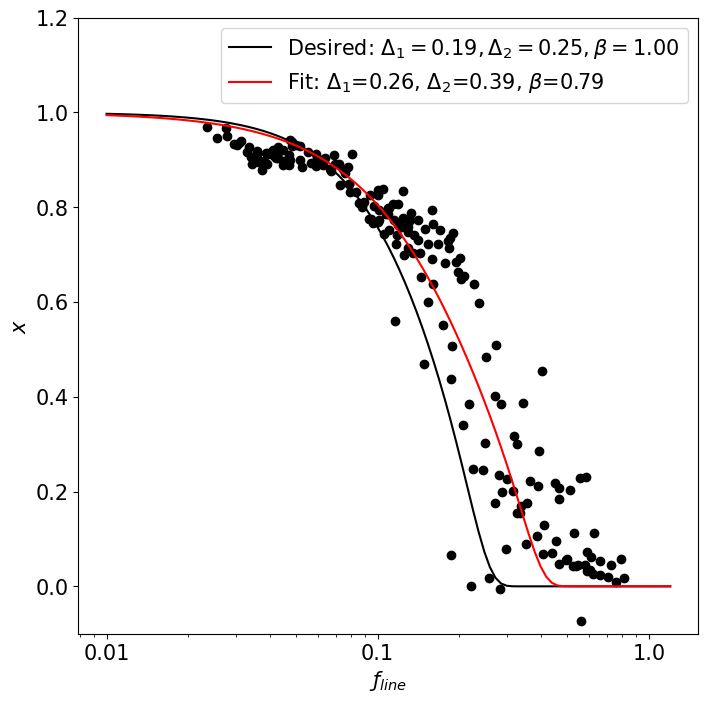

In [272]:
plt.figure(figsize=(8,8))
plt.scatter(x111, y111, color='black')

#ii = np.linspace(0, 1.2, 101)
ii = np.logspace(np.log10(0.01), np.log10(1.2), 101)
plt.plot(ii, universal_function(ii, 0.19, 0.25, 1.00), color='black', linestyle='-', label = 'Desired: $\Delta_1=0.19, \Delta_2=0.25, \\beta=1.00$')
plt.plot(ii, universal_function(ii, *popt), 'r-', label='Fit: $\Delta_1$=%.2f, $\Delta_2$=%.2f, $\\beta$=%.2f' % tuple(popt))

plt.legend(fontsize=15)
plt.xscale('log')
plt.ylim(-0.1, 1.2)
plt.xticks([0.01, 0.1, 1.0], [0.01, 0.1, 1.0], size=15)
plt.yticks(size=15)
plt.xlabel('$ƒ_{line}$', fontsize = 15)
plt.ylabel('$x$', fontsize = 15)
#plt.title('Spectra with realistic metallicities ('+telescope+') \n', fontsize = 15)
#plt.savefig('Fig6_'+telescope+'.png')
plt.show()

In [267]:
import emcee

def model(params, x):
    d1, d2, b = params
    return np.exp( -(x/d1)**(2*b) ) * np.exp( -(x/d2)**(8) )

def lnlike(params, x, y):
    d1, d2, b = params
    # the likelihood is sum of the lot of normal distributions
    return -0.5 * np.sum( ((y - model(params, x))/1 )**2 )# + np.log(2*np.pi*sigmu**2) )
    
def lnprior(params):
    # The parameters are stored as a vector of values, so unpack them
    d1, d2, b = params
    # Bounds
    if 0.0 < d1 < 0.5 and 0.0 < d2 < 0.5 and 0.5 < b < 1.5:
        return 0.0
    return -np.inf

def lnprob(params, x, y):
    lp = lnprior(params)
    if np.isfinite(lp):
          return lp + lnlike(params, x, y)
    else:
          return -np.inf

In [279]:
x111 = [item for sublist in fline_all[0:24] for item in sublist]
y111 = [item for sublist in iks_all[0:24] for item in sublist]

print(len(x111))
print(len(y111))

for j in range(0, len(y111)):
    
    if y111[j] > 1.2 or y111[j] <= 0:
        x111[j] = "k"
        y111[j] = "k"

x111 = [i for i in x111 if i != "k"]
y111 = [i for i in y111 if i != "k"]

print(len(x111))
print(len(y111))

216
216
192
192


In [280]:
#x111 = np.linspace(0, 1.2, 101)
#x111 = np.logspace(np.log10(0.01), np.log10(1.2), 101)
#y111 = universal_function(x111, 0.19, 0.25, 1.00) + np.random.normal(0, 0.4, size=101)
#plt.scatter(x111, y111)
#lt.xscale('log')

In [284]:
#def best_with_emcee(dtTrue, dmTrue, lengthofchain, arguments, draw):

true_delta1, true_delta2, true_beta = 0.25, 0.25, 1.0

nwalkers = 100
initial = [0.5, 0.5, 0.5]
ndim = len(initial)

# make the initial values more noisy
p0 = [np.array(initial) + 1e-7 * np.random.randn(ndim) for i in range(nwalkers)]

sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args = (x111, y111) )

#p0, _, _ = sampler.run_mcmc(p0, 500, progress=True)
#sampler.reset()
lengthofchain = 500
pos,prob,state = sampler.run_mcmc(p0, lengthofchain, progress = False)

/home/aleksei/.local/lib/python3.10/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]


In [285]:
samples = sampler.flatchain
params_best  = samples[np.argmax(sampler.flatlnprobability)]
#randoms = np.random.randint(len(samples), size=50)

#print("Initial dt = {0:.3f}".format(initial[0]))
#print("Initial dm = {0:.3f}".format(initial[1]))
#print("sigmu = {0:.3f}".format(optim.x[2]))

#print('Best dt = {0:.3f}'.format(s[0]))
#print('Best dmu = {0:.3f}'.format(s[1])) 
#print('or best magnification ratio = {0:.3f}'.format(10**(-0.4*s[1])) )


#for params in samples[randoms]:
#  plt.plot(arguments[0], model(params, arguments[0], arguments[2], arguments[3]), color="b", alpha=0.1)

#best_fit_model = model(params_best, arguments[0], arguments[2], arguments[3])

#return params_best[0], params_best[1], samples[randoms]

#best_dt, best_dm, srand = best_with_MCMC(dtTrue=dt_true, 
#                              dmTrue=dm_true, 
#                              lengthofchain=500, 
#                              arguments=(t1_grid, lc1_noise, t2_grid, lc2_noise), 
#                              draw=True)
#print(best_dt, best_dm)
params_best

array([0.23498303, 0.49930648, 0.71244306])

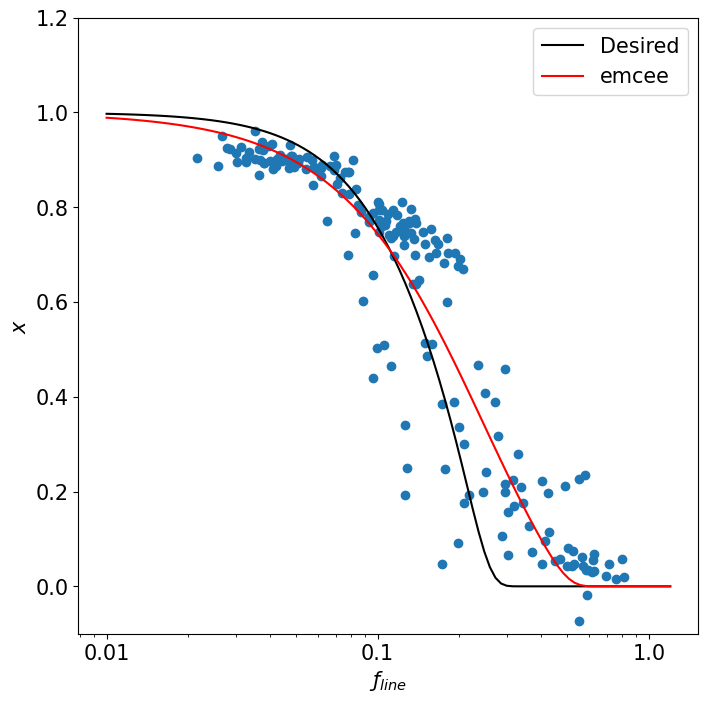

In [329]:
plt.figure(figsize=(8,8))
plt.scatter(x111, y111)

#ii = np.linspace(0, 1.2, 101)
ii = np.logspace(np.log10(0.01), np.log10(1.2), 101)
plt.plot(ii, universal_function(ii, 0.19, 0.25, 1.00), color='black', linestyle='-', label = 'Desired')
plt.plot(ii, model(params_best, ii), color='red', linestyle='-', label = 'emcee')

plt.legend(fontsize=15)
plt.xscale('log')
plt.ylim(-0.1, 1.2)
plt.xticks([0.01, 0.1, 1.0], [0.01, 0.1, 1.0], size=15)
plt.yticks(size=15)
plt.xlabel('$ƒ_{line}$', fontsize = 15)
plt.ylabel('$x$', fontsize = 15)
#plt.title('Spectra with realistic metallicities ('+telescope+') \n', fontsize = 15)
#plt.savefig('Fig6_'+telescope+'.png')
plt.show()

In [ ]:

    #if False:
    #  fig, axes = plt.subplots(ndim, figsize=(10, 7), sharex=True)
    #  chain = sampler.get_chain()
    #  labels = ['$\Delta t$', '$\Delta m$', '$\sigma_m$']
    #  for i in range(ndim):
    #      ax = axes[i]
    #      ax.plot(chain[:, :, i], "k", alpha=0.3)
    #      ax.set_xlim(0, len(chain))
    #      ax.set_ylabel(labels[i])
    #      ax.yaxis.set_label_coords(-0.1, 0.5)
    #  axes[-1].set_xlabel("step number")
      #tau = sampler.get_autocorr_time()
      #print(tau)
      #flat_samples = sampler.get_chain()#discard=400, thin=1, flat=False)
      #print(flat_samples.shape)

    #  fig = corner.corner(sampler.flatchain, 
    #                      show_titles=True, 
    #                      labels=['$\Delta t$', '$\Delta m$'], 
    #                      truths=[dt_true, dm_true], 
    #                      scale_hist=True, 
    #                      quantiles=[0.16, 0.5, 0.84])


Some results:

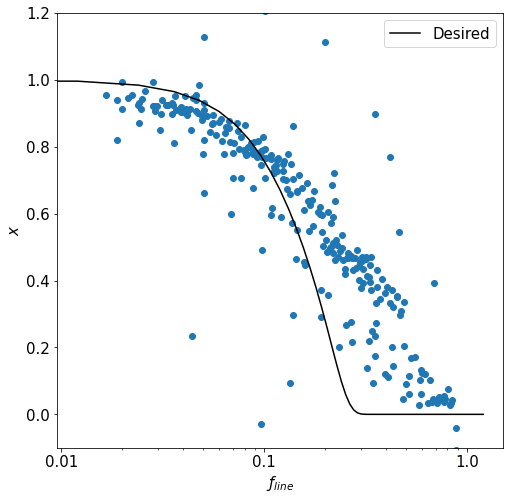

In [154]:
plt.figure(figsize=(8,8))

#telescope = 'Chandra' 
#telescope = 'SRG/eROSITA'

iks_all = []
fline_all = []

T_mins = (1., 2., 3., 1., 2., 3., 1., 2., 3.)
T_maxs = (2., 4., 6., 3., 6., 9., 4., 8., 12.)

for metallicity in (0.1, 0.3, 1.0):

    for T_min, T_max in list(zip(T_mins, T_maxs)):
        
        name_key = str(metallicity)+': '+str(T_min)+'-'+str(T_max)

        # continuum
        Tspec_list1 = Tspec_cont_f6[name_key]
        Flux_list1 = Flux_cont_f6[name_key]

        # realistic metallicities
        Tspec_list2 = single_T_fit_f6[name_key]
        Flux_list2 = Flux_fit_f6[name_key]

        #line-dominated
        Tspec_list3 = Tspec_lines_f6[name_key]
        Flux_list3 = Flux_lines_f6[name_key]

        num_iks = [tsp - tli for tsp, tli in zip(Tspec_list2, Tspec_list3)]
        denom_iks = [tco - tli for tco, tli in zip(Tspec_list1, Tspec_list3)]
        iks = [numx/denomx for numx, denomx in zip(num_iks, denom_iks)]

        num_fline = Flux_list3
        denom_fline = Flux_list2 #[Fli + Fco for Fli, Fco in zip(Flux_list3, Flux_list1)]
        fline = [numf/denomf for numf, denomf in zip(num_fline, denom_fline)]

        iks_all.append(iks)
        fline_all.append(fline)

        #plt.scatter(fline, iks)

plt.scatter(fline_all, iks_all)


#plt.scatter(fline_all_1, iks_all_1, label = 'Z = 0.1')
#plt.scatter(fline_all_2, iks_all_2, label = 'Z = 0.3')
#plt.scatter(fline_all_3, iks_all_3, label = 'Z = 1.0')

#for ii in np.linspace(0, 1.2, 101):
ii = np.linspace(0, 1.2, 101)
plt.plot(ii, universal_function(ii, 0.19, 0.25, 1.00), color='black', linestyle='-', label = 'Desired')

#handles, labels = plt.gca().get_legend_handles_labels()
#line_n = Line2D([], [], label='Continuum', color='black', linestyle='--', linewidth=2)
#line_e = Line2D([], [], label='Lines', color='black', linestyle=':', linewidth=2)
#dots_f = Line2D([], [], label='Single-T fit from Xspec', color='black', marker='.', linestyle='None', markersize=12)
#handles.extend([line_n, line_e, dots_f])
#plt.legend(handles=handles, fontsize=15)

plt.legend(fontsize=15)
plt.xscale('log')
plt.ylim(-0.1, 1.2)
plt.xticks([0.01, 0.1, 1.0], [0.01, 0.1, 1.0], size=15)
plt.yticks(size=15)
plt.xlabel('$ƒ_{line}$', fontsize = 15)
plt.ylabel('$x$', fontsize = 15)
#plt.title('Spectra with realistic metallicities ('+telescope+') \n', fontsize = 15)
#plt.savefig('Fig6_'+telescope+'.png')
plt.show()